# Combinational Building Blocks

Combinational logic circuits can be grouped into **larger building blocks** to make it easier to design complex systems. By using **abstraction**, we hide the low-level gate details and focus instead on what each block does. **Hierarchy** lets us build big systems by connecting simpler parts together, layer by layer. Thanks to **modularity** and **regularity**, each block has clear, well-defined interface, so we can think of it as a black box and reuse it easily. For example, common building blocks include multiplexers, decoders, arithmetic circuits, and seven-segment display decoders. These blocks perform useful functions that show up repeatedly in digital designs. As we go forward, we’ll see how combining these simple blocks helps us build much more powerful systems, like a microprocessor, without getting lost in the details of every single gate.

## Multiplexers

Multiplexers are among the most commonly used combinational circuits. They **choose an output from among several possible inputs, based on the value of a select signal**. A multiplexer is sometimes called a **mux**. The following figure shows the schematic symbol and truth table for a 2:1 mux: 

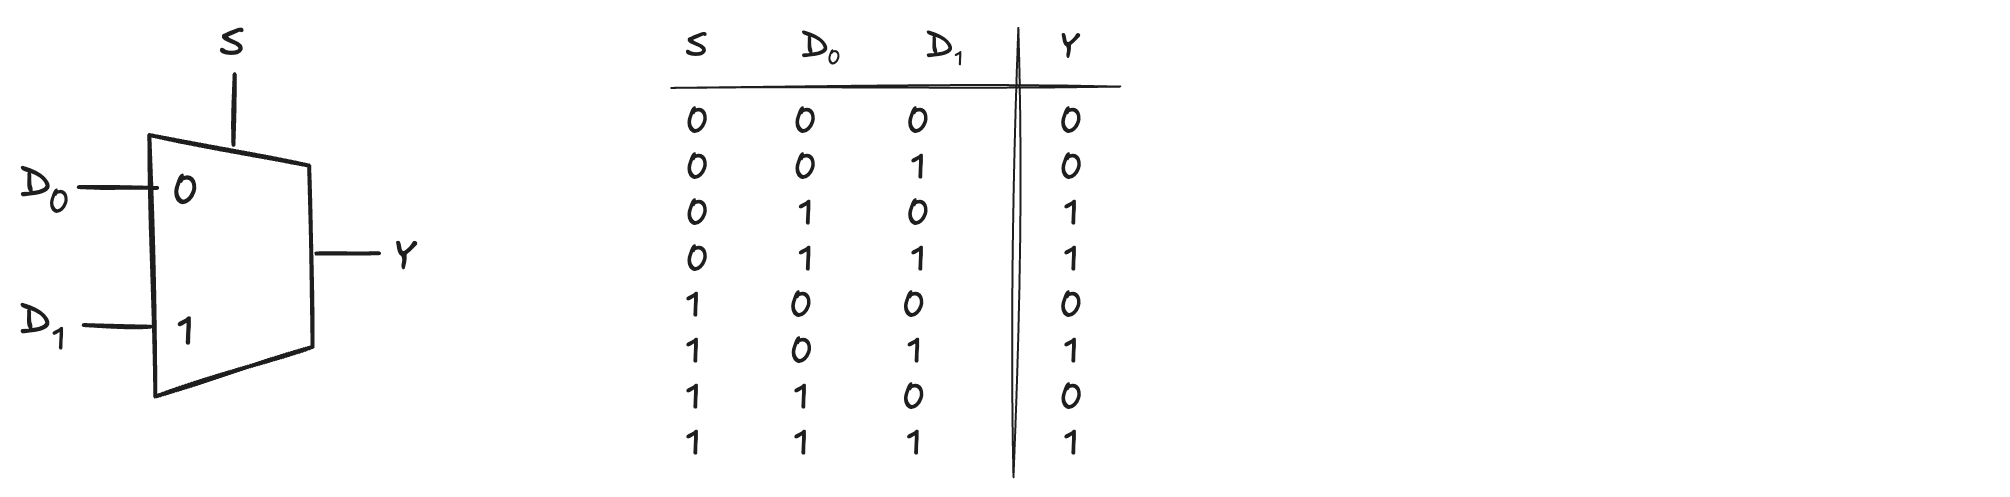

The multiplexer chooses between the two data inputs, based on the select value, which is also called a **control signal** because it controls what the multiplexer does. We can be built it from sum-of-products logic and derive its Boolean equation: 

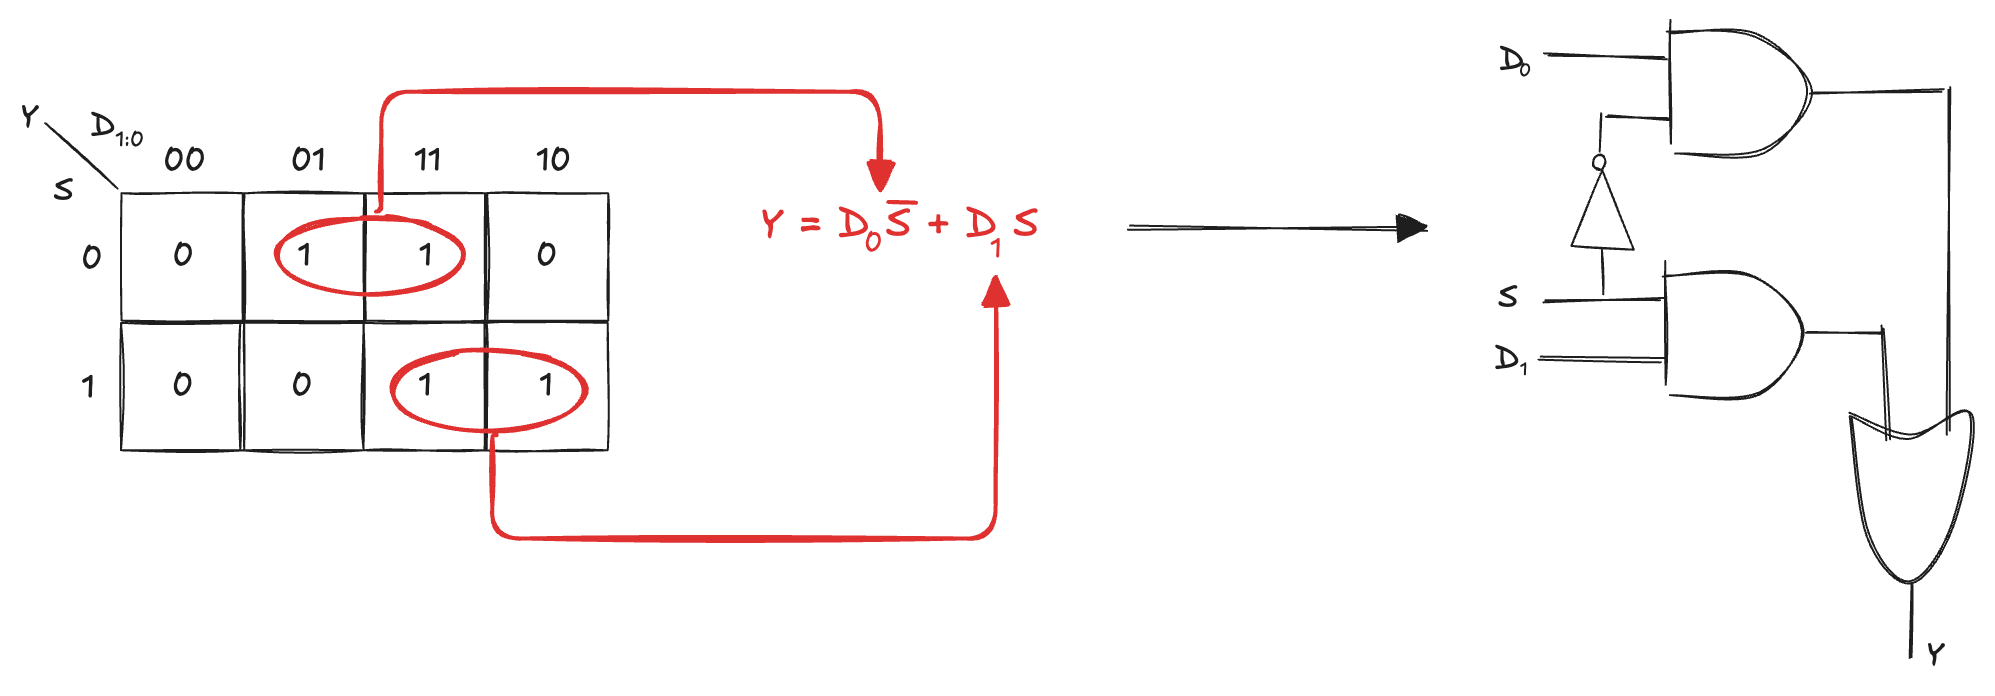

$\text{mux}(D_0, D_1, S) = D_0 \; \overline{S} + D_1 \; S$

### Wider Multiplexers

A 4:1 multiplexer has four data inputs and one output. In that case, two select signals are needed to choose among the four data inputs. It can be built using sum-of-products logic or multiple 2:1 multiplexers:

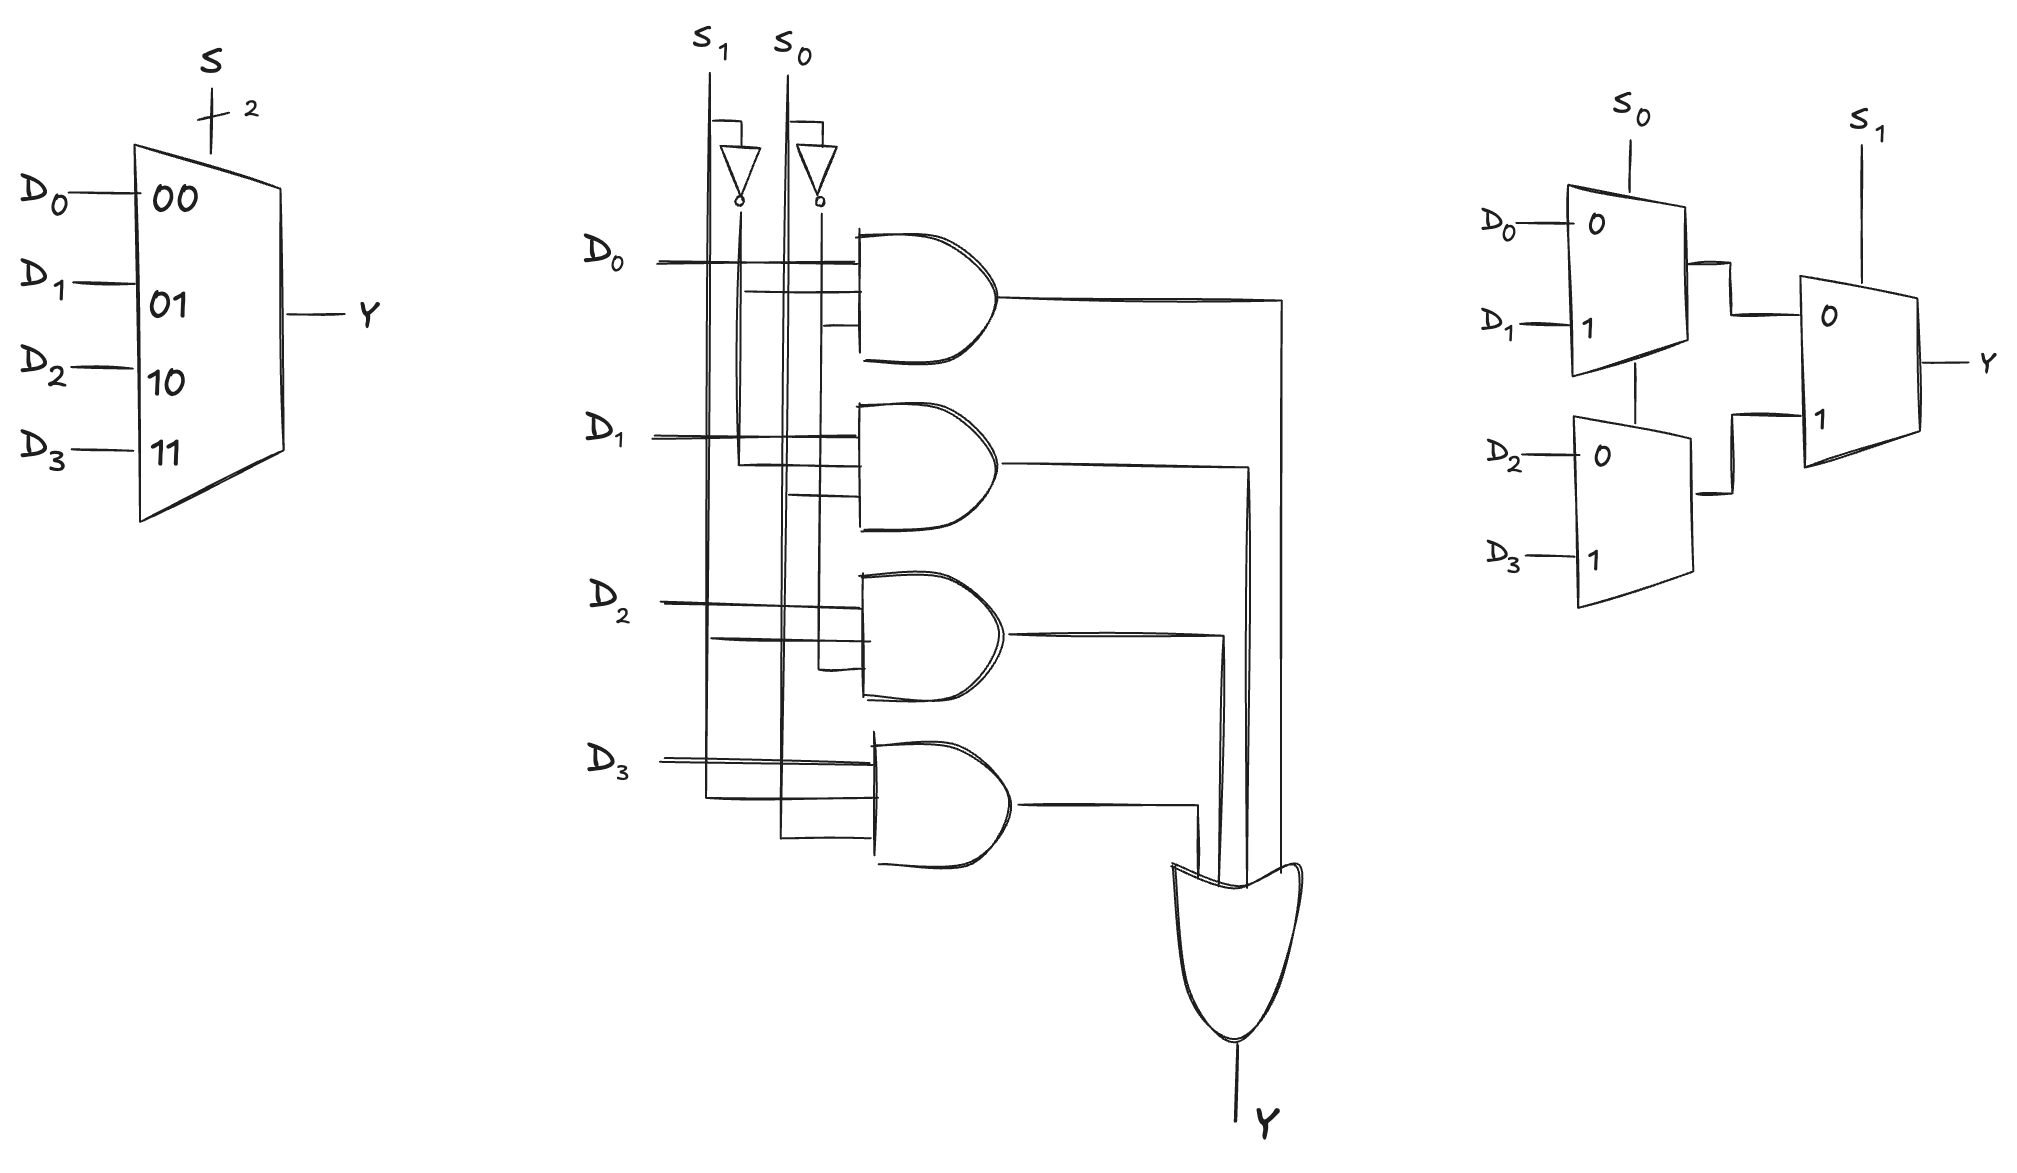

Wider multiplexers, such as 8:1 and 16:1 multiplexers, can be built by expanding the methods. In general, an N:1 multiplexer needs log_2 N select lines.  

We can think of mux as a **switchboard** that connects only one input at a time, **allowing different data sources to share the same output line efficiently**. This makes it possible to handle many inputs in a controlled, sequential way without needing separate circuits for each one:

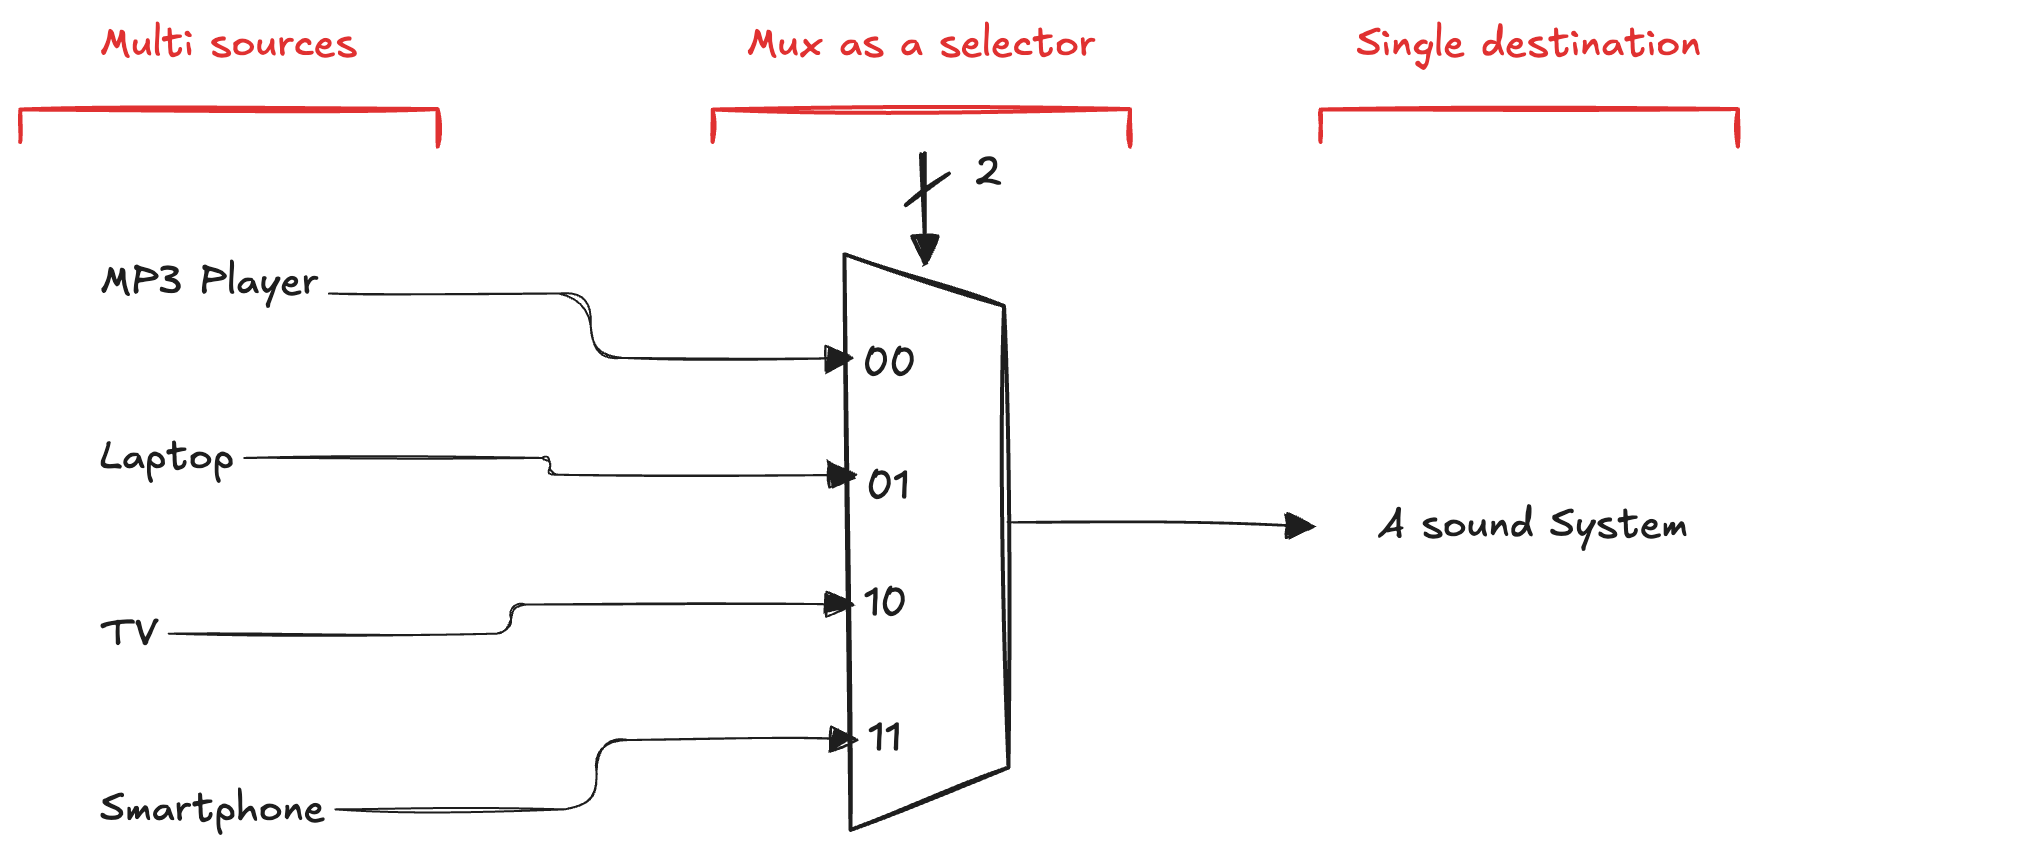

### Multiplexer Logic

Multiplexers aren’t just for routing data, they can also serve as **lookup tables** for logic operations. For instance, the figure below illustrates how we can use a 4:1 multiplexer to implement the behavior of a two-input AND gate by selecting the right output for each input combination:

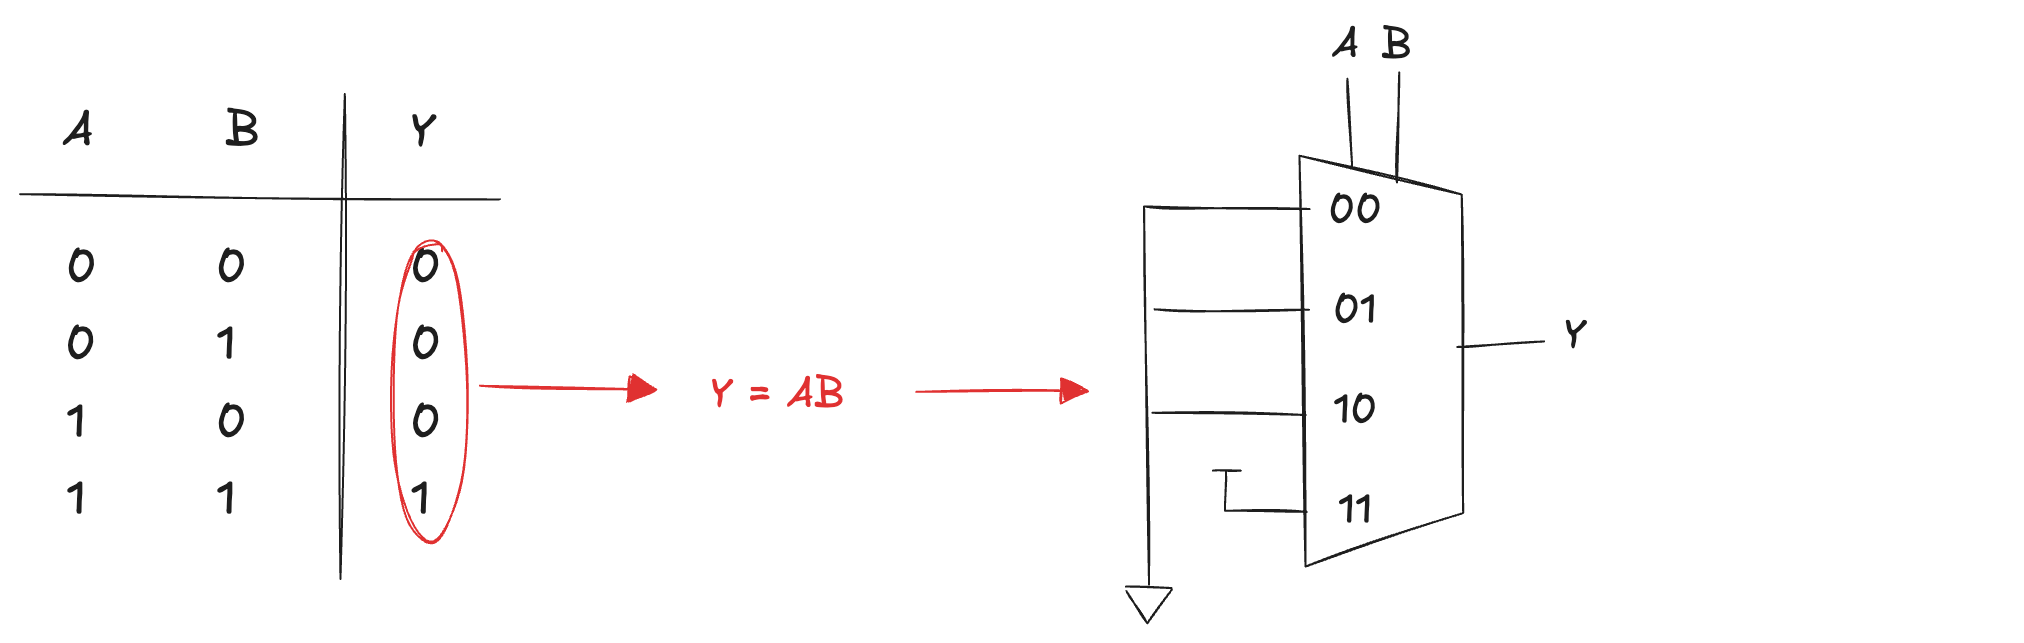

The **select lines are used as input** for the multiplexer. The **inputs lines are wired to either 0 or 1, based on the rows of the truth table** for the logic function we want to implement. In general, a multiplexer with 2^N inputs can be configured to perform any logic function of N variables. By simply changing how the data inputs are connected, **the multiplexer can be reprogrammed** to carry out a completely different function.

It’s possible **to reduce the size of the multiplexer by half** and still implement any N input logic function using only a 2^(N-1) input multiplexer. The key idea is to provide one of the input variables directly to the multiplexer’s data inputs instead of hard-wiring them to 0 or 1. To see how this works in practice, we can implement a two-input AND gate using a simple 2:1 multiplexer.

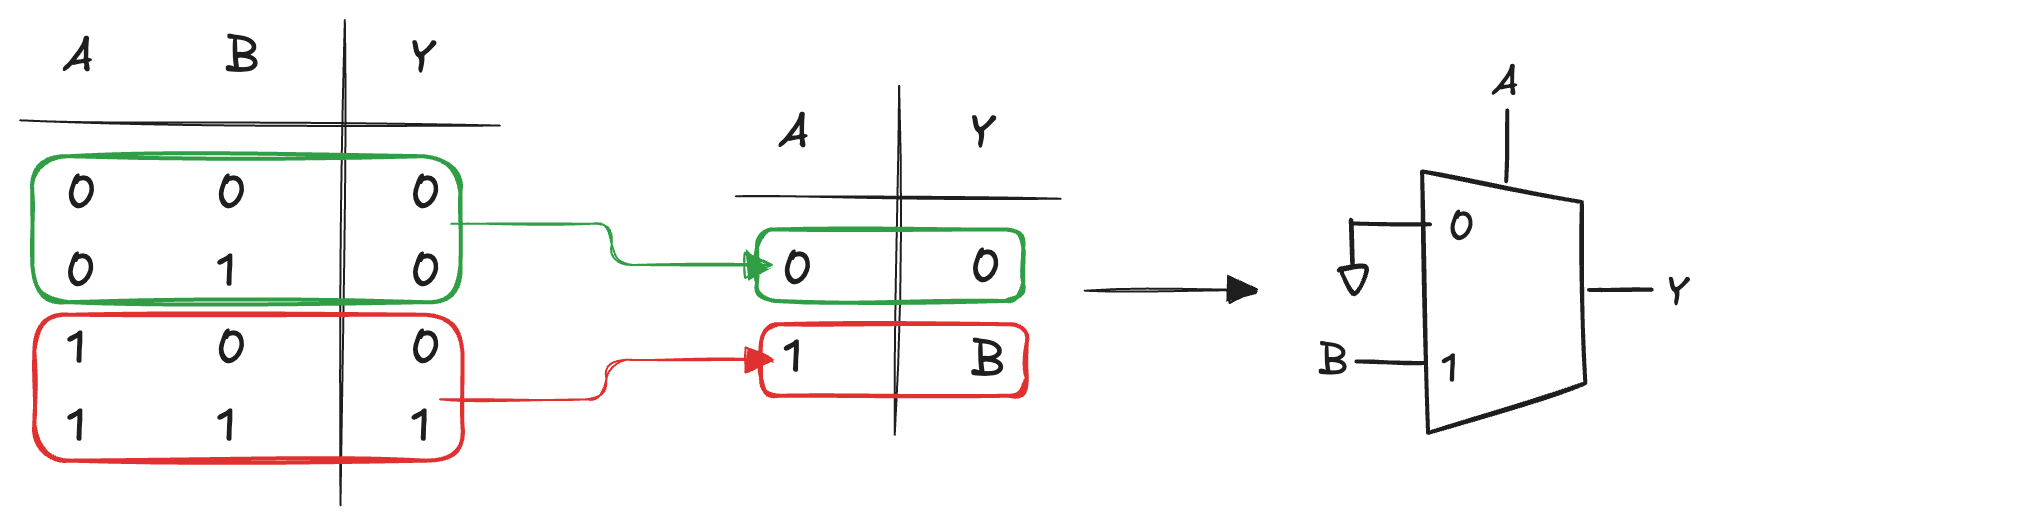

We begin with the complete truth table for the logic function, then combine pairs of rows to eliminate the rightmost input variable. This allows us to rewrite the output in terms of this variable, reducing the number of required data inputs. The multiplexer is then used as a lookup table based on this reduced truth table. To illustrate this approach further, let’s consider a more complex example: 

$\displaystyle Y = A \; \overline{B} + \overline{B} \; \overline{C} + \overline{A} \; B \; C$

Suppose to have an 8:1 multiplexer for the implementation. How can this function be realized:

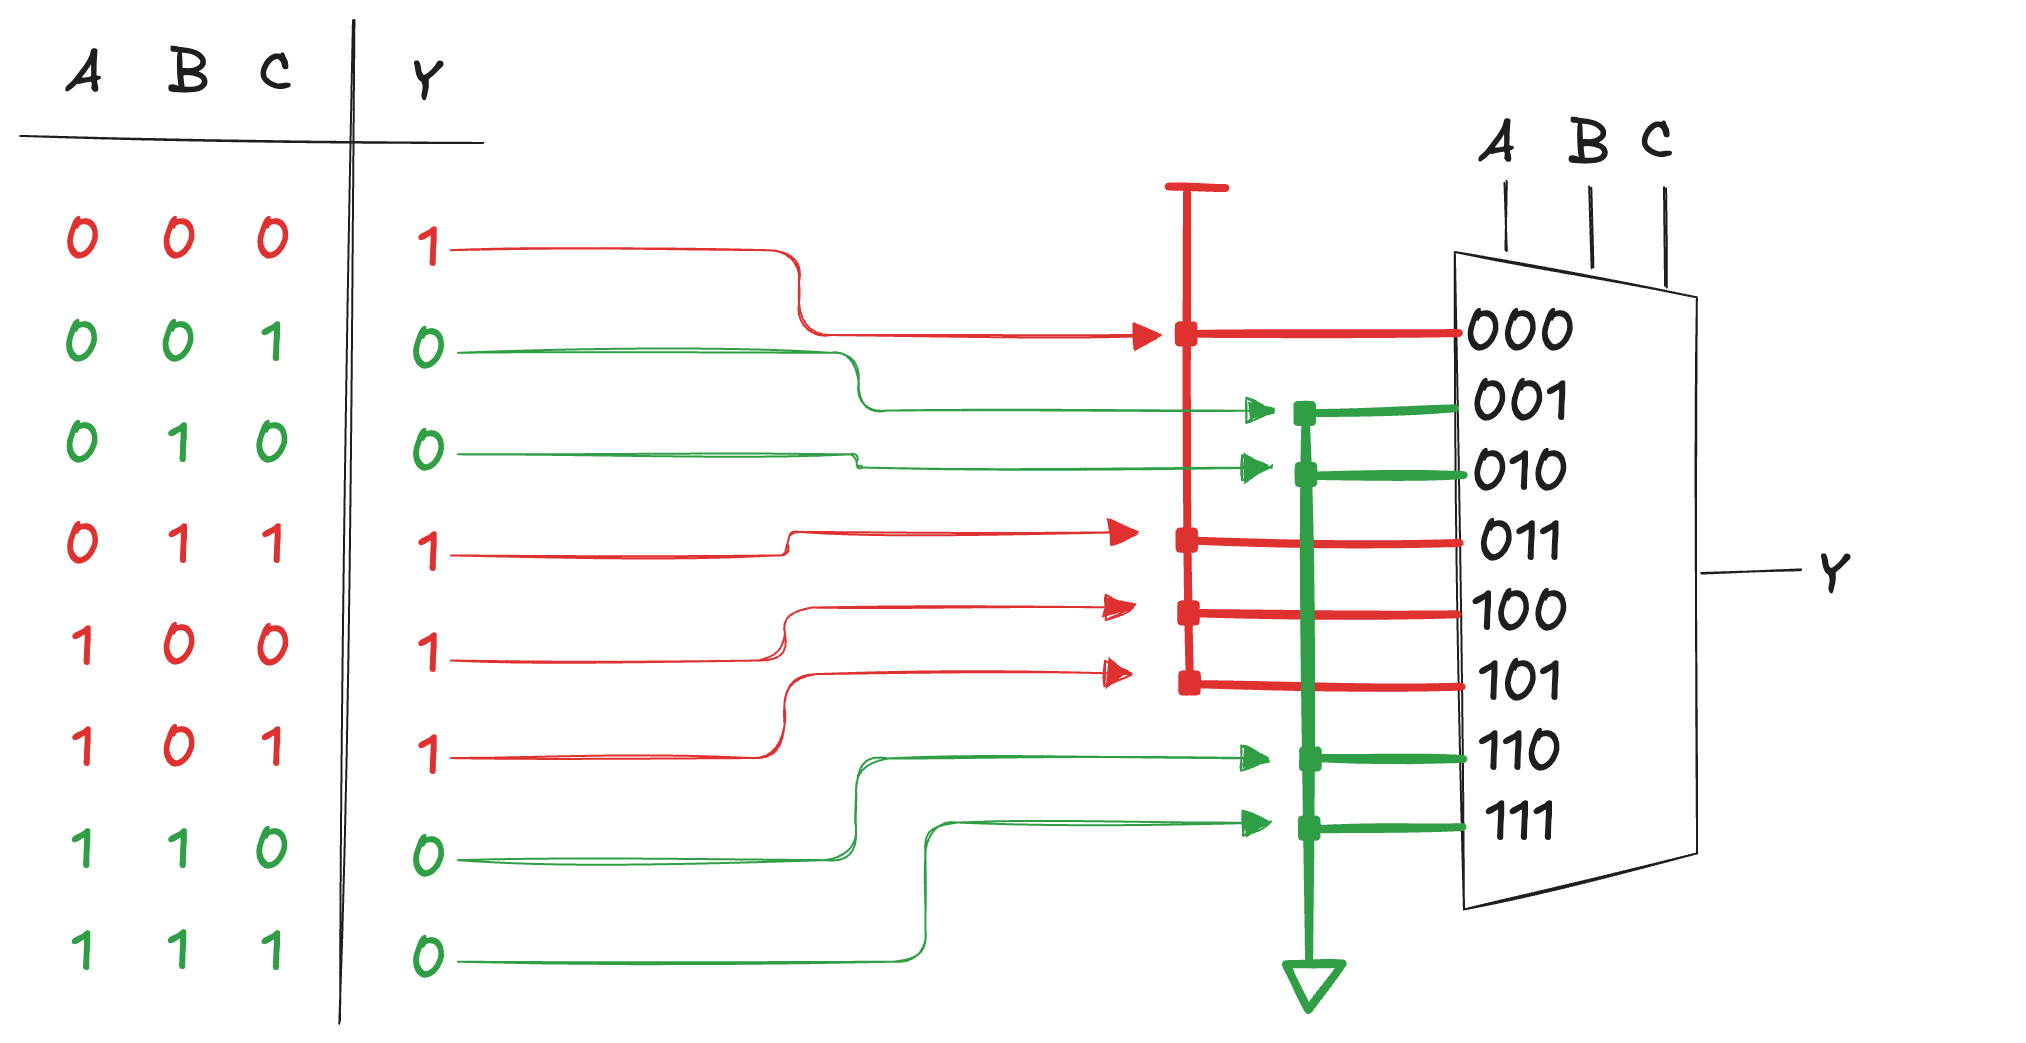

Now suppose that the original 8:1 multiplexer is damaged and only a 4:1 multiplexer and an inverter are available as replacement components. Is it possible to implement the function using only these parts?

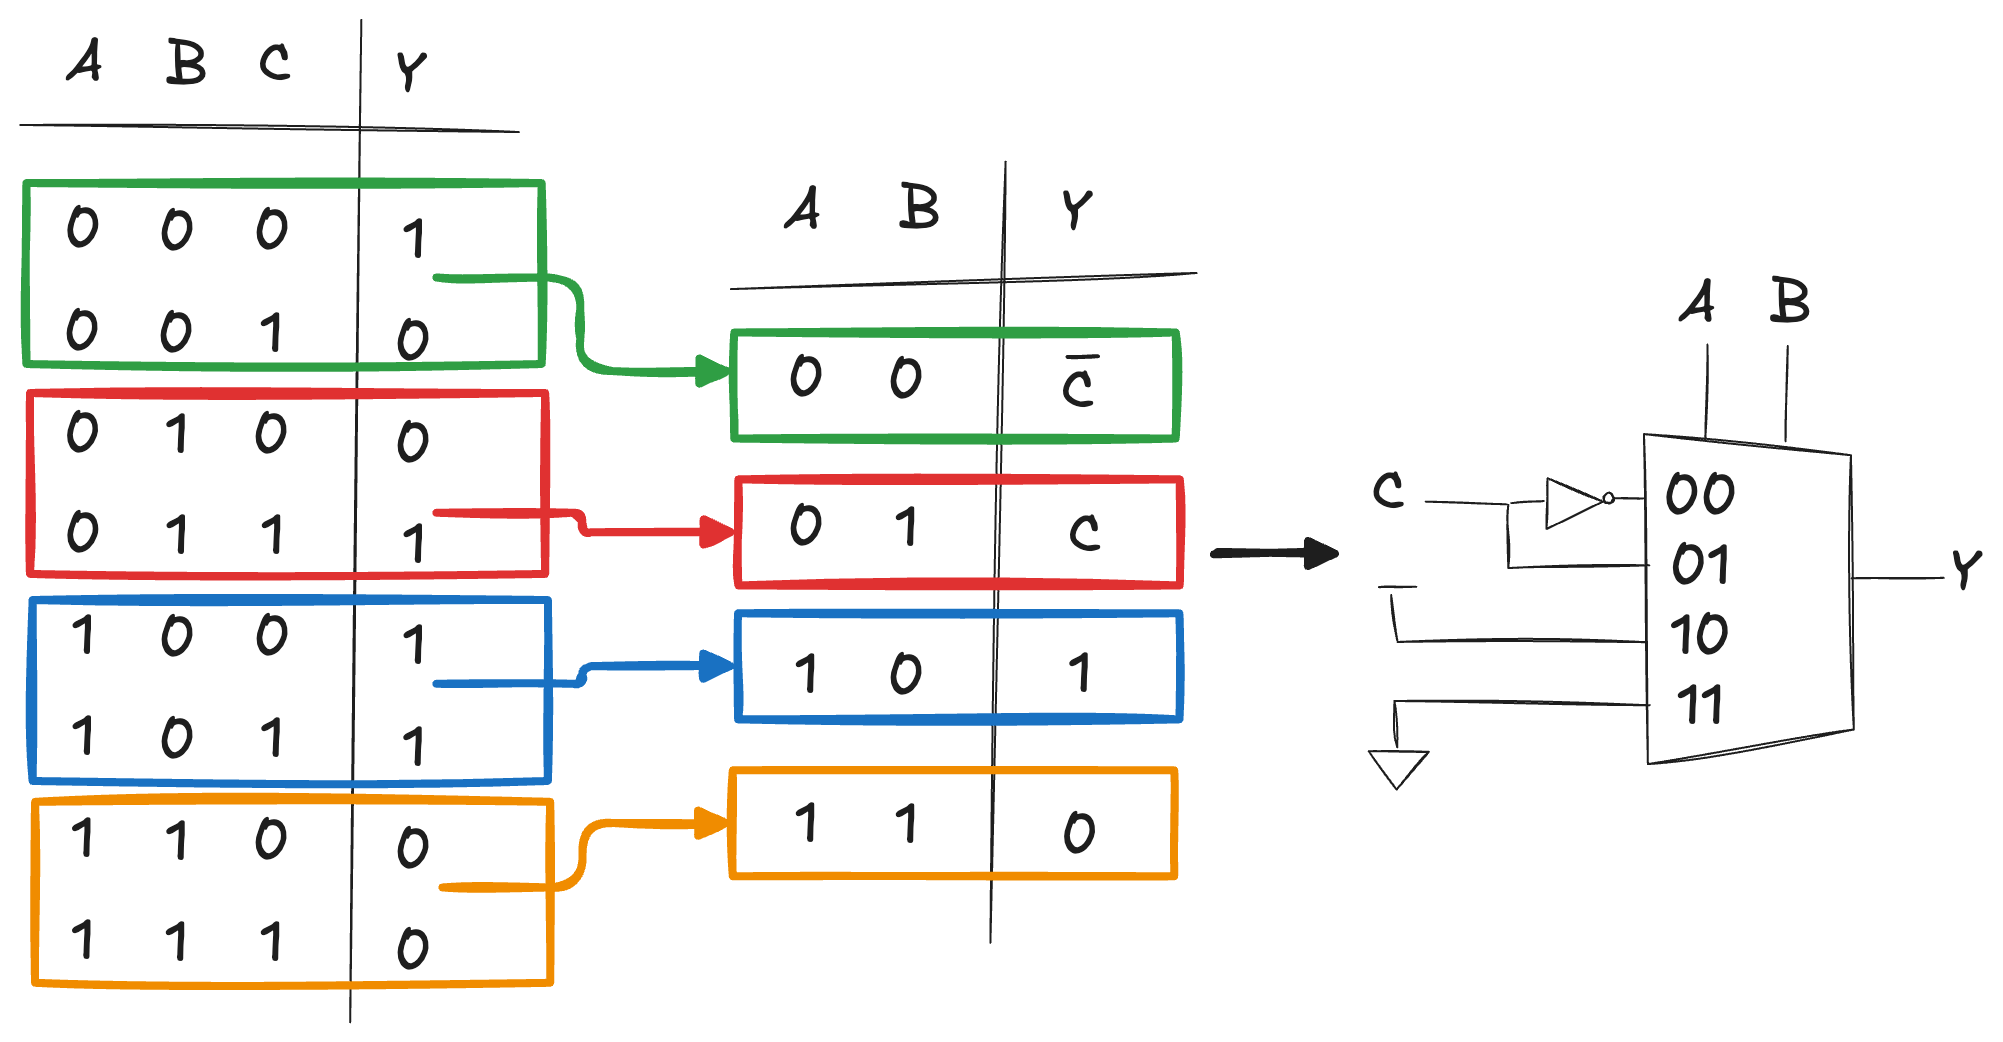

Vediamo ora la descrizione VHDL di un multiplexer 4:1.

In [ ]:
entity mux_4_1 is
    port( s0, s1: in std_logic;
          a, b, c, d: in std_logic;
          y: out std_logic
    );
end mux_4_1;

architecture rtl of mux_4_1 is
begin
    y <= a when s0='0' and s1='0' else
         b when s0='0' and s1='1' else
         c when s0='1' and s1='0' else
         d when s0='1' and s1='1' else
         '-';
end rtl;

Il costrutto "with ... select" offre la possibilità di rendere la specifica più sintetica e leggibile:

In [ ]:
architecture rtl of mux_4_1 is
    signal sel: std_logic_vector(0 to 1);
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
             '-' when others;
end rtl;

Supponiamo ora che i segnali di ingresso, e di conseguenza il segnale di uscita, non siano di un bit bensì siano segnali a 8 bit. La nuova entity per il multiplexer in esame diventa la seguente:

In [ ]:
entity mux_4_1_8bit is
    port( s0, s1: in std_logic;
           a, b, c, d: in std_logic_vector(0 to 7);
           y: out std_logic_vector(0 to 7)
    );
end mux_4_1_8bit;

architecture rtl of mux_4_1_8bit is
    signal sel: std_logic_vector(0 to 1);
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
             "--------" when others;
end rtl;

Vediamo ora, a titolo di esempio, come è possibile specificare un multiplexer 4-a-1 generico per segnali di dimensione variabile, grazie alla parametrizzazione che si realizza mediante il costrutto generic:

In [ ]:
entity mux_4_1_Nbit is
    generic( N: integer );
    port( sel: in std_logic_vector(0 to 1);
          a, b, c, d: in std_logic_vector(0 to N-1);
          y: out std_logic_vector(0 to N-1)
    );
end mux_4_1_Nbit;

La dichiarazione di generic introduce nell’entity un parametro, N, che indica la dimensione dei segnali di ingresso e del segnale di uscita. Quando questo componente sarà utilizzato nel progetto, sarà necessario assegnare un valore specifico e costante al parametro N. Ciò fatto, lo strumento di sintesi sarà in grado di realizzare il componente in modo consistente con la dimensione assegnata ai segnali. Consideriamo ora l’architectura,l’unica parte che mostra una dipendenza esplicita dalla dimensone dei segnali è l’assegnamento del valore costante costituito da tutti don’t care. Non conoscendo a priori la dimensione del segnale di uscita, non è possibile utilizzare una costante predefinita per tale assegnamento. A tal fine il VHDL dispone di un costrutto che permette di assegnare un valore costante ad ogni elemento di un vettore, sia quando la dimensione è nota a priori, sia quando non lo è:

In [ ]:
architecture rtl of mux_4_1_Nbit is
begin
    with sel select
        y <= a when "00",
             b when "01",
             c when "10",
             d when "11",
            (others => ’-’) when others;
end rtl;

## Decoders

A decoder is a circuit with N inputs and 2^N outputs. For each possible input combination, **exactly one output line is asserted** (set to 1), while all others remain low. The figure below illustrates a 2-to-4 decoder as an example:

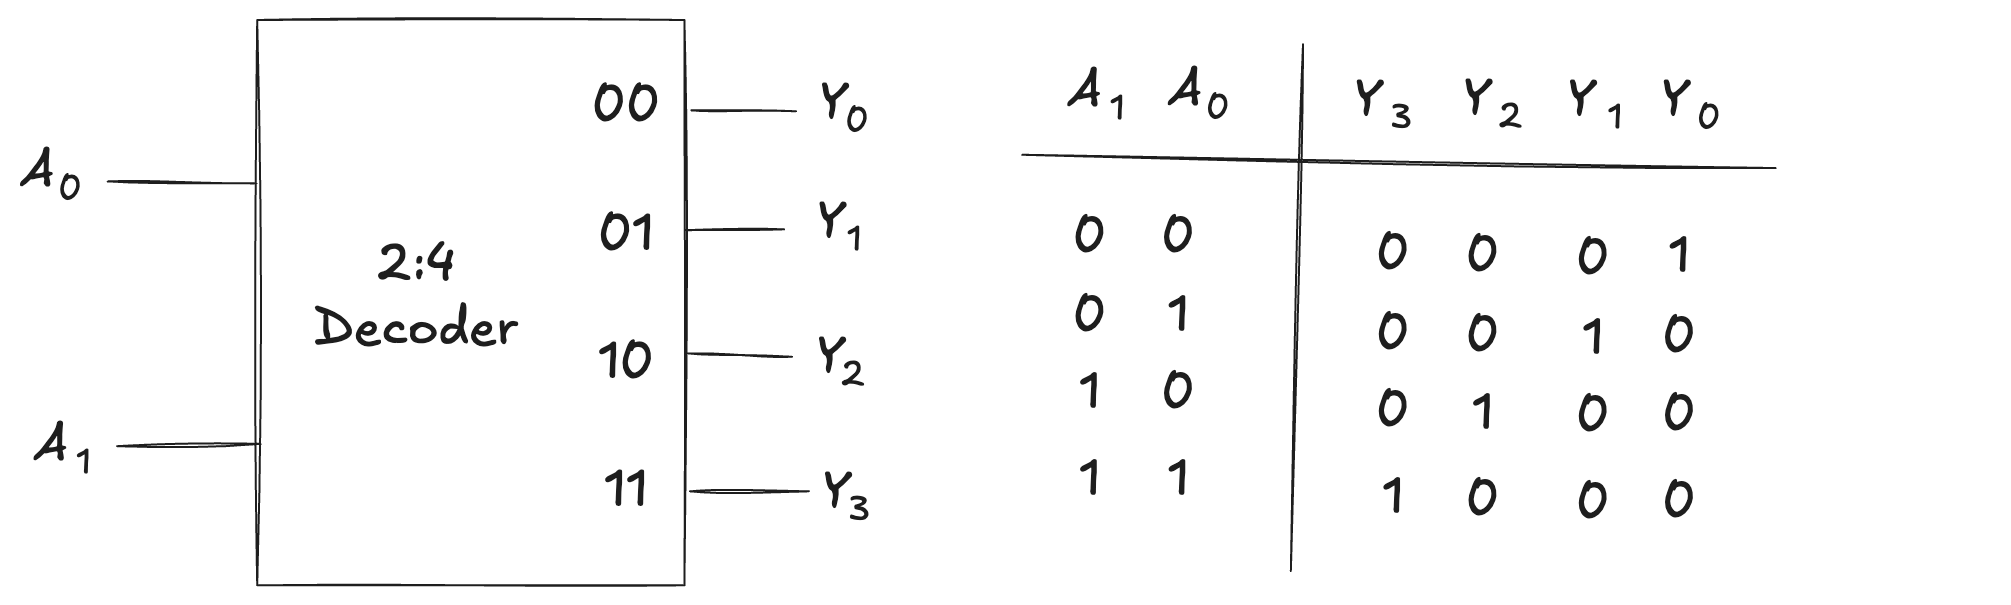

The outputs are called **one-hot**, because exactly one is "hot" (HIGH) at
a given time.

A 2-to-4 decoder can be implemented using four AND gates and two NOT gates. Each AND gate generates one output by combining the inputs in either their true or complemented form, according to the required minterm.

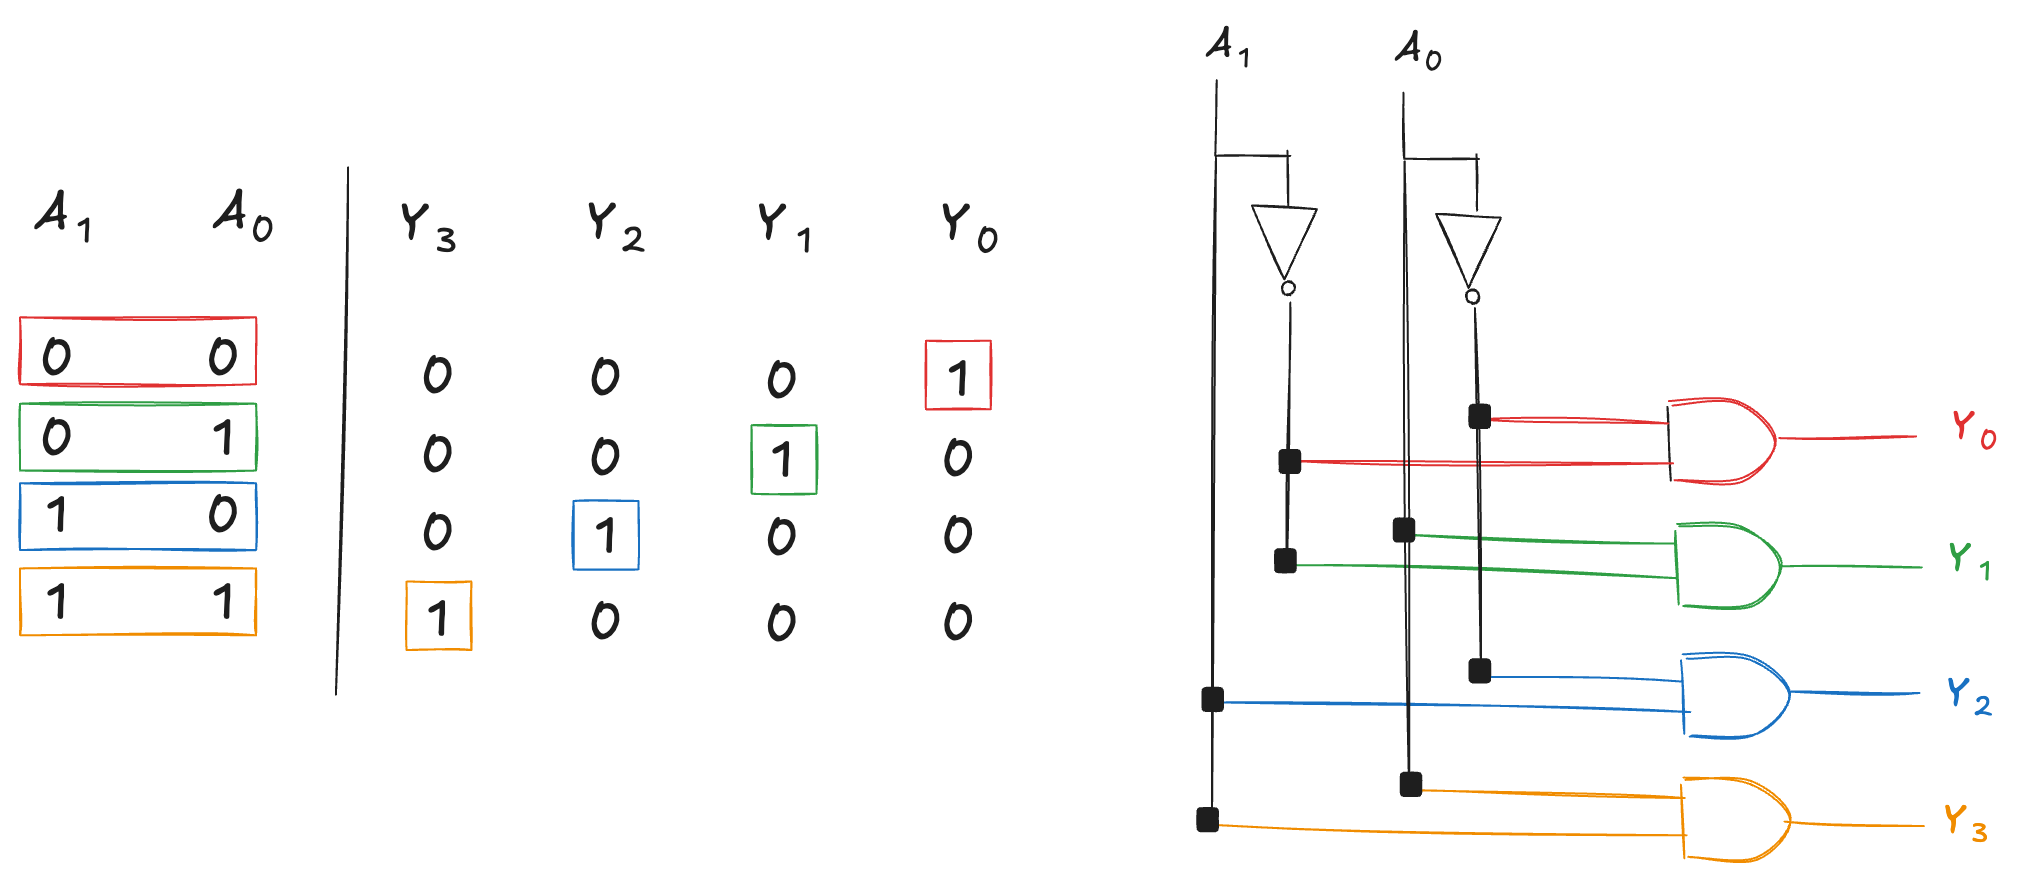

Starting from the truth table, it is straightforward to write the corresponding VHDL description:

In [ ]:
entity decoder_2_4 is
    port( dec_in: in std_logic_vector(0 to 1);
          dec_out: out std_logic_vector(0 to 3)
    );
end decoder_2_4;

architecture rtl of decoder_2_4 is
begin
    with dec_in select
    dec_out <= "0001" when "00",
               "0010" when "01",
               "0100" when "10",
               "1000" when "11",
               "----" when others;
end rtl;

In general, an N-to-2^N decoder can be constructed using 2^N AND gates, each with N inputs. Each AND gate generates one possible combination of the input variables in their true or complemented form, so that each output corresponds to a single minterm of the input variables. 

This type of circuit is often used to **decode a memory address**. The inputs represent the memory address in standard binary form, while the output activates exactly one of the memory lines that needs to be accessed:

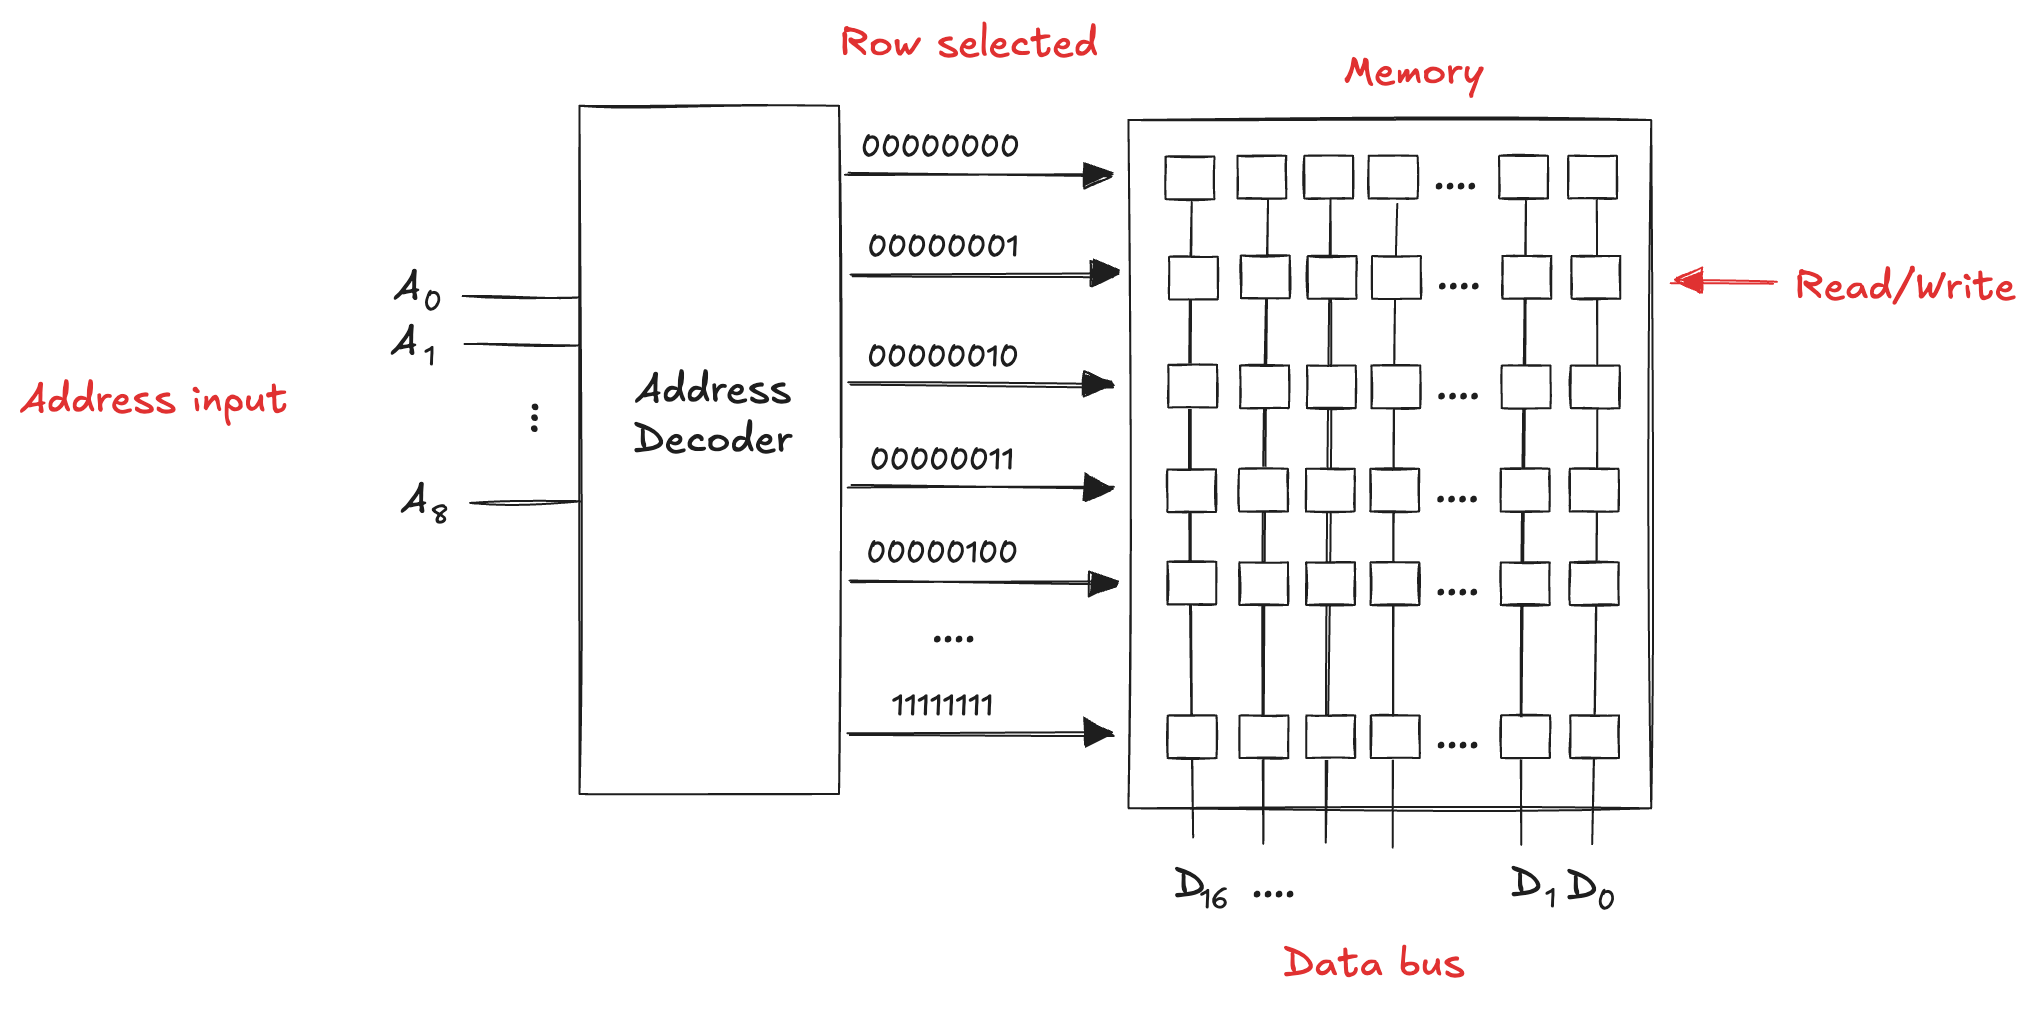

### Decoder Logic

Decoders can be combined with OR gates to **build logic functions**. The following figure shows the two-input XNOR function implemented using a 2:4 decoder and a single OR gate. Because each output of a decoder represents a single minterm, the function is built as the OR of all of the minterms in the function:

$\displaystyle Y = \overline{A \oplus B} = \overline{A \; B} + A \; B$

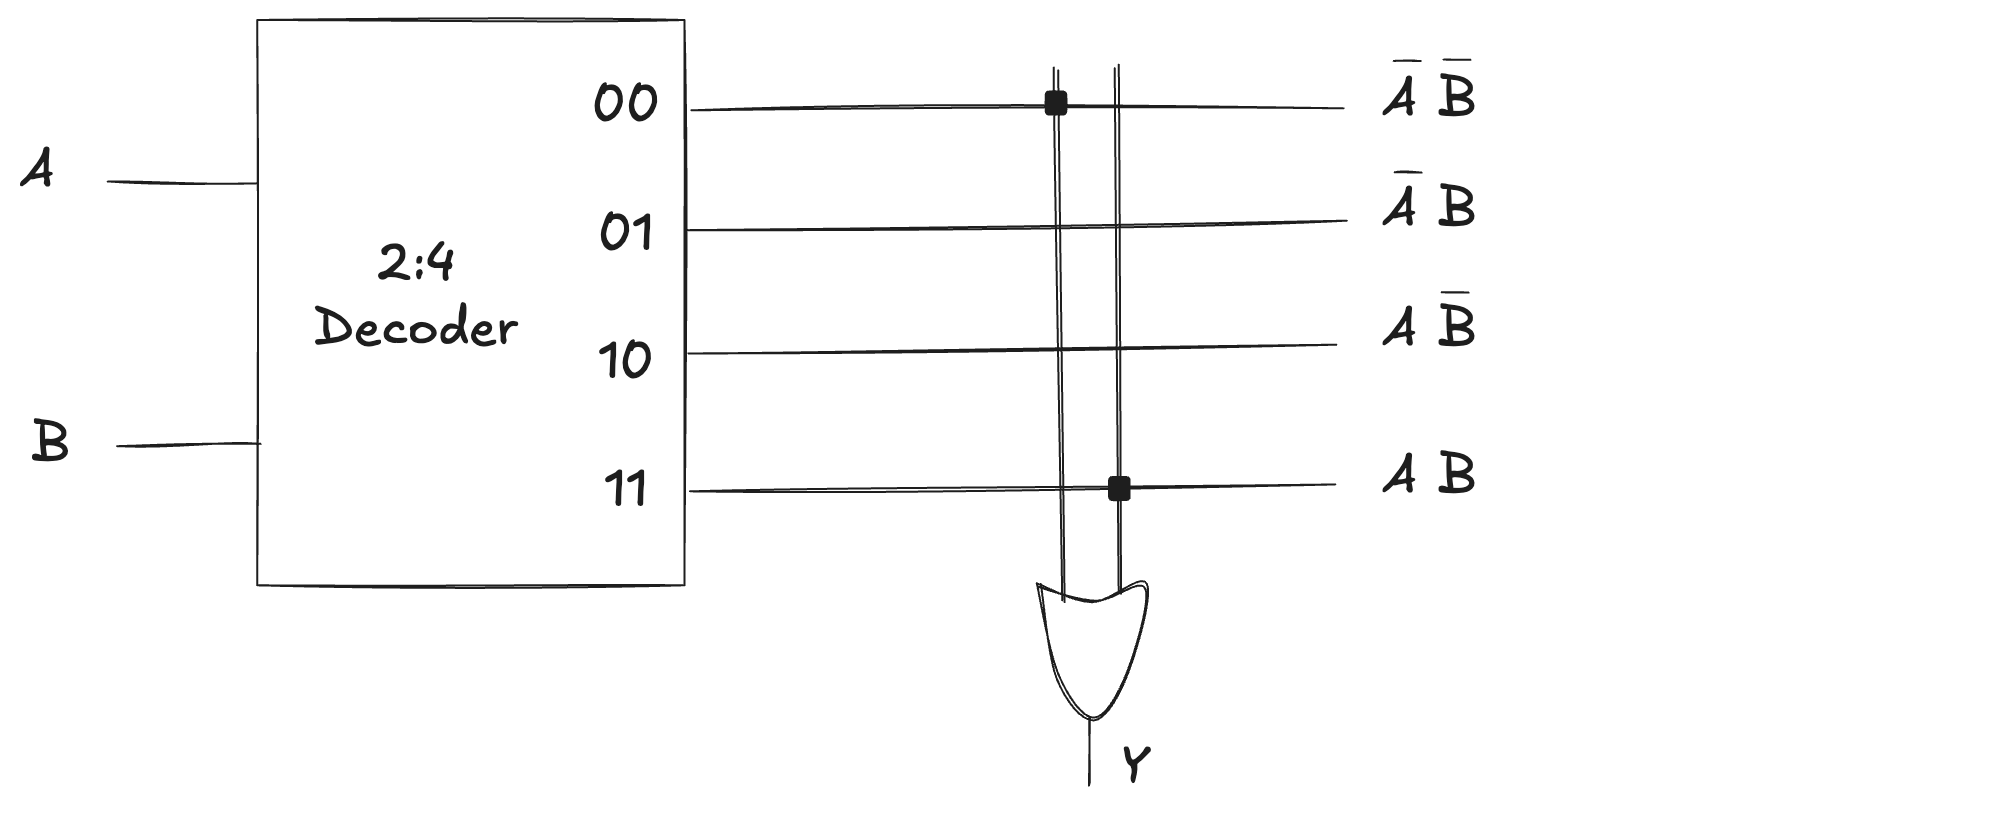

An N-input function with M 1 in the truth table can be built with an N:2^N decoder and an M-input OR gate attached to all of the minterms containing 1 in the truth table. This concept will be applied to the building of read-only memories (ROMs).

## Adder

Addition is one of the most common operations in digital systems. We start considering how to add two 1-bit binary numbers. We then extend to N-bit binary numbers. Adders also illustrate trade-offs between speed
and complexity.

### Half Adder

A half adder has two inputs, A and B, and two outputs: S (sum) and Cout (carry out). The sum output represents the addition of A and B. When both inputs are 1, their sum is 2, which cannot be expressed with a single binary digit. Instead, the sum is split: S is 0 and the overflow is indicated by Cout. A half adder can be implemented using an XOR gate for the sum and an AND gate for the carry:

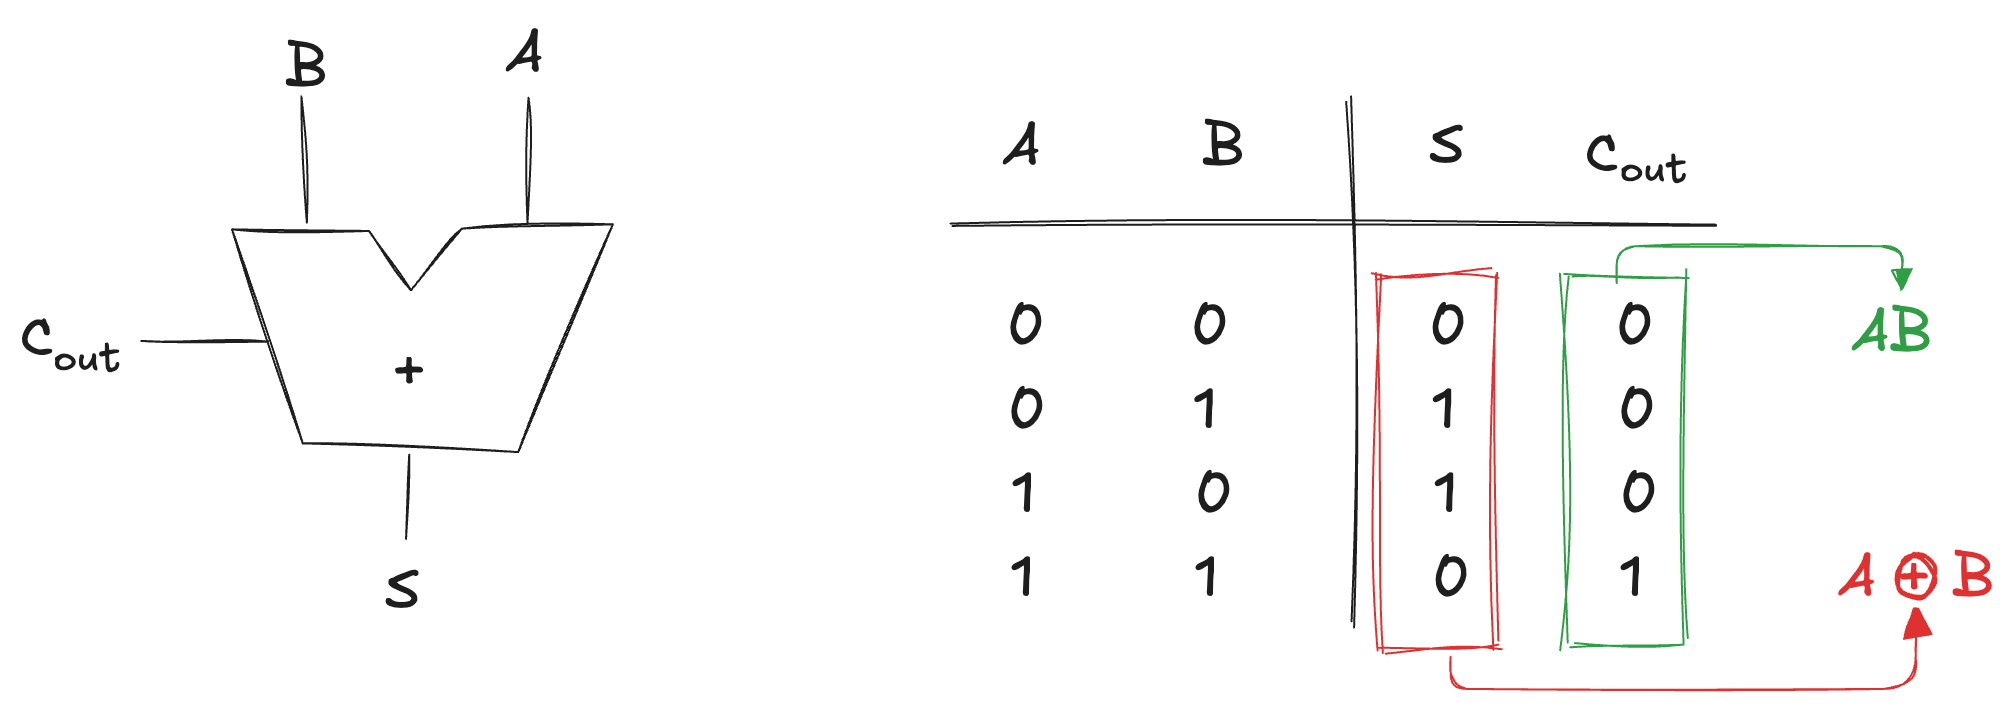

In a multi-bit adder, the carry-out from one bit position must be passed as a carry-in to the next more significant bit. However, a half adder does not have a Cin input, so it cannot receive the carry from the previous stage.

### Full Adder

A full adder accepts the carry in Cin:

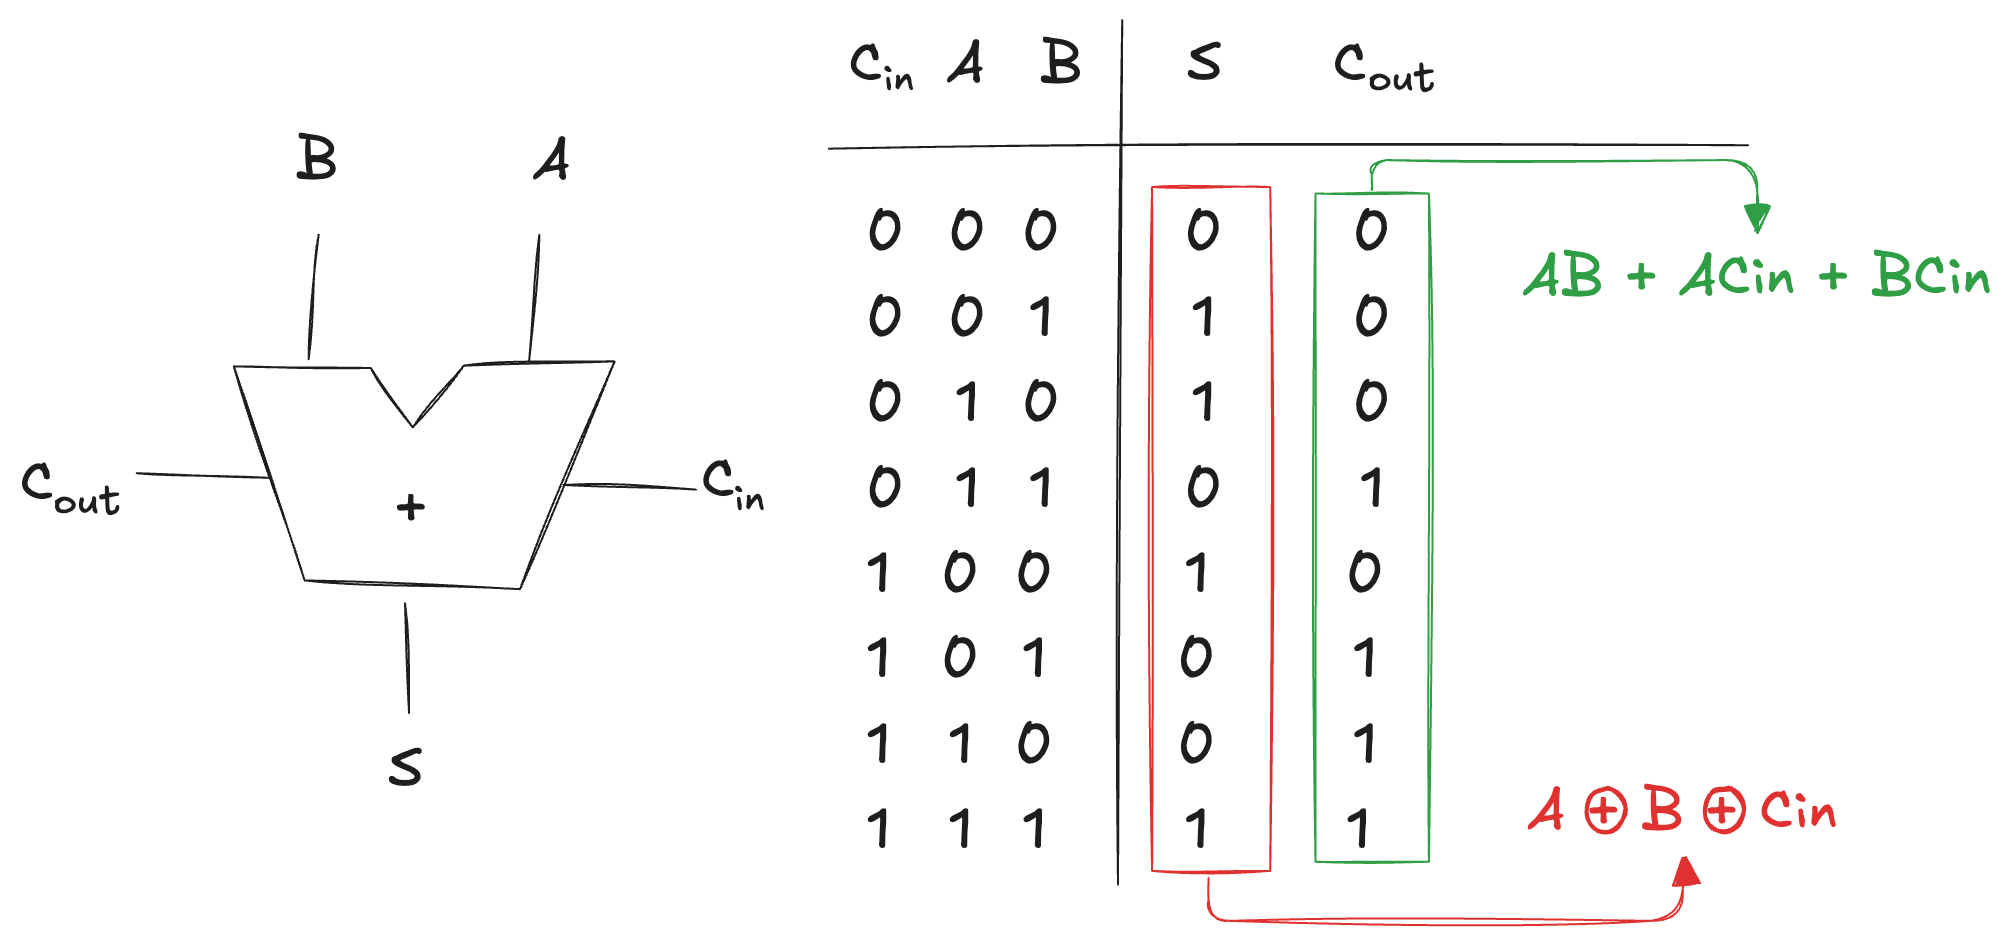

### Ripple-carry adder

An N-bit adder sums two N-bit inputs, A and B, along with a carry-in (Cin), to produce an N-bit output sum (S) and a carry-out (Cout). This type of adder is commonly referred to as a **carry propagate adder (CPA)** because the carry-out from each bit position propagates to the next higher bit. The simplest implementation **chains together N full adders**, where the Cout of one stage serves as the Cin for the next:

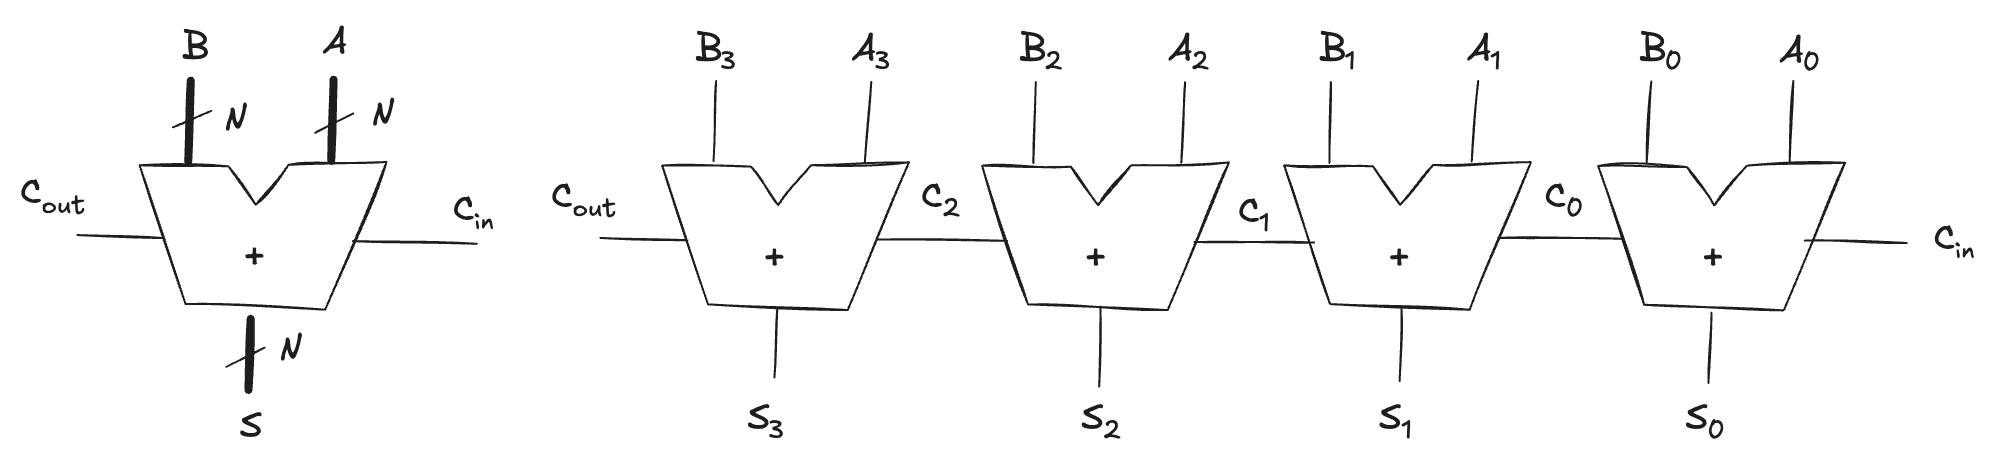

This is known as a **ripple-carry adder**. It is a good example of modularity and regularity: the full adder module is reused multiple times to build a larger system. However, it has the drawback of being **slow for large values of N**. For example, in a 32-bit operation, S31 depends on C30, which depends on C29, and so on, all the way back to the initial Cin. As a result, the adder’s delay increases linearly with the number of bits:

$\displaystyle T_{ripple} = N \cdot T_{FA}$

The next VHDL code describes a CPA with carries in and out:

In [ ]:
entity adder is
    
    generic(N: integer := 8);
    
    port(A, B: in std_logic_vector(N–1 downto 0);
         C_in: in std_logic;
         S: out std_logic_vector(N–1 downto 0);
         C_out: out std_logic);
end;

architecture synth of adder is
    signal result: std_logic_vector(N downto 0);
begin
    result <= ("0" & A) + ("0" & B) + C_in;
    S <= result(N–1 downto 0);
    Cout <= result(N);
end;

### Carry-Lookahead Adder

The fundamental reason why large ripple-carry adders are slow is that the carry signal must propagate through every bit in the adder.

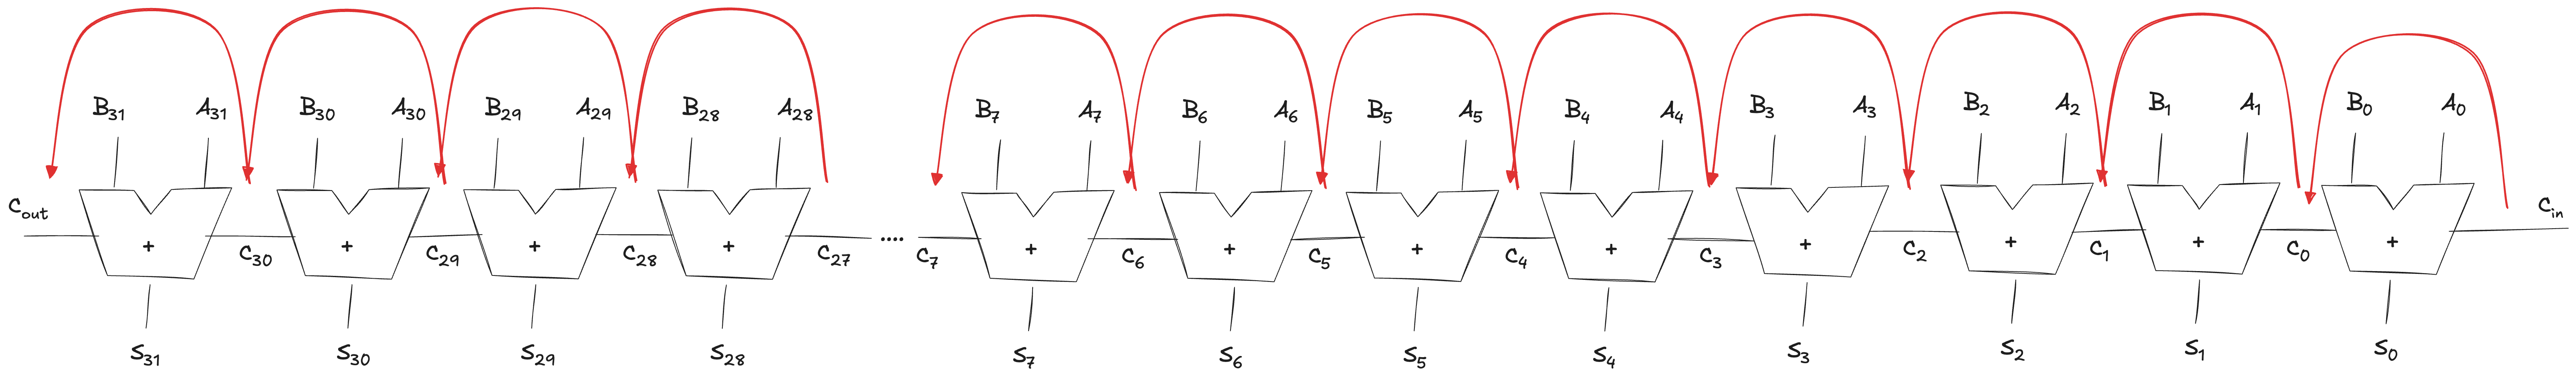

A **carry-lookahead adder (CLA)** addresses this problem by dividing the adder into blocks and adding circuitry that can quickly determine the carry-out of each block as soon as its carry-in is known. In this way, **the adder "looks ahead" across blocks** instead of waiting for the carry to ripple through every full adder within a block:

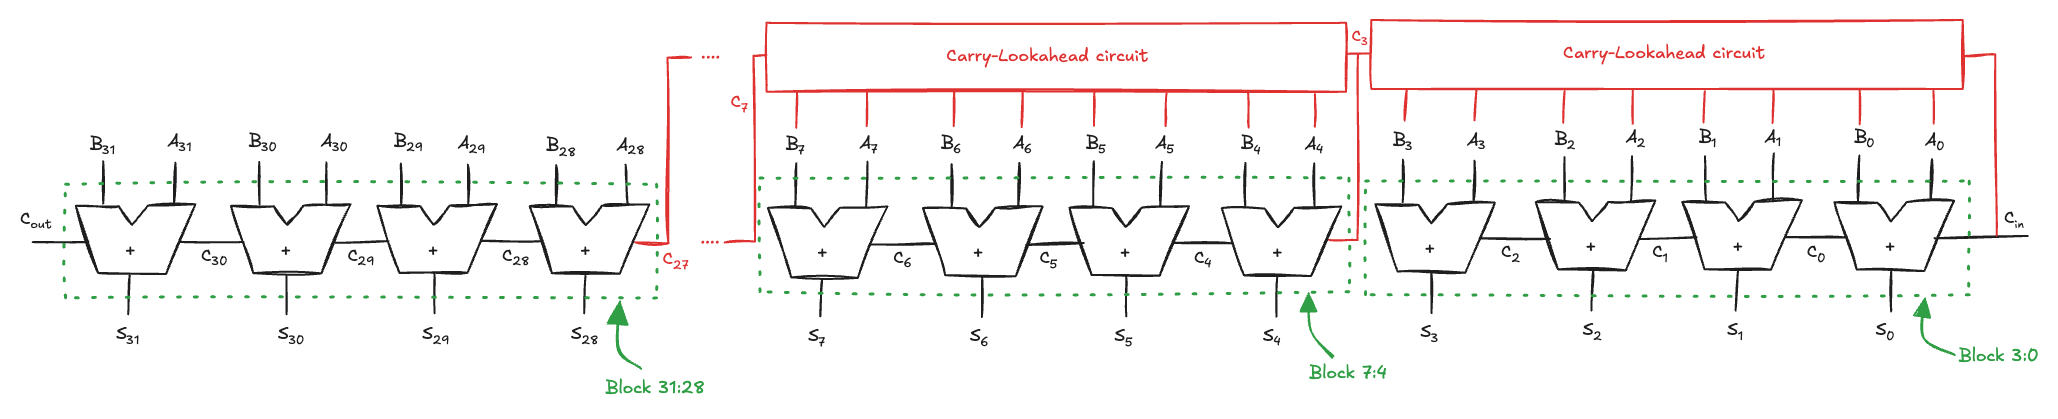

CLAs use **generate** and **propagate** signals to describe how each block determines its carry-out. The i-th bit position of an adder is said to generate a carry if it produces a carry-out regardless of the carry-in, this happens when both inputs are 1:

$\displaystyle G_i = A_i \; B_i$

The i-th bit position is said to propagate a carry if it produces a carry-out whenever there is a carry-in, this is guaranteed when at least one of its inputs is 1:
 
$\displaystyle P_i = A_i + B_i$

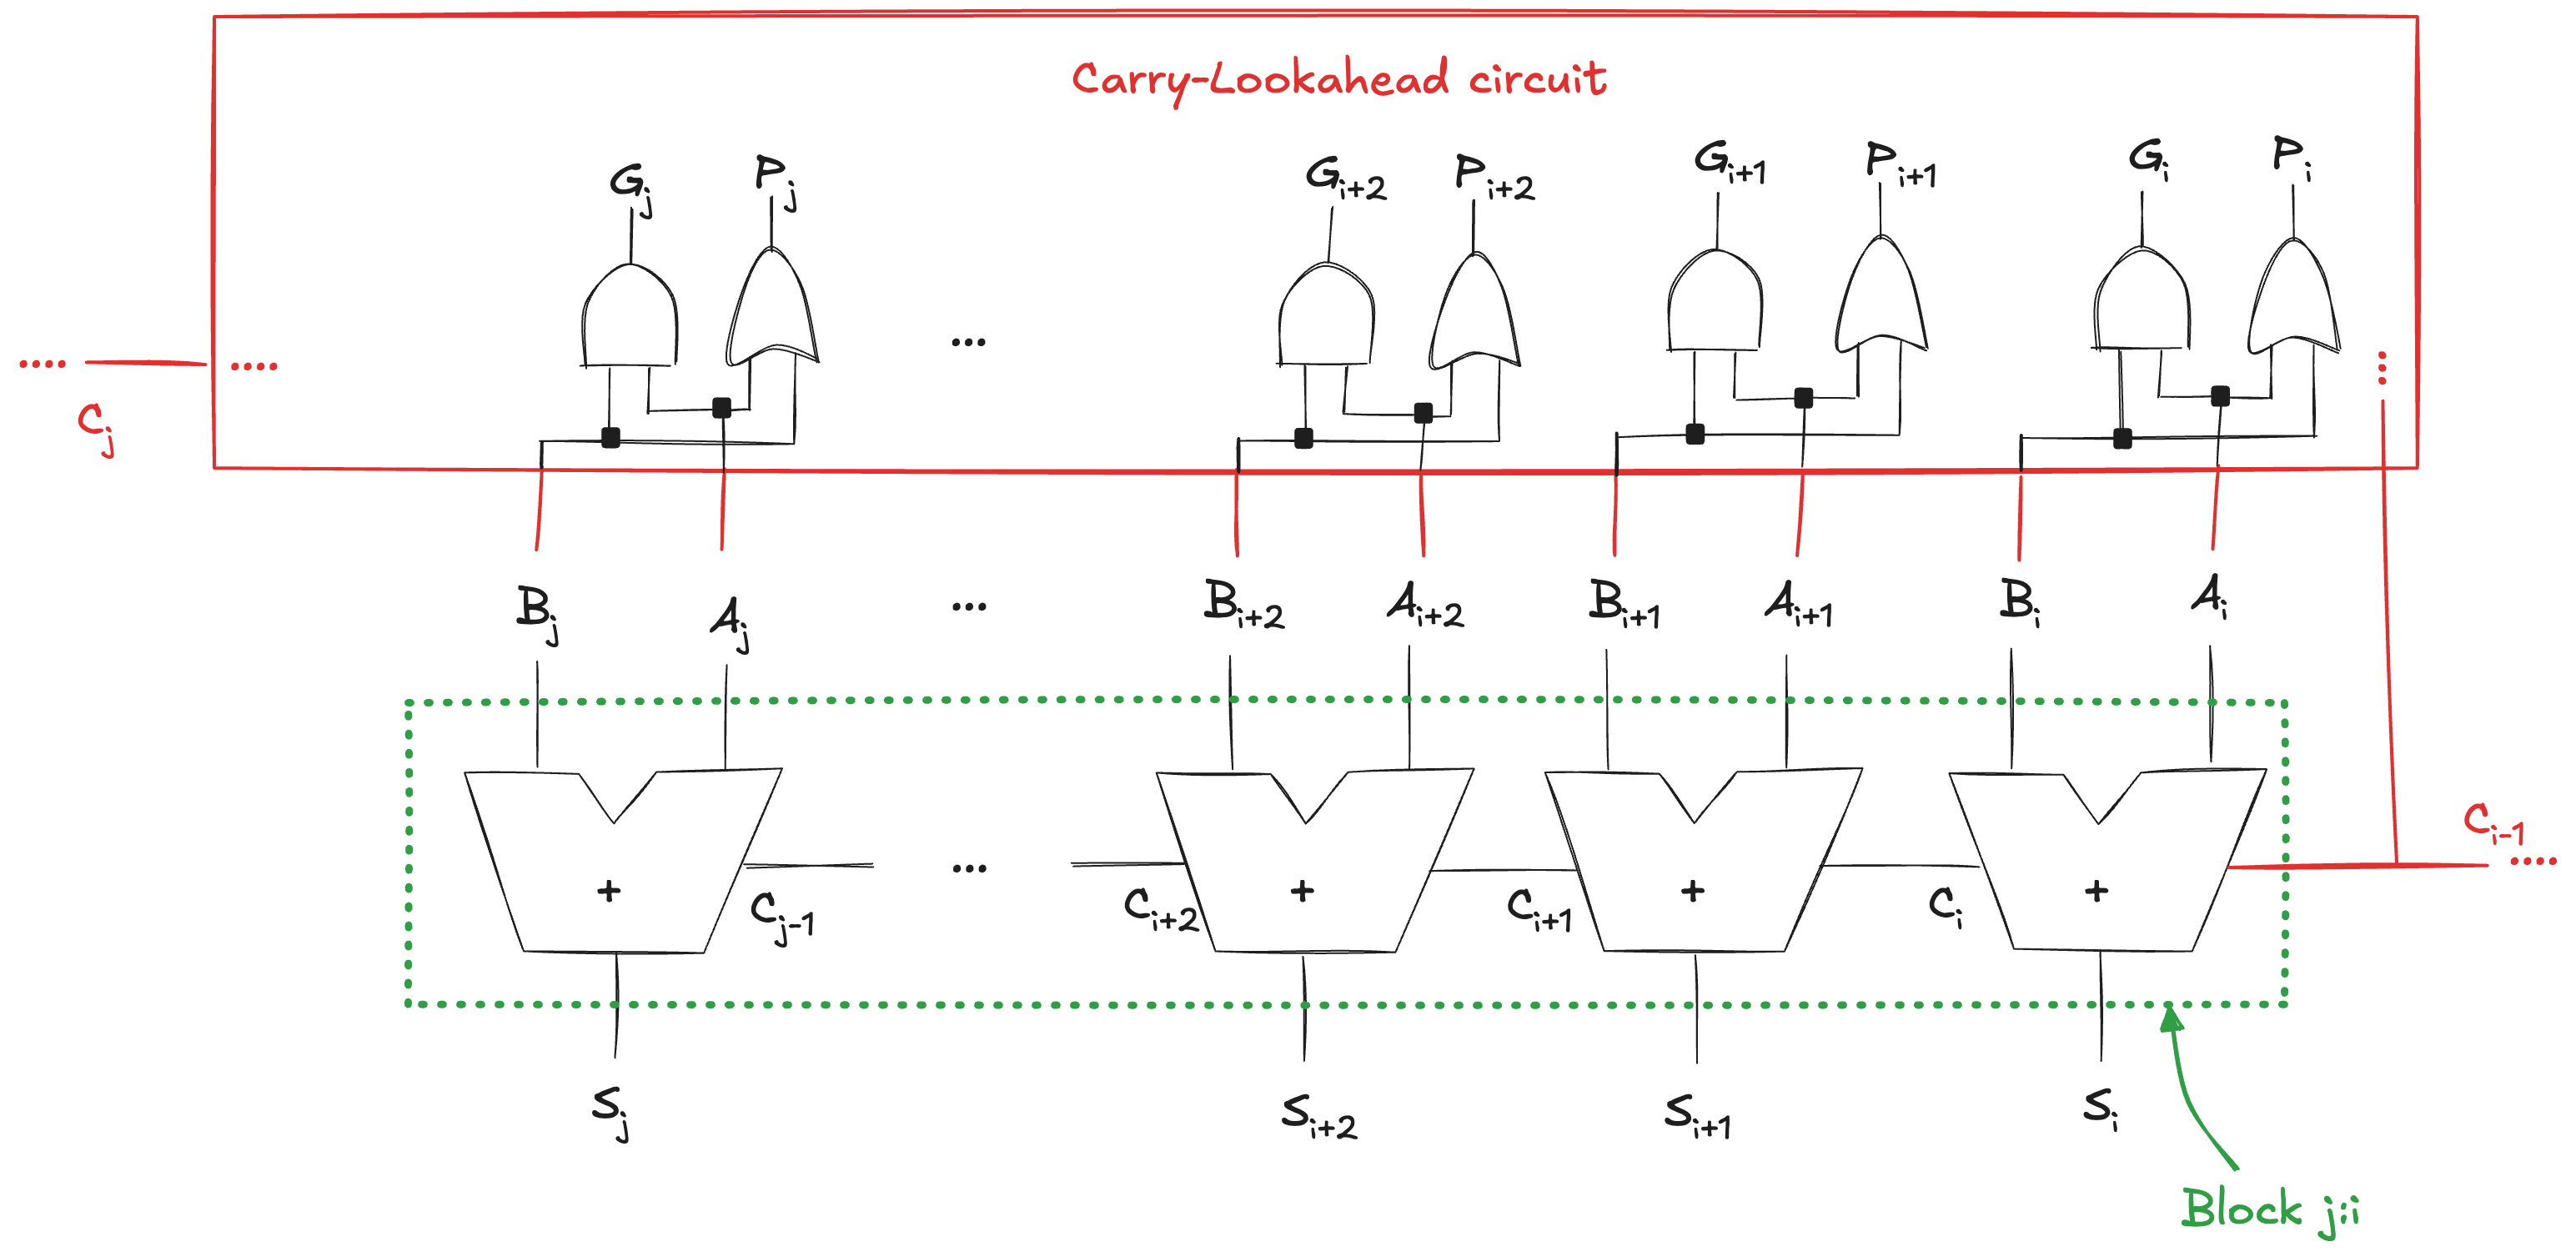

Using these definitions, we can rewrite the carry logic for a given bit position. A bit position will **produce a carry-out if it either generates a carry on its own or propagates an incoming carry**:

$\displaystyle C_i = G_i + P_i \; C_{i-1}$

The generate and propagate definitions **extend to multiple-bit blocks**. A block is said to generate a carry if it produces a carry out independent of the carry in to the block, and this happens if the most significant column generates a carry, or if the previous column generated a carry and the most significant column propagates it, and so forth:

$\displaystyle G_{j:i} = G_j + P_j \; ( \; G_{j-1} + P_{j-1} \; ( \; G_{j-2} + P_{j-2} \; ( \; ... \; ( \; G_{i+2} + P_{i+2} \; ( \; G_{i+1} + P_{i+1} \; G_i \; ) ..)))$

For example, the generate signal for the second 4-bit block is:

$\displaystyle G_{7:4} = G_7 + P_7 \; ( \; G_6 + P_6 \; ( \; G_5 + P_5 \; G_4 \; ) \; )$

A block is said to propagate a carry if it produces a carry-out whenever there is a carry-in to the block. This condition holds when all the individual bit positions within the block propagate the carry:

$\displaystyle P_{j:i} = P_j \; P_{j-1} \; P_{j-2} \; ... \; P_{i+2} \; P_{i+1} \; P_i$

For example, the propagaye signal for the second 4-bit block is:

$\displaystyle P_{7:4} = P_7 \; P_6 \; P_5 \; P_4$

Using the block generate and propagate signals, we can compute the carry out of the block:

$\displaystyle C_j = G_{j:i} + P_{j:i} \; C_{i-1}$

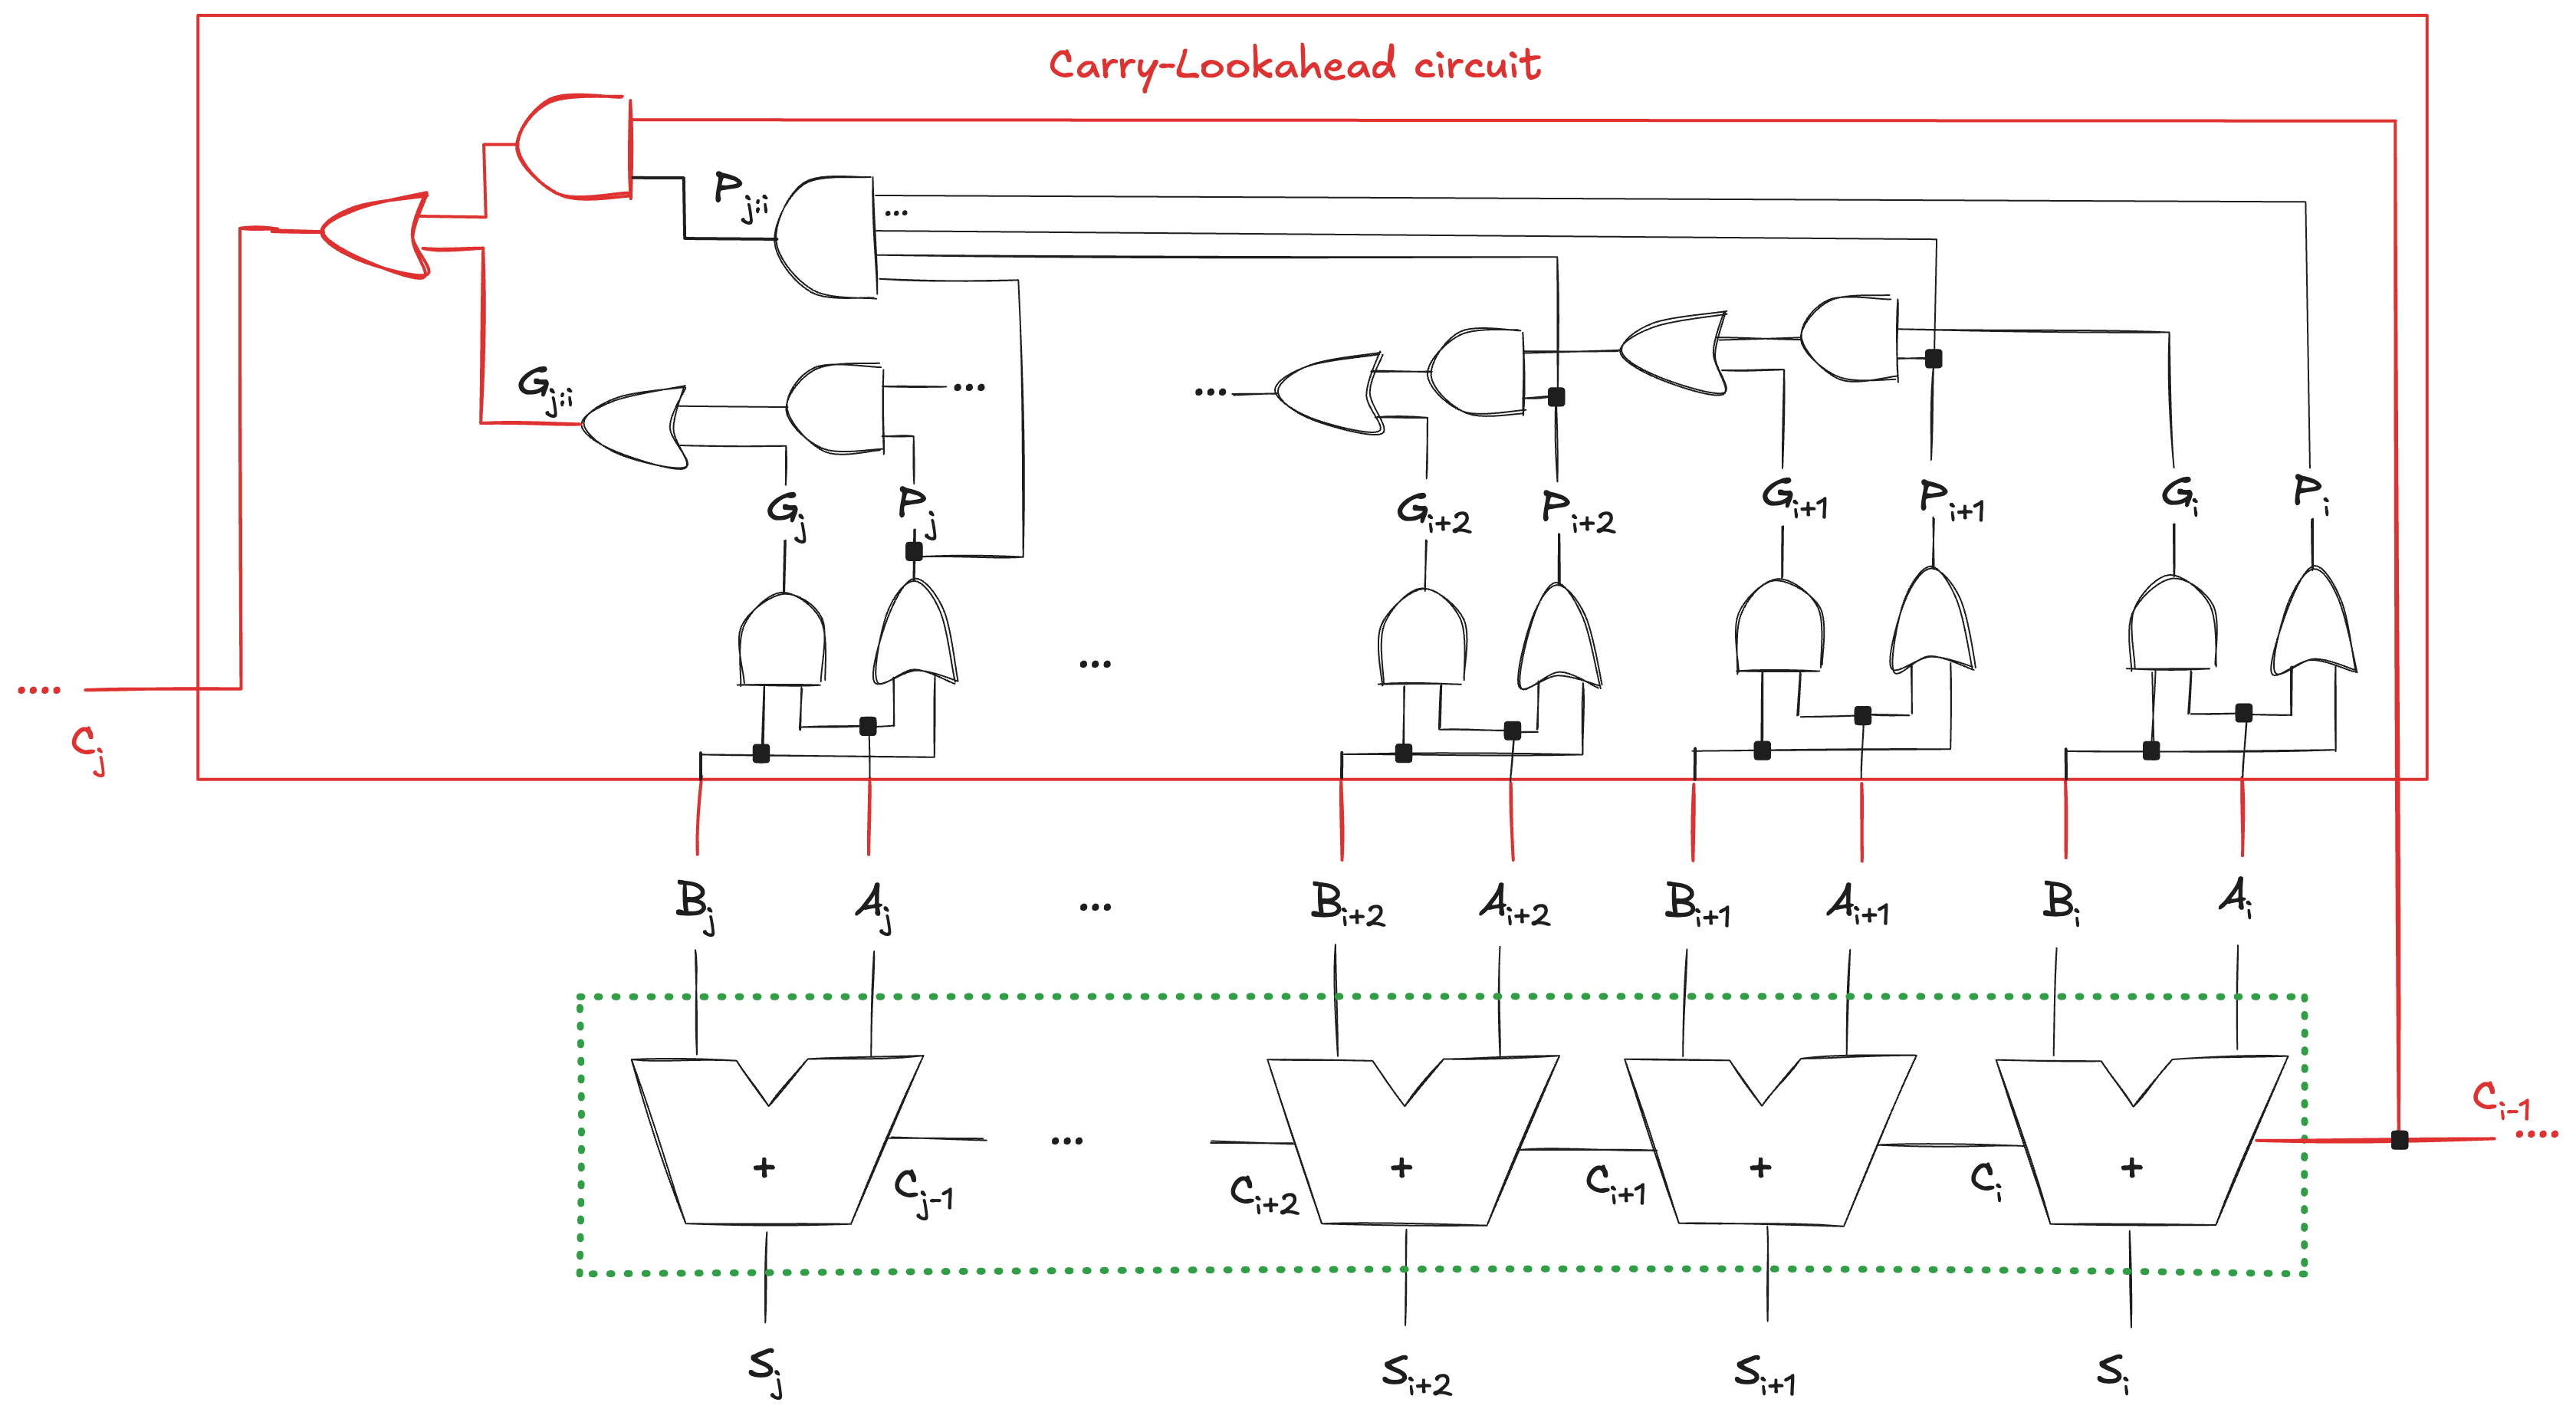

For example, a 32-bit carry-lookahead adder can be built from eight 4-bit blocks. Each block includes a 4-bit ripple-carry adder along with lookahead logic that computes the block’s carry-out based on its carry-in. The final block simply uses a ripple-carry adder, since no additional lookahead logic is needed beyond that point:

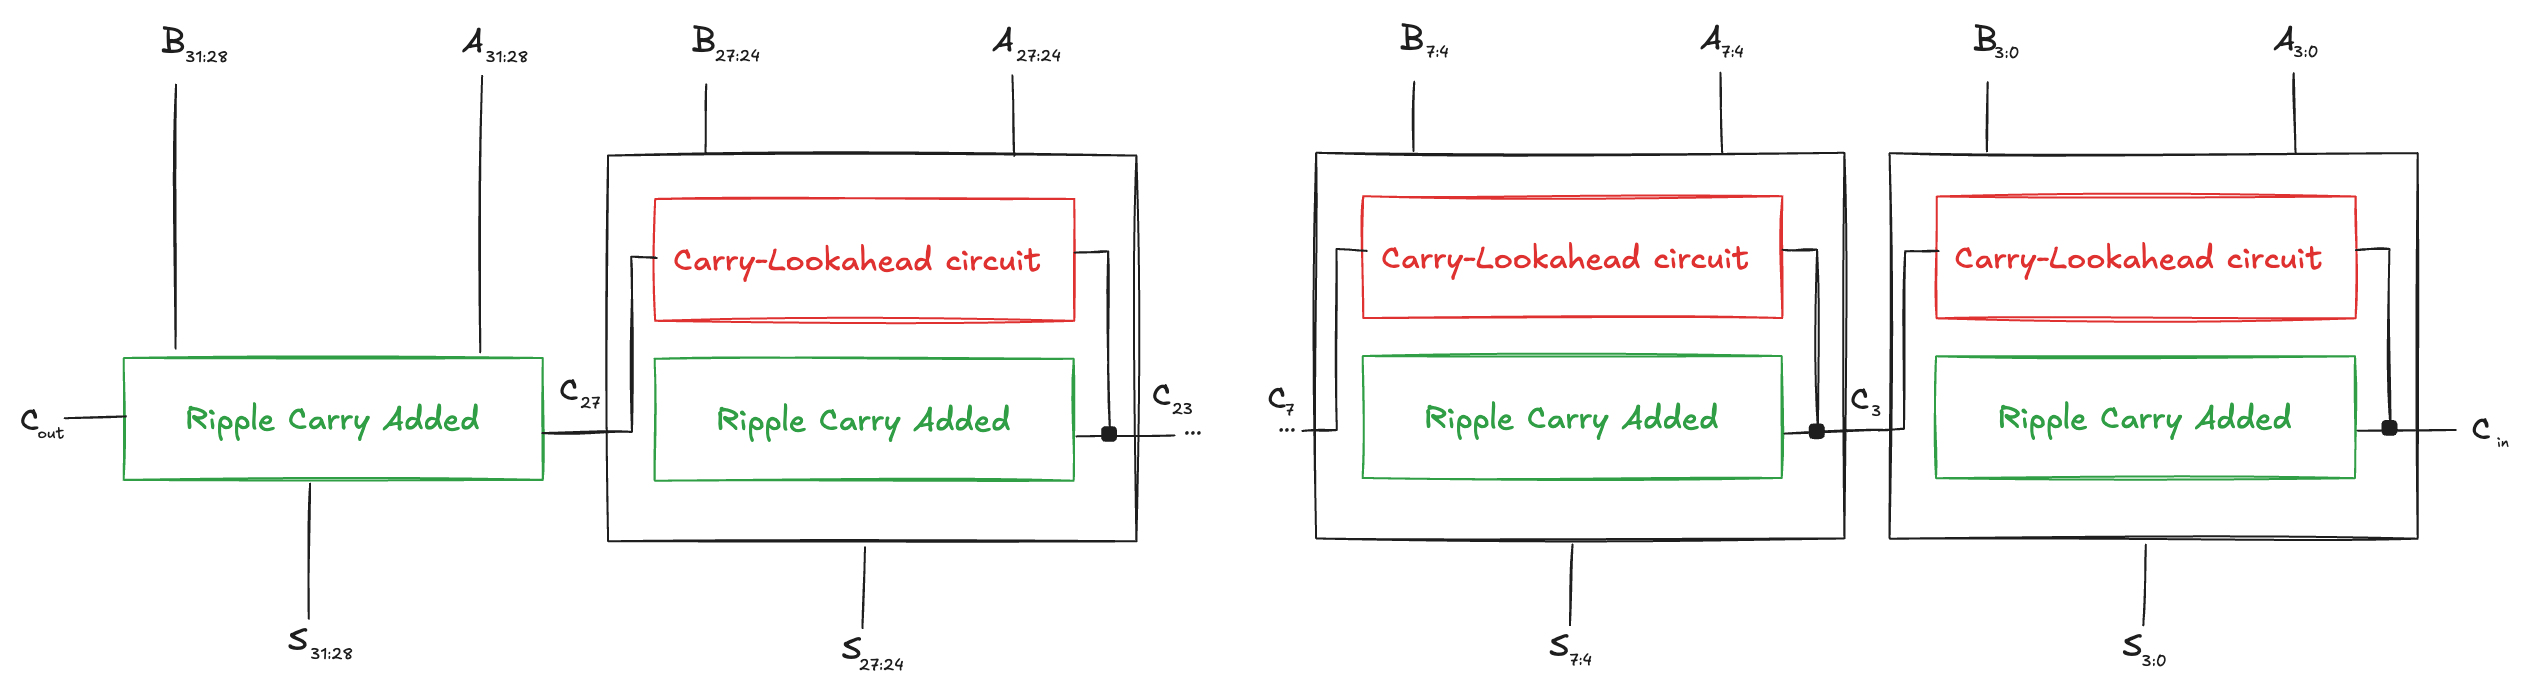

All CLA blocks compute their column-level and block-level generate and propagate signals in parallel. Once these signals are available, the carry-in propagates through the lookahead logic of each block to compute the carry-out for the next stage. Specifically, Cin is used to generate C3 in the first block, C3 is used to compute C7 in the second block, then C7 is used to generate C11, and so on, up to C27 in the final stage. The total delay is determined by the number of logic levels required to compute the carry signals across the blocks, rather than by the number of bits:

$\displaystyle t_{CLA} = t_{pg} + t_{pg-block} + (\frac{N}{k} - 1) \; t_{AND-OR} + k \; t_{FA}$

where:
- $\displaystyle t_{pg}$ is the time to compute column propagate and generate signals (a single AND or OR gate)
- $\displaystyle t_{pg-block}$ is the time to compute the block propagate and generate signals (this dependes on the number of bits in the block, for a 4-bit block it is 6 AND or OR gates) 
- $\displaystyle (N/k - 1)$ is the number of blocks that include lookahead logic, which equals the total number of bits divided by the number of bits per block, minus one (since the final block is a standard ripple-carry adder)
- $\displaystyle t_{AND-OR} + k$ is the time to compute the carry-out of a block,given the carry-in and the block generate and propagate signals (an AND and a OR gate for each block). This computation is done in sequence for each block, since it depends on the carry-in from the previous block.
- $\displaystyle t_{FA}$ is the time of a one bit full adder, wich is used k times in the last CRA blocck.

For N > 16, the carry-lookahead adder is generally much faster than the ripple-carry adder. However, the adder delay still increases linearly with N. For example, we compare the delay of a 32-bit ripple-carry adder and a 32-bit carry-lookahead adder with 4-bit blocks. We assume that each two-input gate delay is 100ps and that the full adder delay is 300ps:

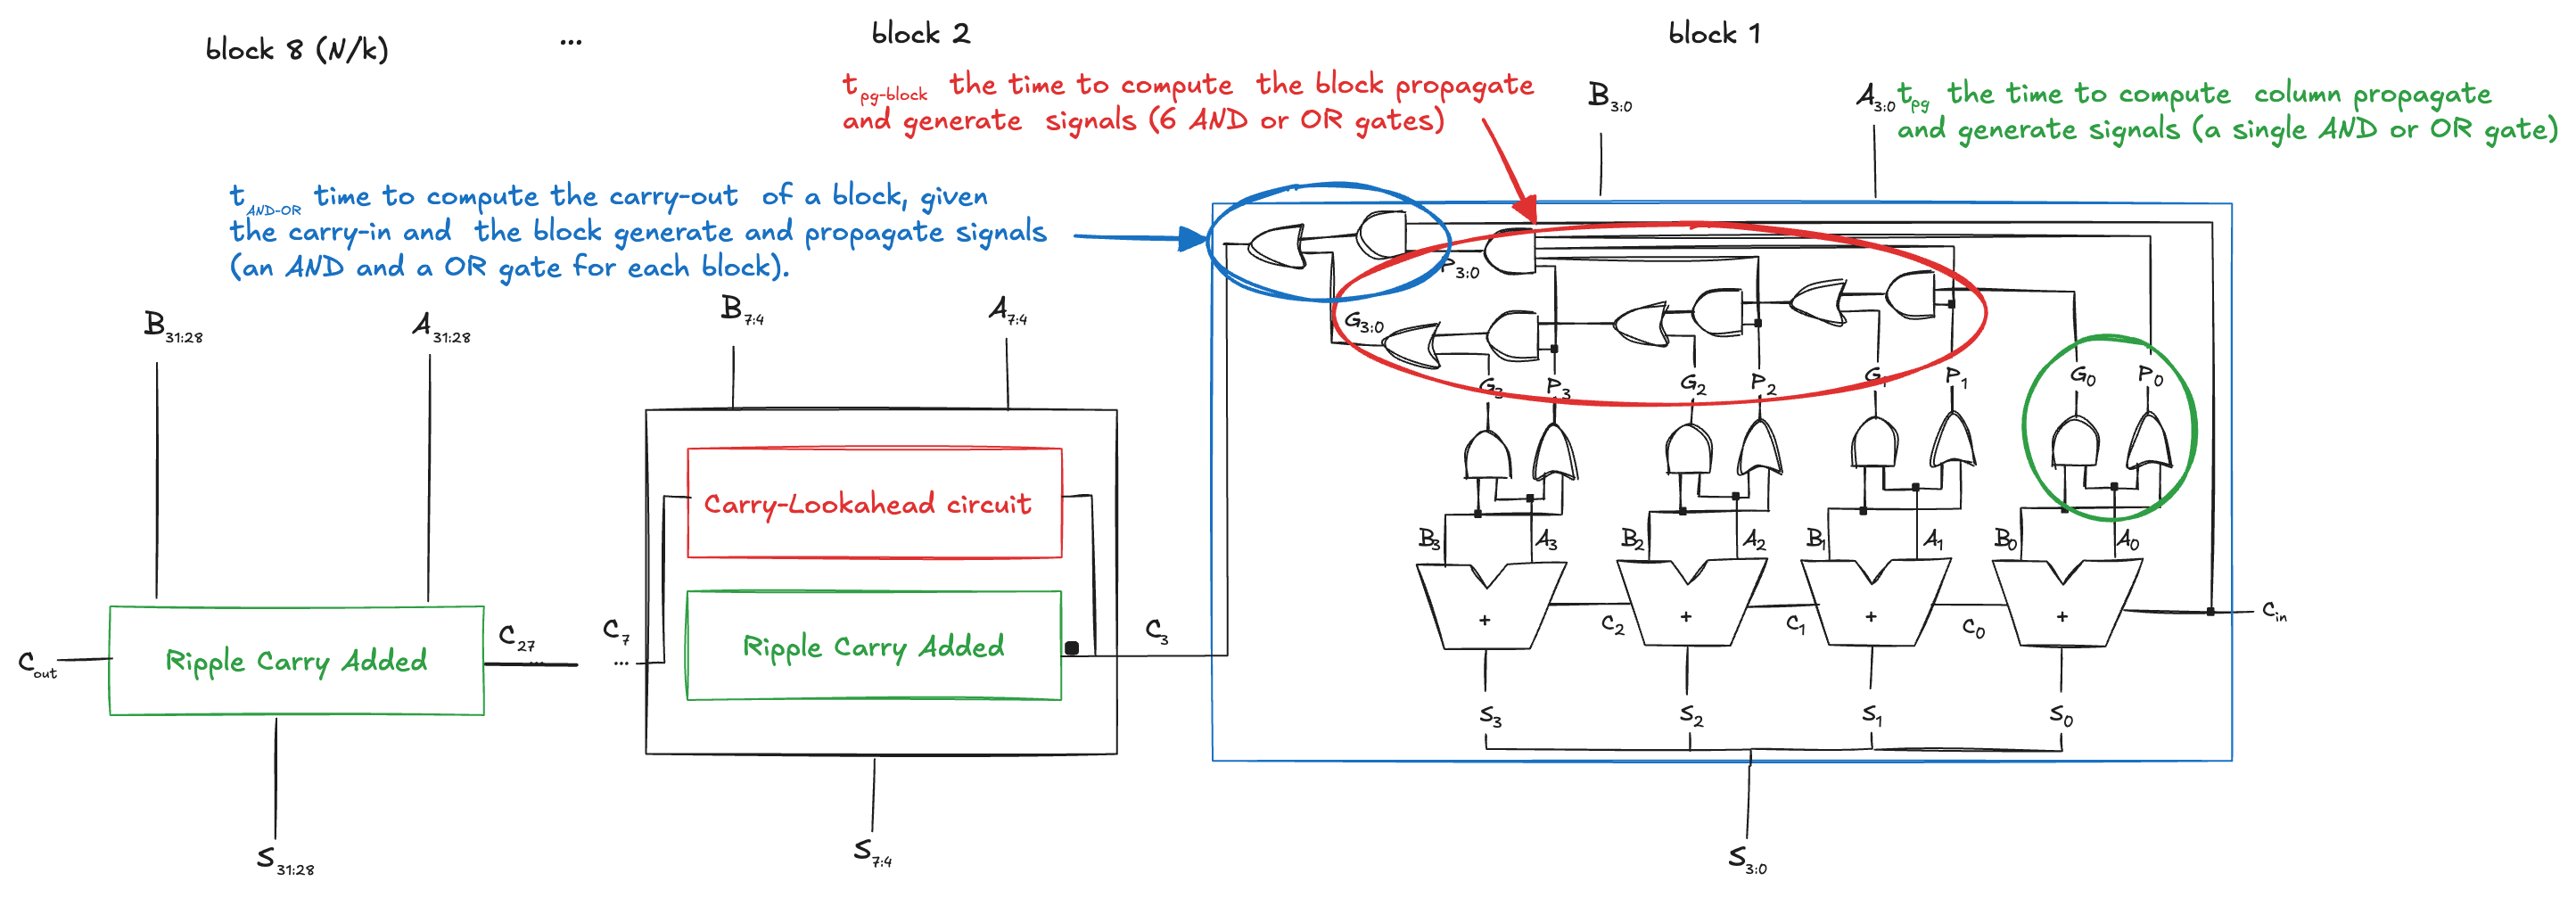

According to the previous equations:

$\displaystyle t_{ripple} = 32*300ps = 9.6ns$

$\displaystyle t_{CLA} = 100ps + 6*100ps + (32/4 - 1)*2*100ps + 4*300ps =  3.3ns$

In those conditions, the carry-lookahead adder is more three times faster than the ripple-carry adder. However, faster adders **require more hardware** and therefore are **more expensive** and **power-hungry**. These trade-offs must be considered when choosing an appropriate adder for a design. Modern synthesis tools select among many possible implementations, choosing the cheapest (smallest) design that meets the speed requirements. This greatly simplifies the designer’s job. We can write in VHDL the code for a 4-bit CLA module that can be used as a building block for larger carry-lookahead adders:

In [ ]:
entity CLA4 is
    port (A, B   : in  std_logic_vector(3 downto 0);
           C_in   : in  std_logic;
           S      : out std_logic_vector(3 downto 0);
           C_out  : out std_logic);
end CLA4;

architecture behavioral of CLA4 is
    signal G, P : std_logic_vector(3 downto 0);
    signal C    : std_logic_vector(4 downto 0);

begin
    -- Initial carry
    C(0) <= C_in;

    -- Generate and Propagate
    G <= A and B;
    P <= A xor B;

    -- Carry Lookahead Logic
    C(1) <= G(0) or (P(0) and C(0));
    C(2) <= G(1) or (P(1) and G(0)) or (P(1) and P(0) and C(0));
    C(3) <= G(2) or (P(2) and G(1)) or (P(2) and P(1) and G(0)) or
             (P(2) and P(1) and P(0) and C(0));
    C(4) <= G(3) or (P(3) and G(2)) or (P(3) and P(2) and G(1)) or
             (P(3) and P(2) and P(1) and G(0)) or
             (P(3) and P(2) and P(1) and P(0) and C(0));

    -- Sum
    S <= P xor C(3 downto 0);

    -- Final carry-out
    C_out <= C(4);
end behavioral;

### Subtractor

Recall that adders can add positive and negative numbers using two’s complement number representation. Subtraction is almost as easy, to compute:

$\displaystyle Y = A - B$

we simply create the two’s complement of B (inverting all bits of B and adding 1) and the add A:

$\displaystyle Y = A + \overline{B} + 1$

This sum can be performed with a single CPA by adding A + B with Cin = 1: 

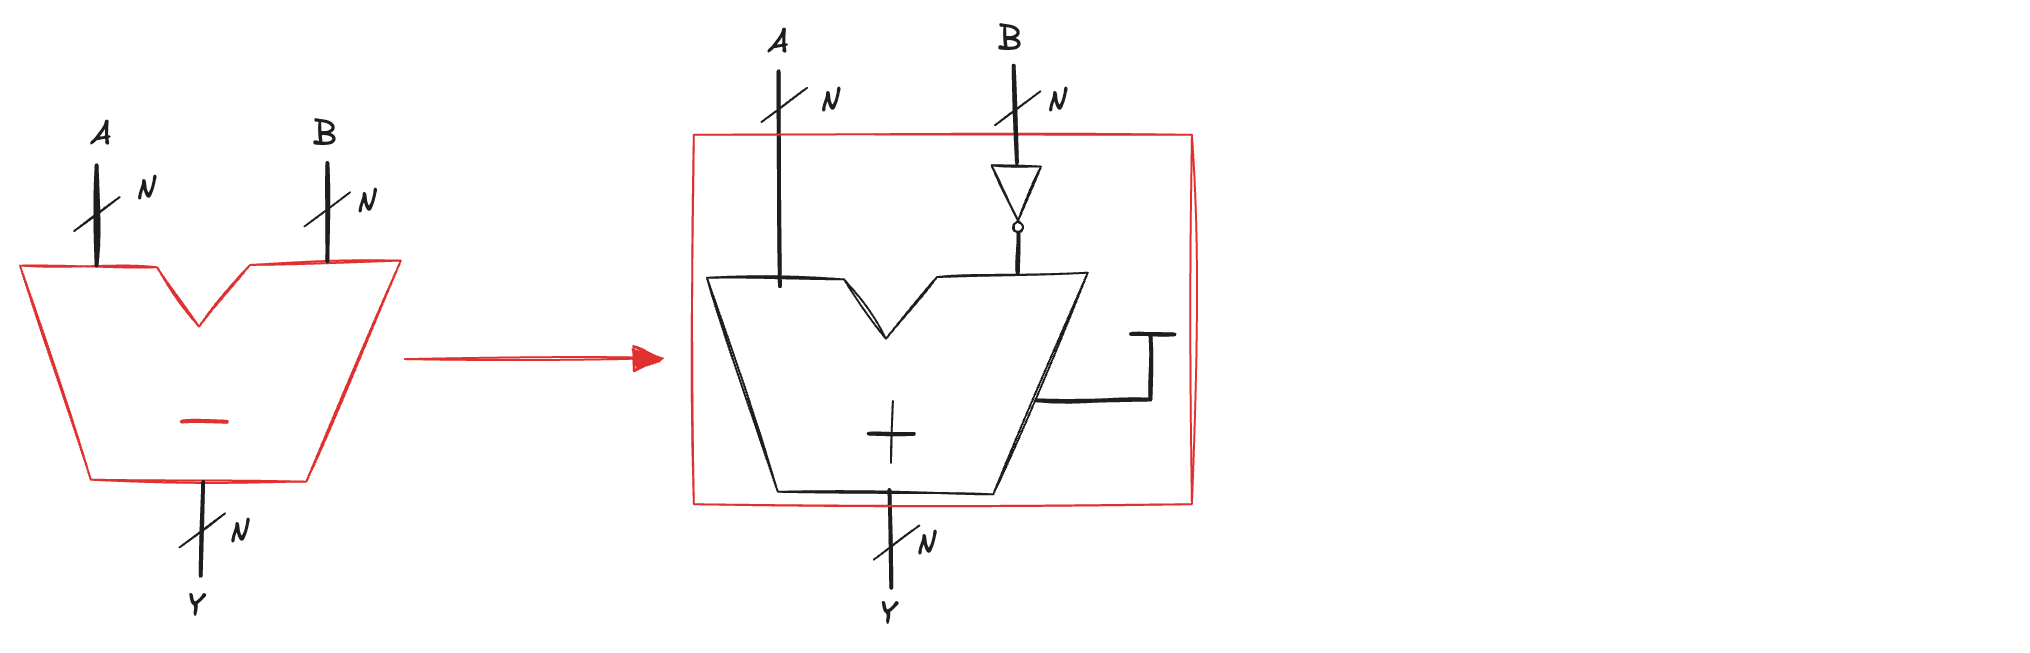

## Comparators

A comparator is a combinational circuit that determines whether two binary numbers are equal (**equality comparator**) or whether one is greater or less than the other (**magnitude comparator**). The equality comparator is simpler in hardware. 

### Equality comparator

An equality comparator  compares each corresponding bit of the two input numbers, A and B, using XNOR gates. If all bits in every column match, the output indicates that the numbers are equal:

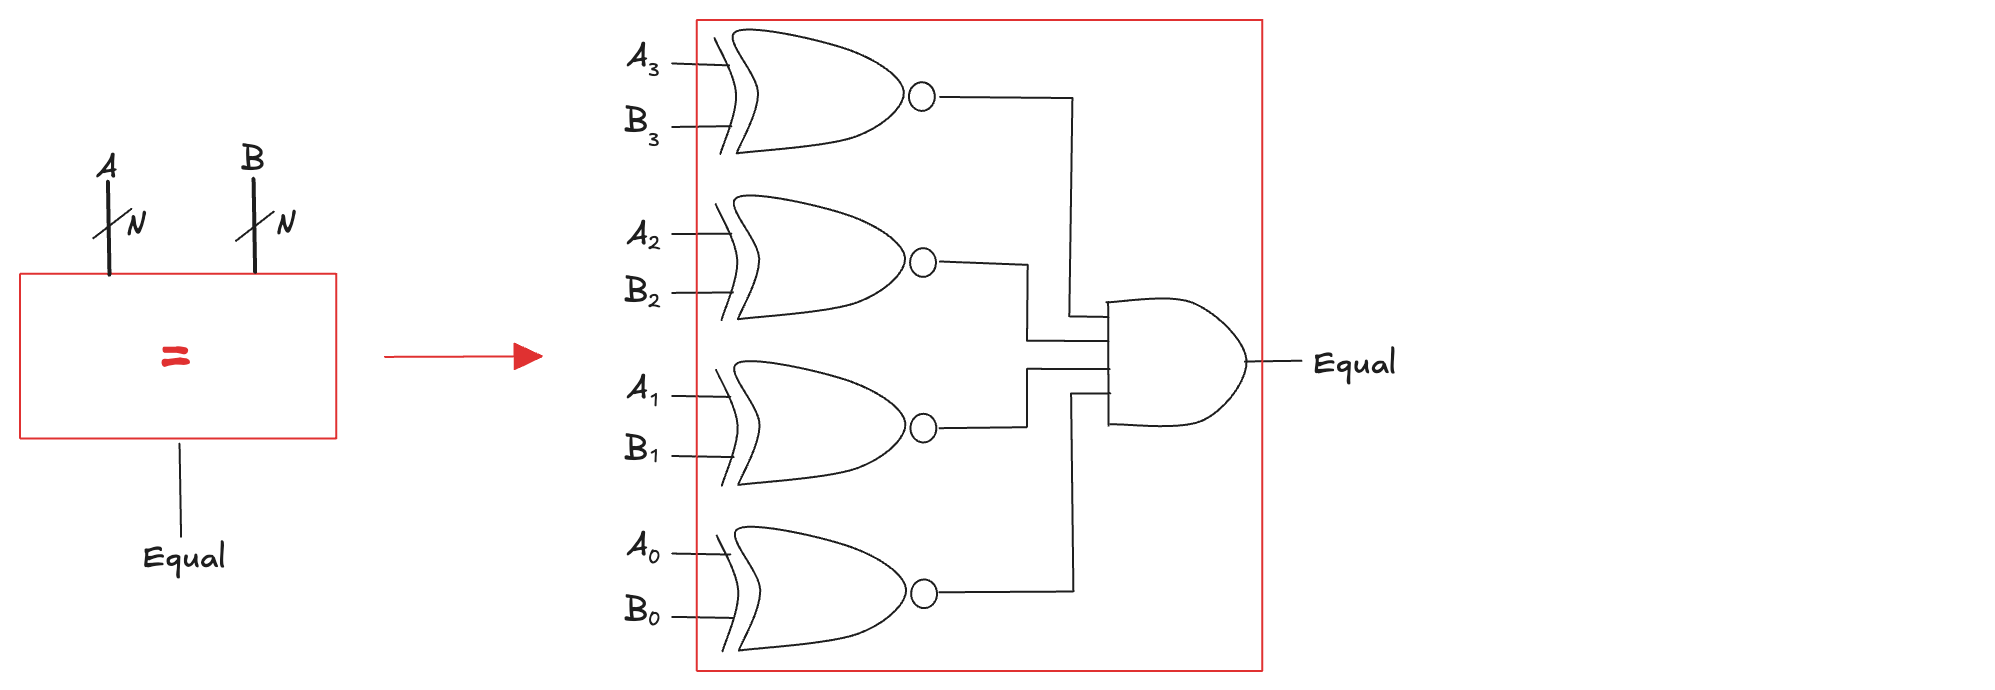

### Magnitude comparator

Magnitude comparison of signed numbers is typically performed by computing (A - B) and examining the sign bit (the most significant bit) of the result. If the result is negative (i.e., the sign bit is 1), then A < B; otherwise, A >= B. However, this method can give incorrect results in the presence of **overflow**. Overflow occurs when the sign of the result does not match the expected outcome based on the input signs, specifically when A and B have opposite signs and the sign bit of the result differs from the sign of A. To handle this correctly, we must detect this overflow condition and adjust the comparison accordingly:

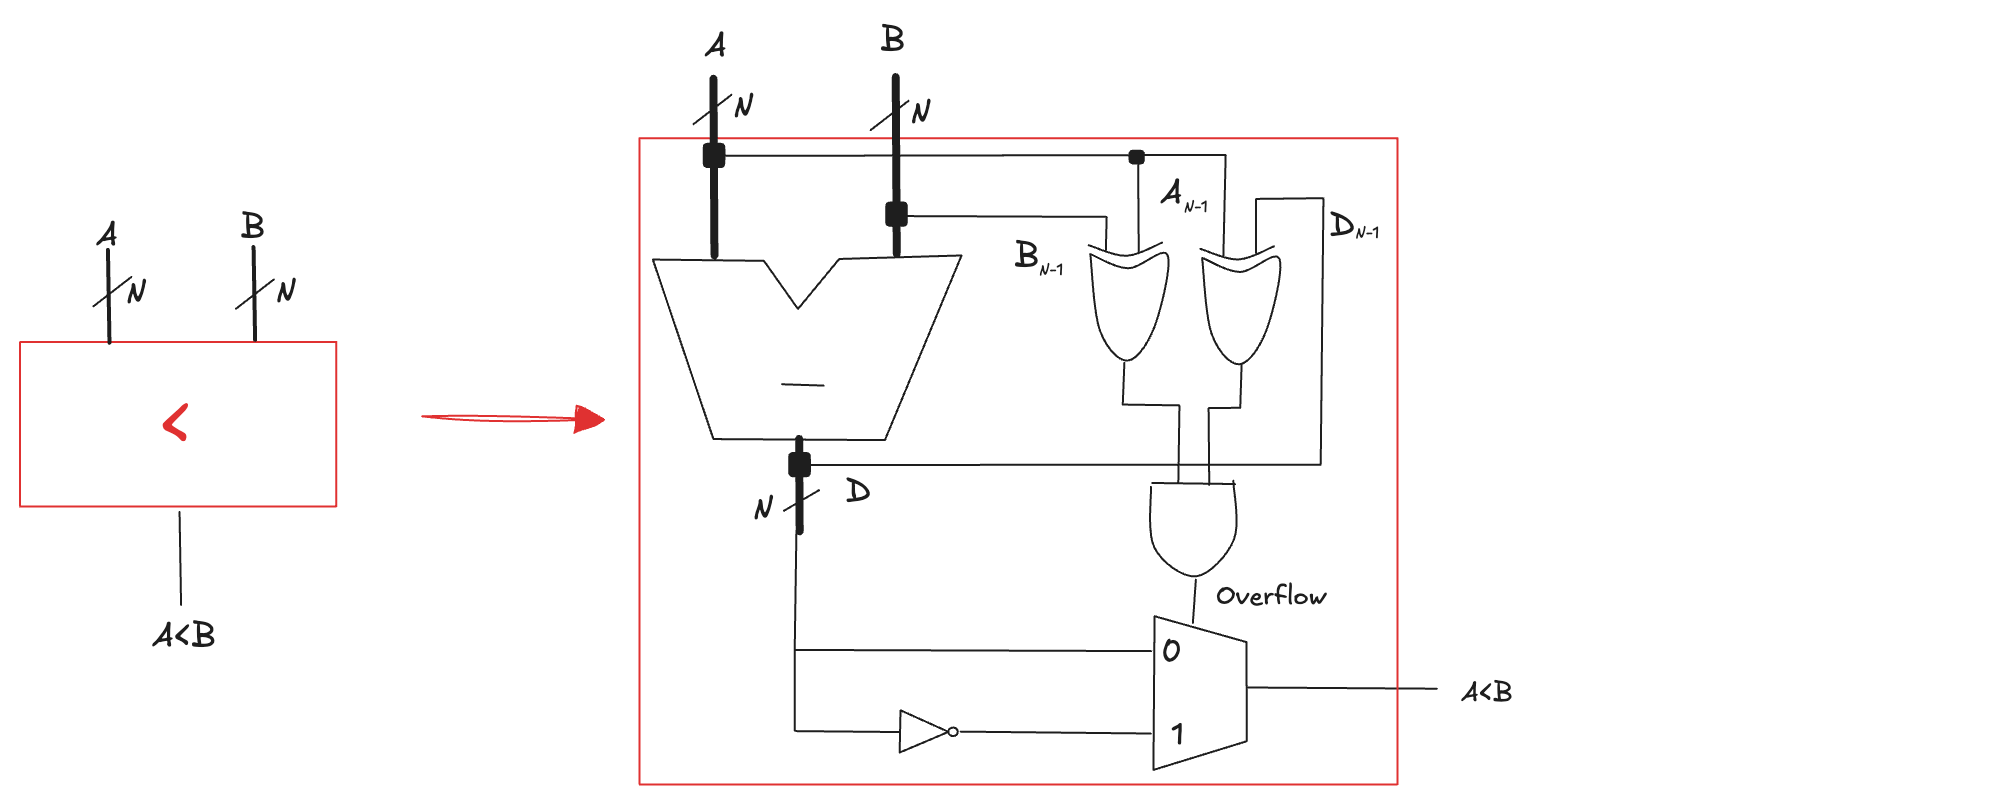


## Arithmetic/Logical Unit (ALU)

An **Arithmetic/Logic Unit (ALU)** integrates a range of arithmetic and logical operations into a single hardware block. A typical ALU can perform operations such as **addition**, **subtraction**, **bitwise AND**, and **bitwise OR**. The ALU is a central component of most computer architectures, responsible for executing the core computational tasks. To control which operation is executed, the ALU receives a **control signal** that selects the desired function. In diagrams, control signals are typically shown in a different color to distinguish them from **data signals**, which carry the actual operands and results.

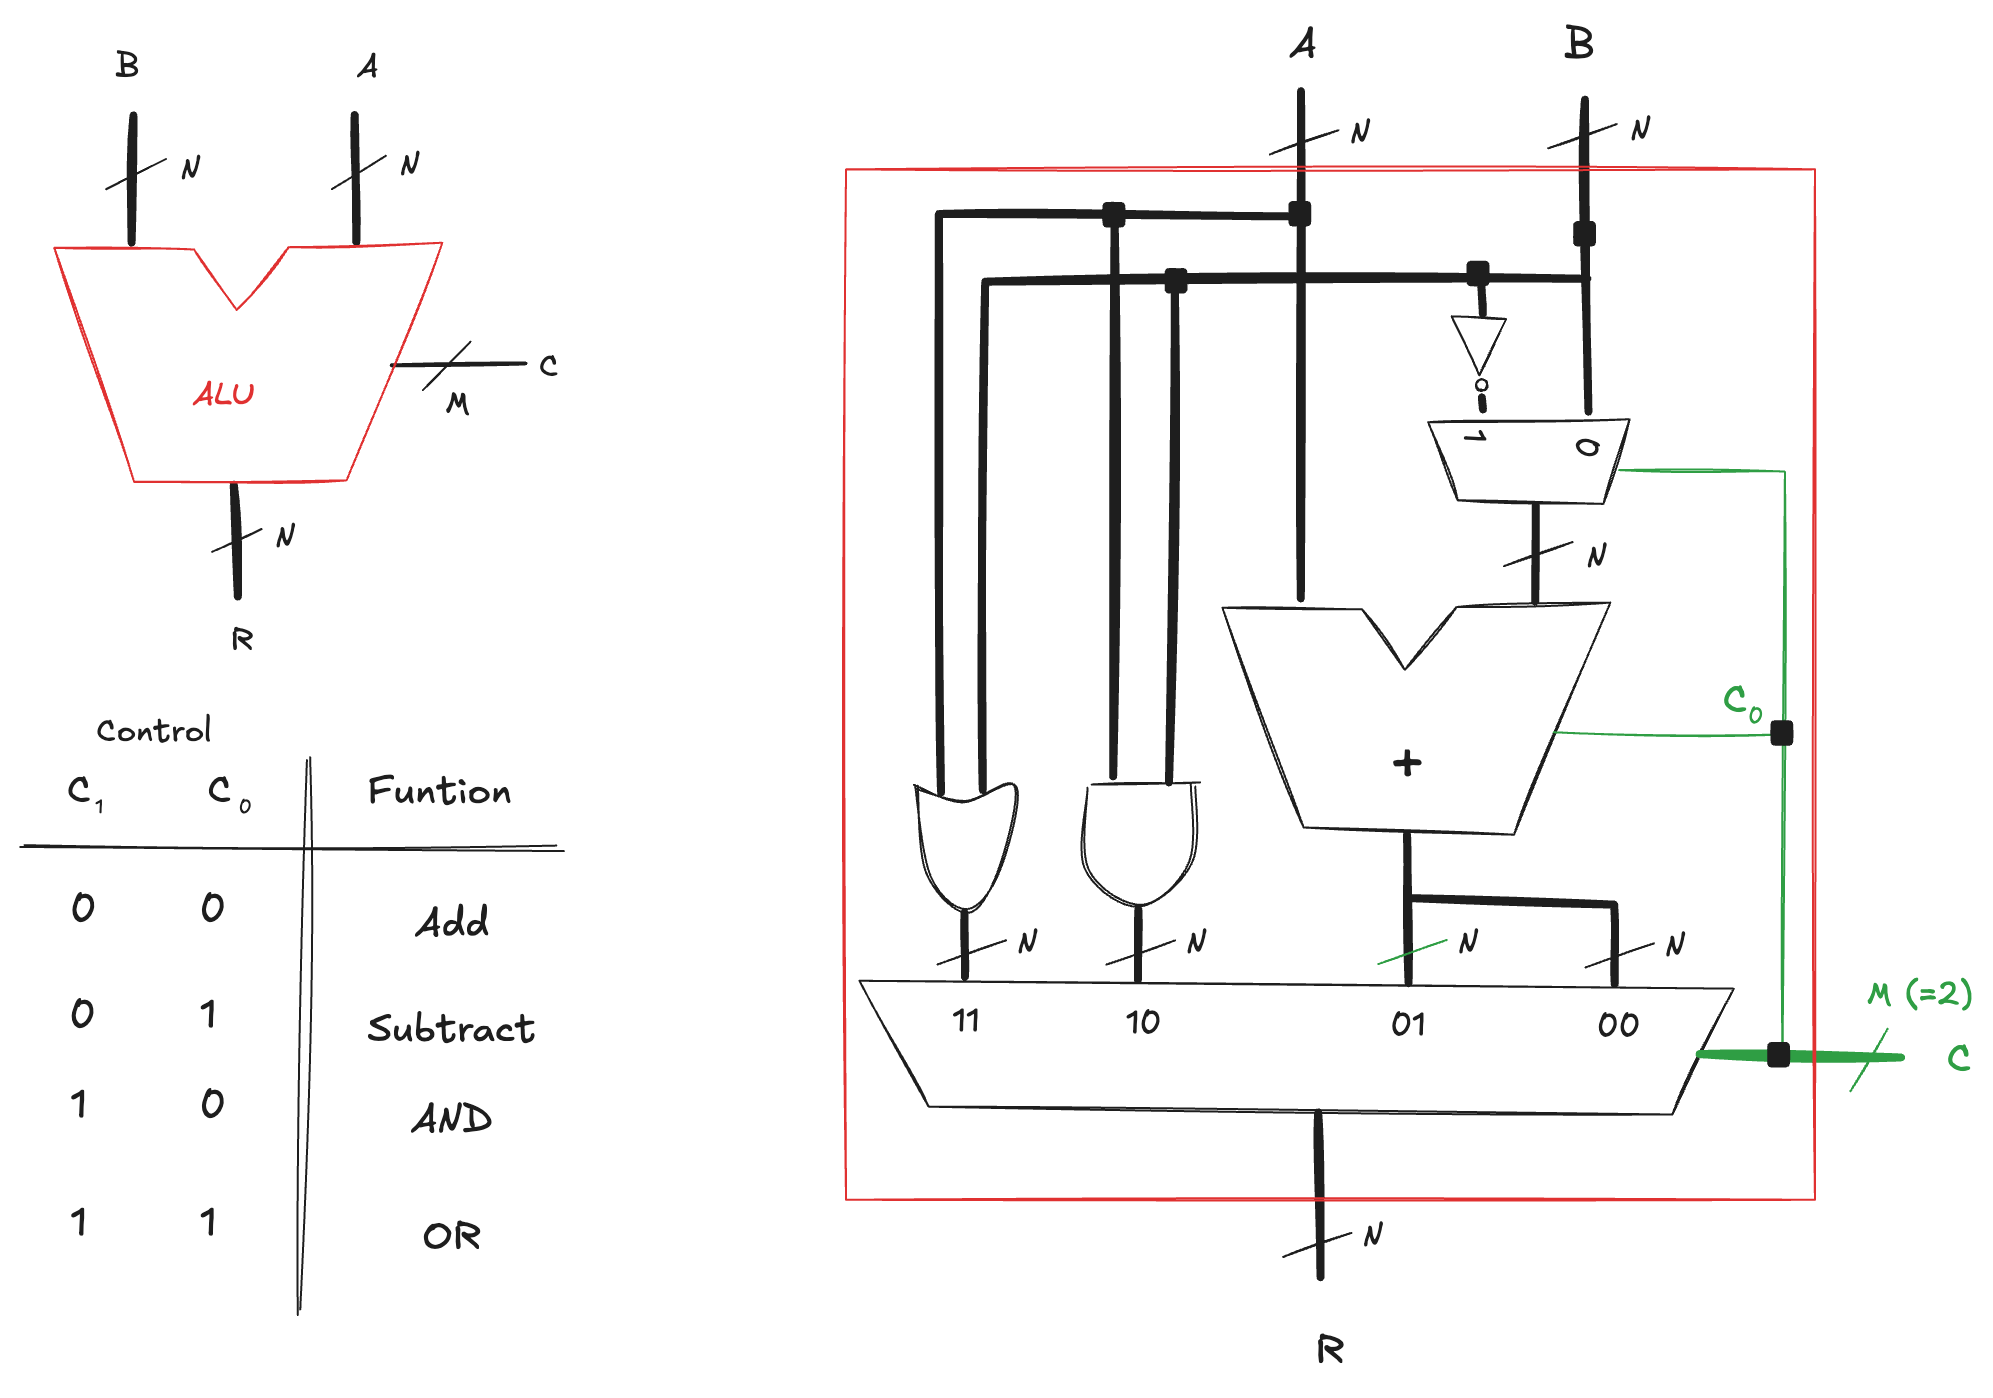

The ALU implementation includes an N-bit adder, along with N 2-input AND gates and N 2-input OR gates. It also incorporates inverters and a multiplexer to conditionally invert input B when the control signal C0 is asserted, enabling two’s complement subtraction. A 4:1 multiplexer selects the final output based on a 2-bit control signal C:
- C = 00: the multiplexer selects the sum output, computing the sum
- C = 01: the ALU performs subtraction, this is achieved by inverting B and setting the carry-in using C0 (which is 1), so the adder computes the two complement subtraction
- C = 10: the ALU outputs the bitwise AND
- C = 11: the ALU outputs the bitwise OR

### Flags

Some ALUs produce extra outputs, called **flags**, that indicate information about the ALU output:

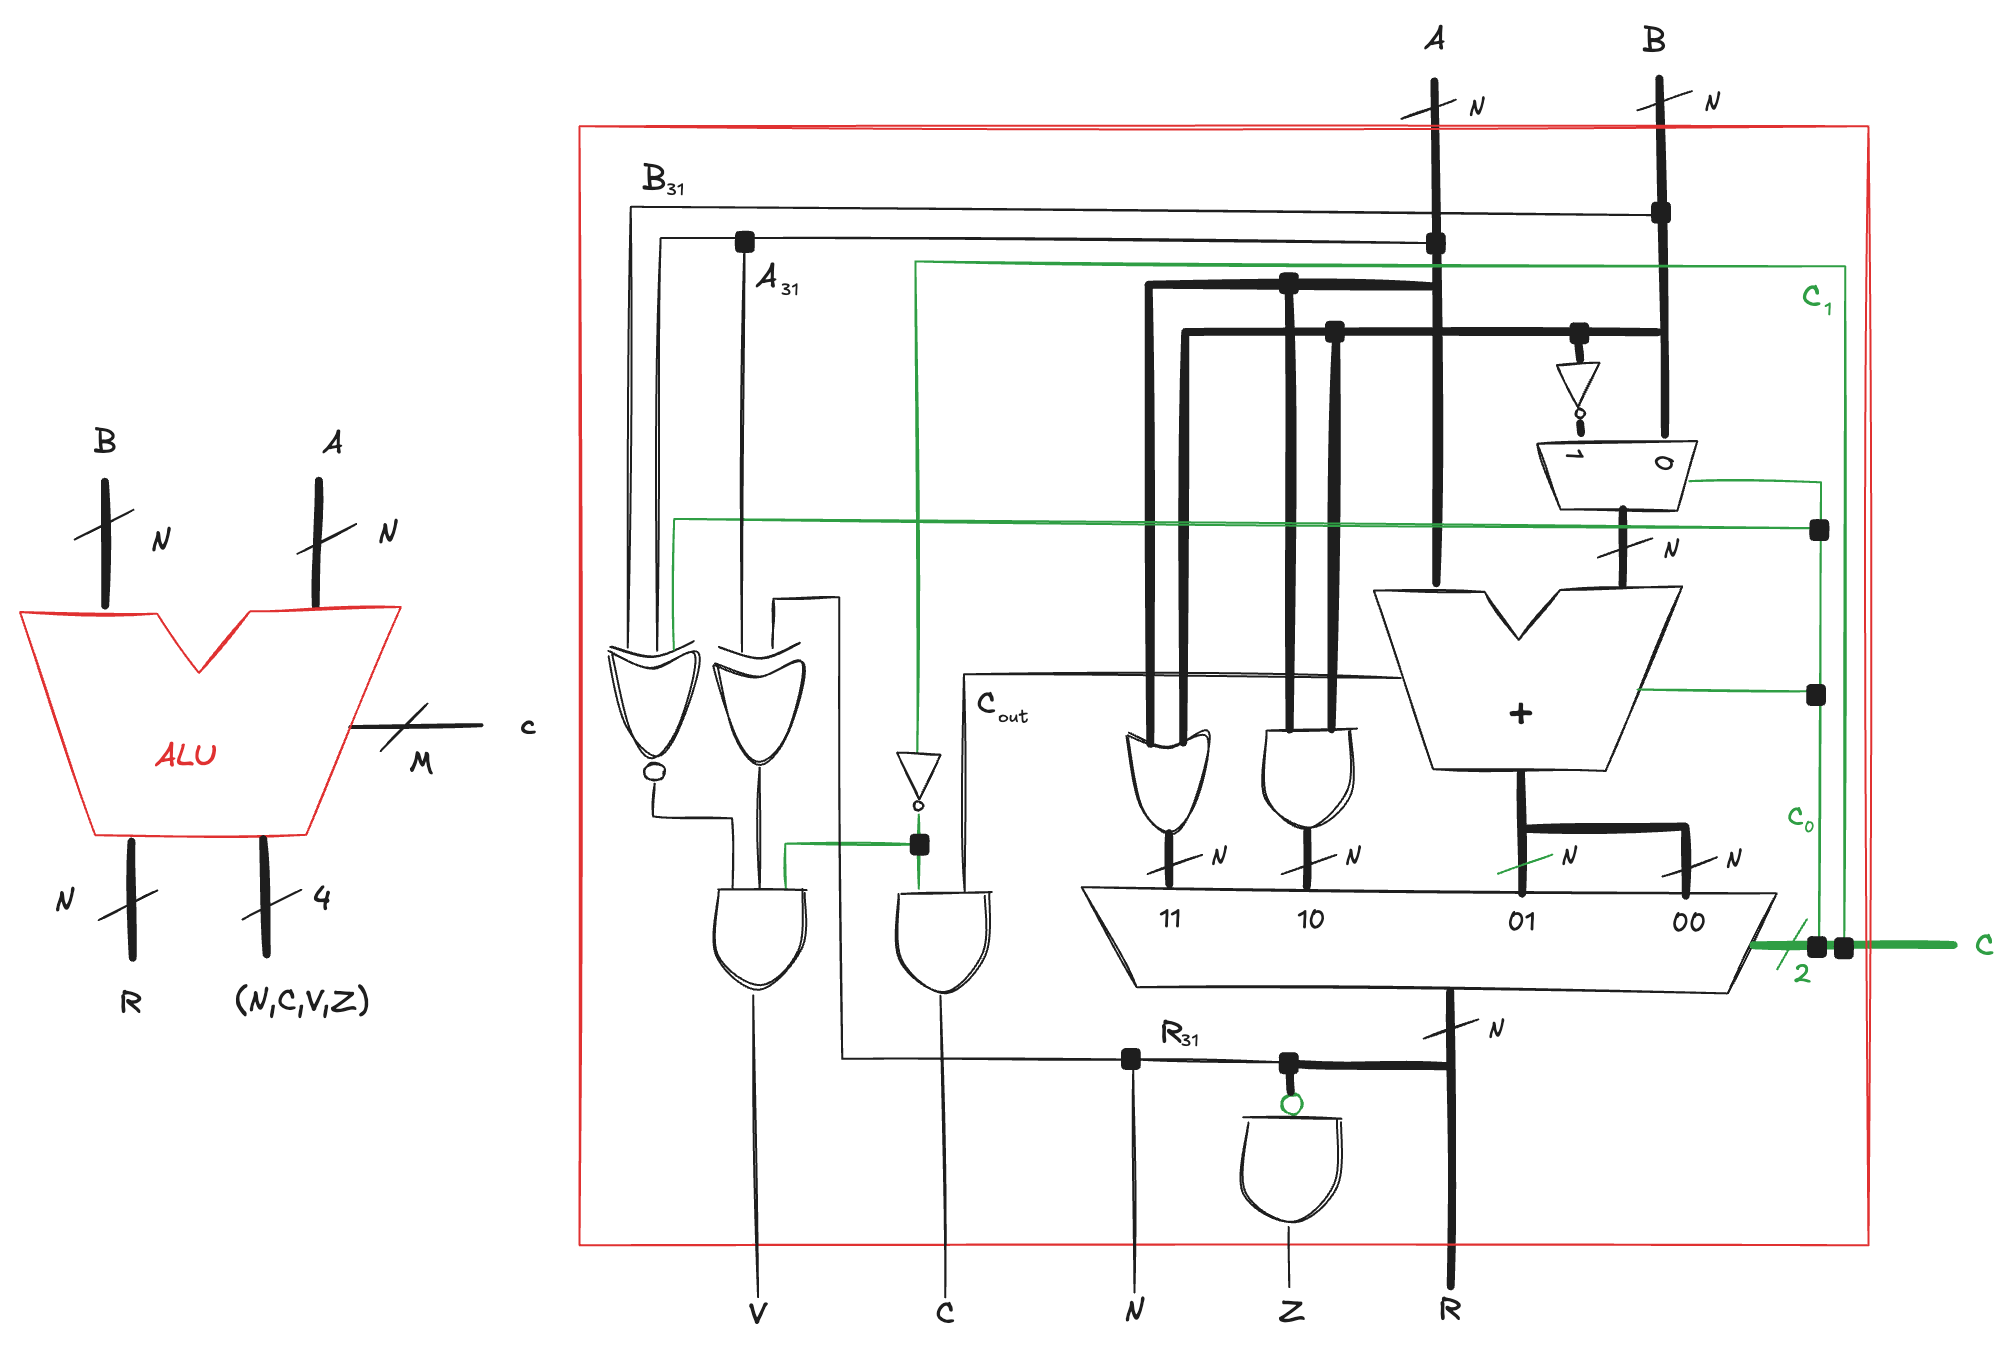

As shown in the schematic, the flags output is composed of the **N**, **Z**, **C**, and **V** flags. 

The most significant bit of a two’s complement number is 1 if it is negative and 0 otherwise. Thus, the **N (Negative) flag** is connected to the most significant bit of the ALU output. 

The **Z (Zero) flag** is asserted when all of the bits of the result are 0, as detected by the N-bit NOR gate. 

The **C (Carry out) flag** is asserted when the adder produces a carry out and the ALU is performing addition or subtraction (indicated C1 = 0). 

Overflow detection is trickier, as it depends on the operation being performed. So, the **V (oVerflow) flag** is asserted when all three of the following conditions are true:
- the ALU is performing addition or subtraction (C1 = 0),
- A and sum have opposite signs, as detected by the XOR gate,
- overflow is possible as detected by the XNOR gate: either A and B have the same sign and the adder is performing addition (C0 = 0) or A and B have opposite signs and the adder is performing subtraction (C0 = 1). The 3-input AND gate detects when all three conditions are true and asserts V. 

### Comparisons

The does not only perform arithmetic operations, but it can also be used for **comparisons** between two operands. This is typically done by subtracting the two operand and examining the resulting flags to determine the relationship between the two numbers:

| Condition | Expression           | Meaning                                  |
|------------|---------------------|------------------------------------------|
| A = B      | Z = 1               | The subtraction result is zero           |
| A ≠ B      | Z = 0               | The subtraction result is nonzero        |
| A < B      | N xor V = 1         | Negative and overflow flags differ       |
| A ≤ B      | Z or (N xor V) = 1  | Either equal or less than                |
| A > B      | Z and (N xor V) = 0 | Not equal and not less than              |
| A ≥ B      | N xor V = 0         | Negative and overflow flags are the same |


If the **Zero flag (Z)** is set, the subtraction result is zero, which means that **A equals B**. If the Zero flag is not set, the result is different from zero, and consequently **A is not equal to B**.

Magnitude comparisons require a bit more attention. When the subtraction **A – B** yields a negative result, the **Negative flag (N)** is set, which normally indicates that A is smaller than B. However, this simple interpretation can be misleading when an **overflow occurs**. In such cases, the subtraction result cannot be represented correctly within the available number of bits, and the Negative flag alone no longer reflects the true sign of the difference. To correct this, we need also consider the **Overflow flag (V)**. By combining both flags, we can determine the correct relationship between the operands: A is less than B precisely **when the sign of the result and the overflow indicator do not agree**. This condition ensures that the comparison remains valid even in the presence of signed arithmetic overflow.

Using these conditions, more complex comparisons can be derived. For instance, **A ≤ B** holds if either A=B (Z = 1) or A<B (N xor V = 1). The condition **A > B** is the negation of A≤B, meaning that both the zero flag must be clear and the combination N xor V must be false. Finally, **A ≥ B** is simply the negation of the A < B condition, hence true when *(N XOR V)* is false.

These logical relationships among the ALU flags allow processors to perform **conditional branching**, such as checking whether a value is less than zero or whether it lies within specific bounds. Modern architectures often extend this basic principle, adding new combinations of status bits or defining additional flags, but they all rely on the same fundamental mechanism: interpreting the results of arithmetic operations to guide program flow.

## Shifters

Shifters are digital circuits that **move binary data**, a fundamental operation in arithmetic, logic, and data manipulation. They can shift the bits of a binary word to the left or to the right, changing the position of each bit and often introducing or discarding values at the ends. Depending on the type of shift, the behavior at the boundaries differs, and the interpretation of the result can vary between unsigned and signed numbers.

### Logical shifters

The first and simplest kind of shifter is the **logical shifter**. In this case, all bits are shifted either left or right, and zeros are inserted into the newly vacated positions:

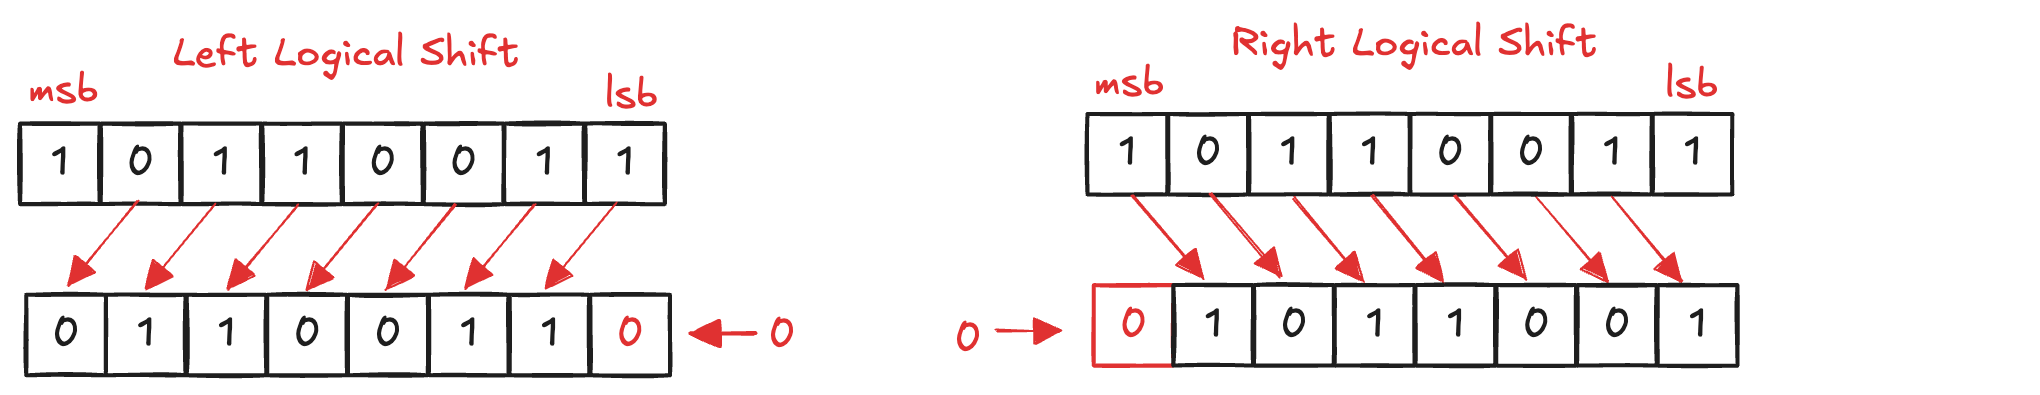

For a left logical shift, the bits move toward the most significant end, and a zero is introduced at the least significant position. Conversely, for a right logical shift, the bits move toward the least significant end, and a zero enters the most significant position. Logical shifts are typically used with **unsigned binary numbers**, where no sign bit needs to be preserved.

### Arithmetic shifters

The **arithmetic shifter** behaves similarly, but it preserves the **sign bit** (the most significant bit) when shifting to the right:

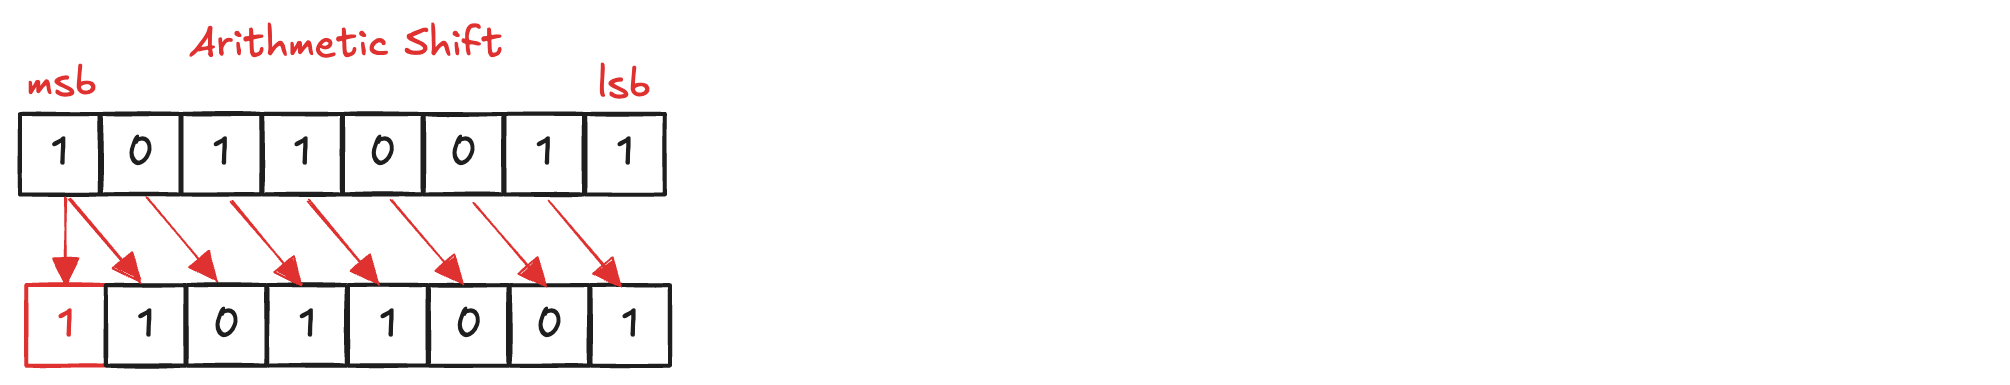

This distinction is crucial for signed numbers represented in **two’s complement**, where the most significant bit encodes the sign of the number. When an arithmetic right shift is performed, the sign bit is replicated instead of being replaced by a zero. This keeps the sign consistent and effectively divides the number by powers of two, rounding toward negative infinity.

Shifts are not just data manipulation tools, they have direct **arithmetic meaning**. A **left shift** by N positions is equivalent to multiplying the number by 2^N. For instance, shifting the binary value 3

$000011$ 

left by four bits results in 

$110000$ 

which corresponds to multiplying 3 by 2^4, giving 48.

A **right shift**, on the other hand, divides the number by 2^N. 

For signed numbers, an arithmetic right shift ensures that negative values remain negative. For example, shifting -4

$11100$ 

right by two bits gives 

$11111$ 

corresponding to -4/(2^2) = -1.

In summary, shifters are essential components, supporting a range of operations from simple scaling to efficient implementation of multiplication, division, and bitwise manipulation.

In the following VHDL code, we describe an N-bit shifter that can perform both logical and arithmetic shifts, in either direction, based on control signals:

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all; 

entity Shifter is
    generic (
        N : integer := 8  -- width of the data word
    );
    port (
        A       : in  std_logic_vector(N-1 downto 0);  -- input data
        SHIFT   : in  integer range 0 to N-1;          -- shift amount
        DIR     : in  std_logic;                       -- 0 = left, 1 = right
        ARITH   : in  std_logic;                       -- 0 = logical, 1 = arithmetic
        Y       : out std_logic_vector(N-1 downto 0)   -- output data
    );
end Shifter;

architecture Behavioral of Shifter is
begin
    process (A, SHIFT, DIR, ARITH)
        variable temp : std_logic_vector(N-1 downto 0);
    begin
        if DIR = '0' then -- LEFT SHIFT
            if SHIFT < N then
                temp := std_logic_vector(shift_left(unsigned(A), SHIFT));
            else
                temp := (others => '0');
            end if;
        else -- RIGHT SHIFT
            if ARITH = '1' then -- Arithmetic right shift (preserve sign bit)
                temp := std_logic_vector(shift_right(signed(A), SHIFT));
            else -- Logical right shift (fill with zeros)
                temp := std_logic_vector(shift_right(unsigned(A), SHIFT));
            end if;
        end if;
        Y <= temp;
    end process;
end Behavioral;


In this VHDL description, the **shift amount** is declared as an **integer** rather than a std_logic_vector because the language’s built-in functions **shift_left()** and **shift_right()** expect an integer to specify how many positions the bits must move. This makes the code simpler and more readable, avoiding type conversions. The use of a **process** block ensures that every time the input, direction, or shift amount changes, the output is recomputed. Overall, the design expresses the shift operation behaviorally, using numeric operations (shift_left, shift_right) controlled by integer parameters, while the synthesizer will later translate it into equivalent hardware.

### Shifters as multiplexers

An **N-bit shifter** can be systematically built using **N multiplexers**, each with **N inputs**. Every multiplexer selects which input bit will appear at its output, depending on a control signal that represents the desired shift amount. The control signal has a width of **log_2(N)** bits, allowing the circuit to select any shift amount from **0** to **N–1** positions:

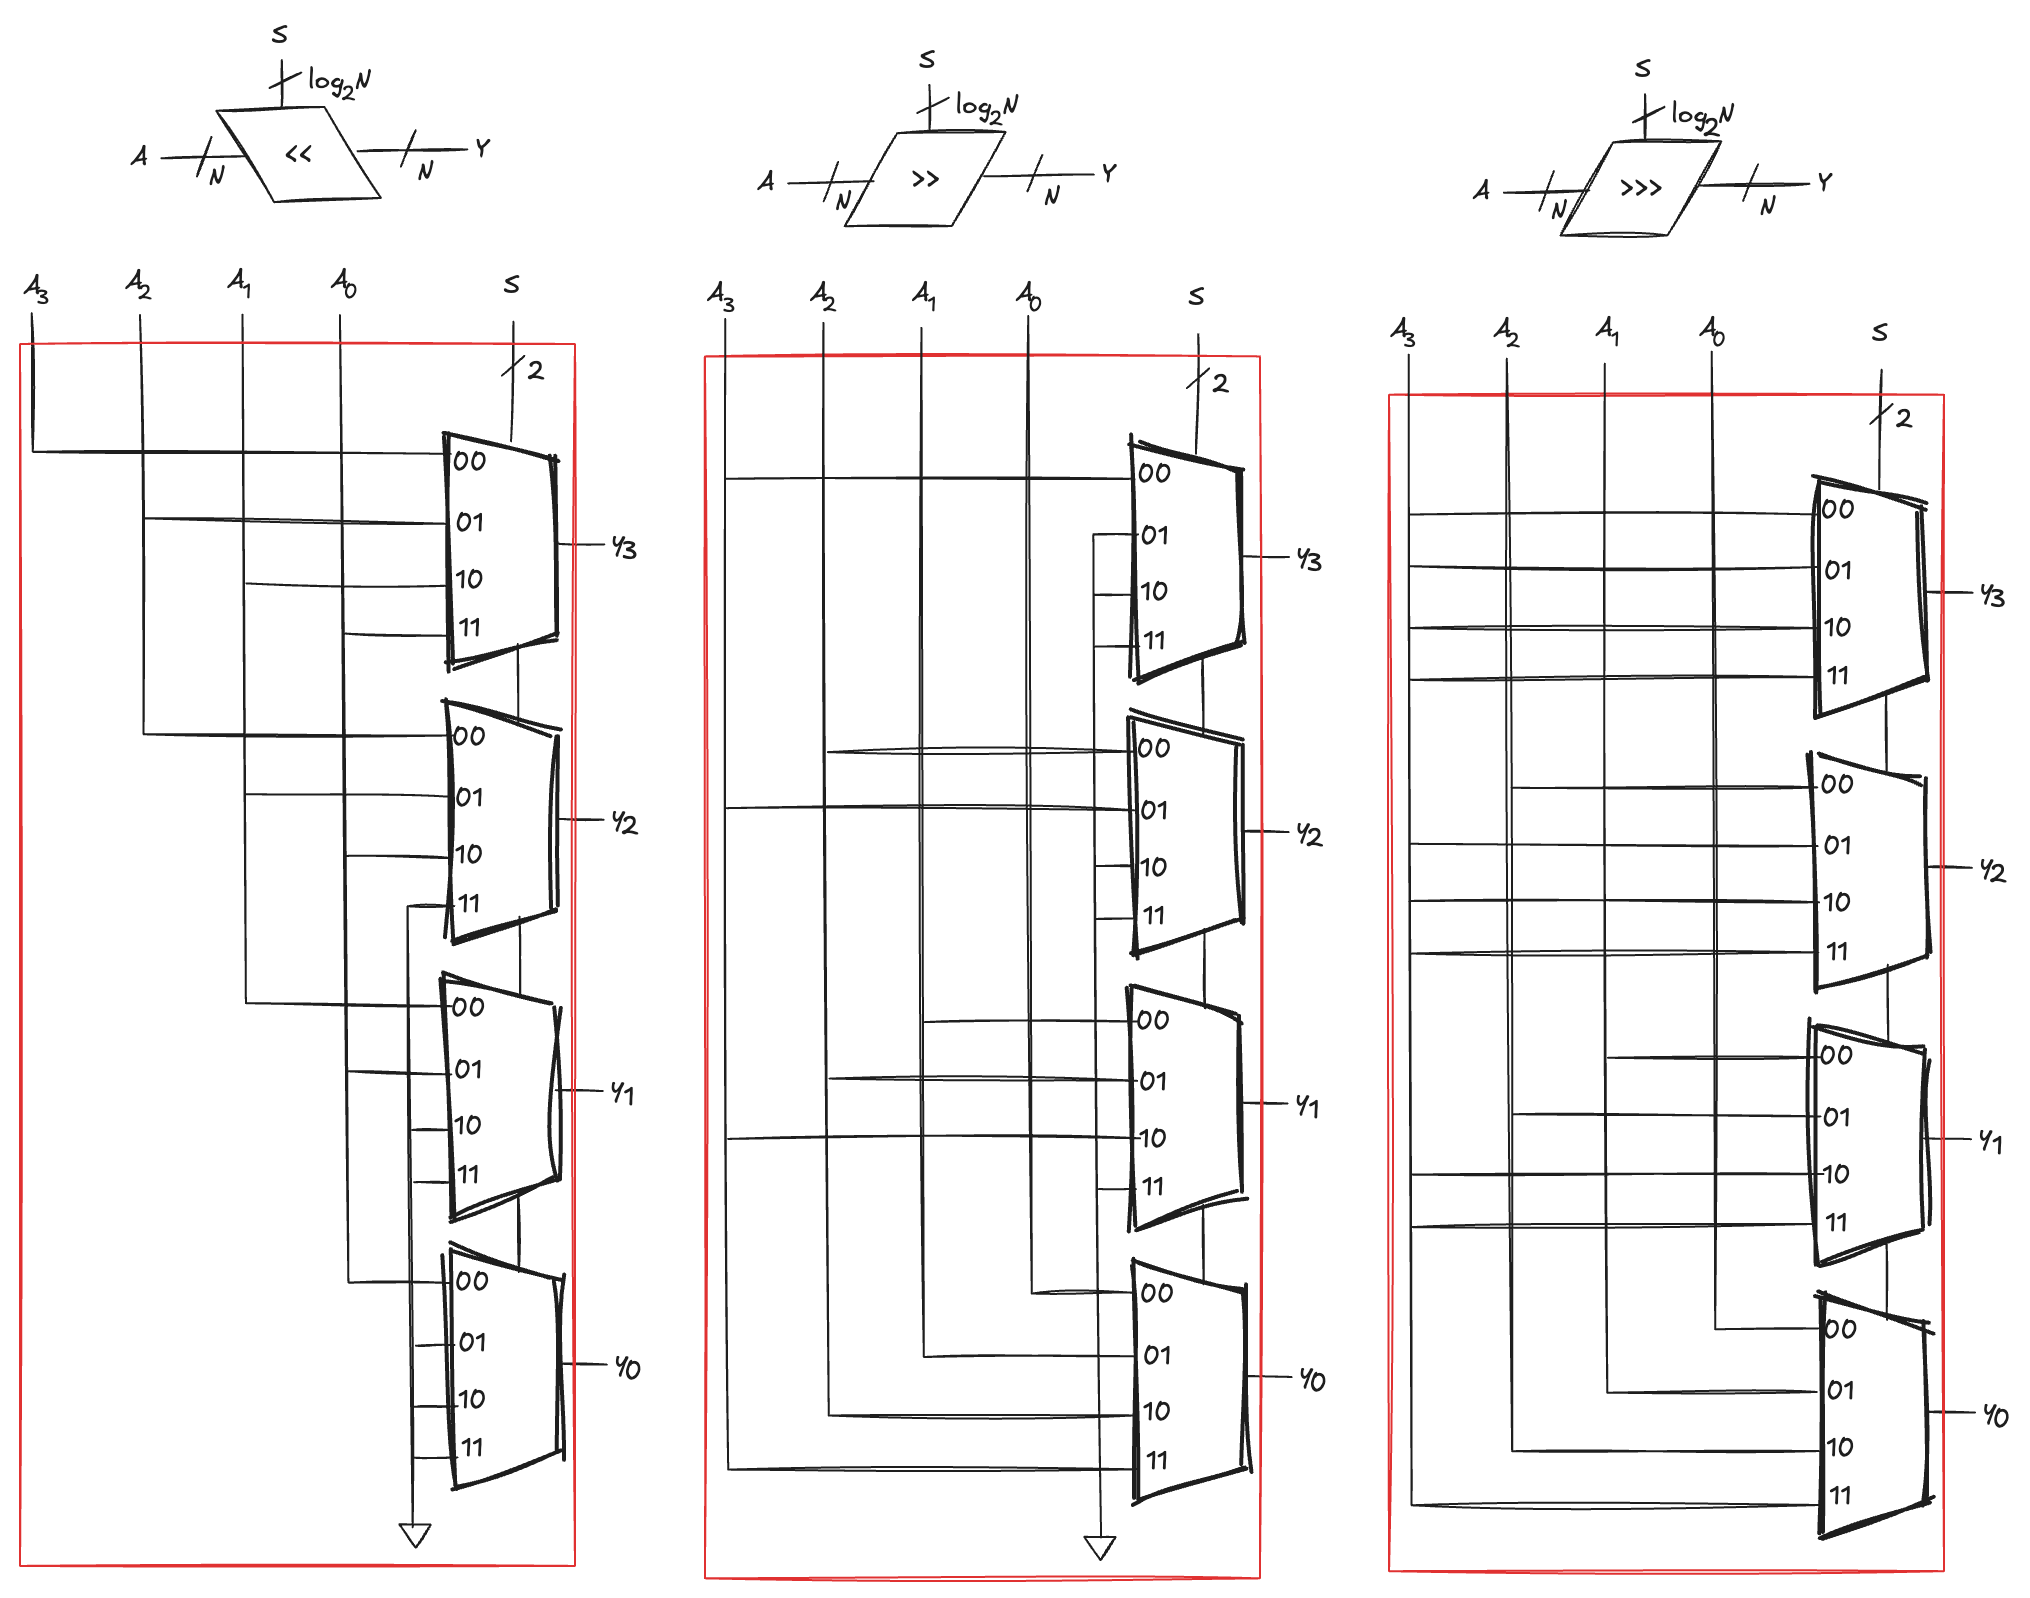

To understand this structure, imagine each output bit being driven by one multiplexer that can choose among all input bits. For instance, in a left shifter, the least significant output can select between all input bits shifted left by varying amounts, while higher-order outputs will select correspondingly higher input bits. If the shift amount is 0, the output equals the input; if it is 1, all bits move one position to the left, and so on.

### Rotators

A **rotator** is a circuit that moves the bits of a binary word in a **circular fashion**, unlike a shifter that discards bits at one end and inserts zeros. In a rotation, the bits that "fall off" one side are **reintroduced on the opposite side**, so the pattern of bits is preserved, just rearranged. This operation can be performed in either direction: **rotate left** or **rotate right**:

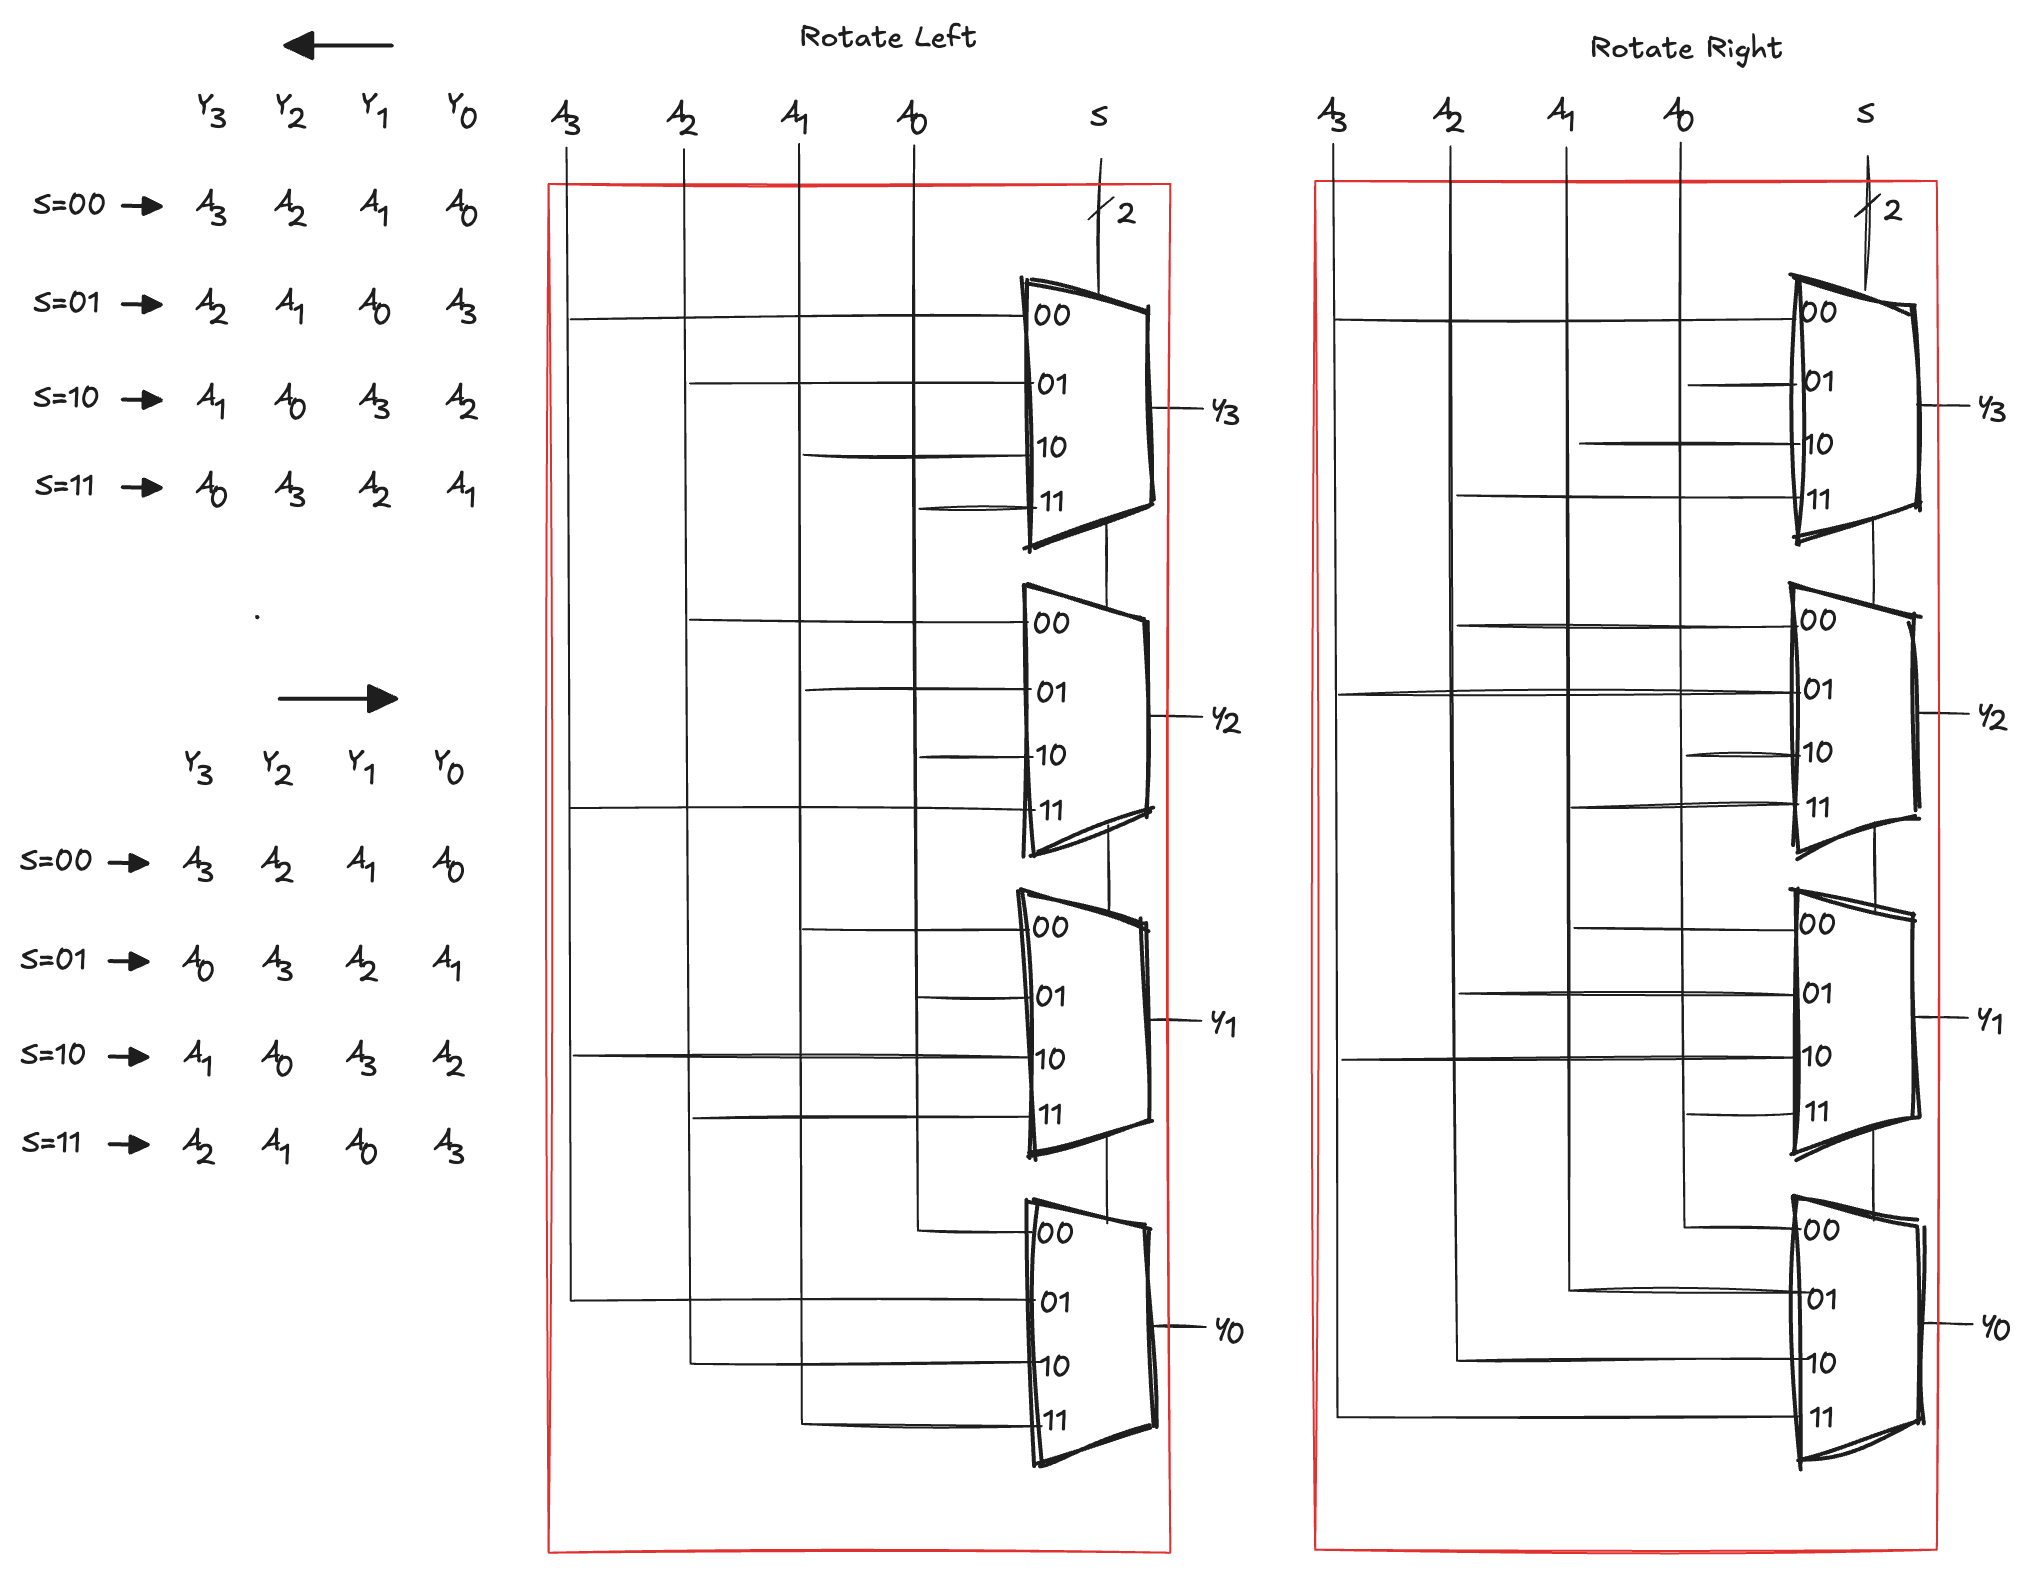

For example, in a 4-bit word, a left rotation by one position moves each bit toward the more significant end, and the most significant bit reappears at the least significant position. Similarly, a right rotation moves each bit toward the least significant end, and the least significant bit reappears at the most significant position.

This behavior makes rotation different from shifting because no information is lost. Instead, the bit pattern is **cycled** through the positions, making rotators particularly useful in certain arithmetic operations, bitwise manipulations, and cryptographic algorithms, where circular movement of bits can produce predictable but non-destructive transformations.

Hardware-wise, a rotator can be implemented similarly to a shifter, using **multiplexers** to select which input bit will appear at each output position. The control signal, typically encoded on **log_2(N)** bits, determines the rotation amount (for example, from 0 to N–1). By modifying the multiplexer connections, the same structure can support left or right rotations.

The following VHDL code describes an N-bit rotator that can perform both left and right rotations based on a control signal:

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;

entity Rotator is
    generic (
        N : integer := 8  -- width of the data word
    );
    port (
        A      : in  std_logic_vector(N-1 downto 0);  -- input data
        SHIFT  : in  integer range 0 to N-1;          -- rotation amount
        DIR    : in  std_logic;                       -- 0 = left, 1 = right
        Y      : out std_logic_vector(N-1 downto 0)   -- output data
    );
end Rotator;

architecture Behavioral of Rotator is
begin
    process (A, SHIFT, DIR)
        variable temp : std_logic_vector(N-1 downto 0);
    begin
        if DIR = '0' then
            -- Rotate left
            temp := A(N-1-SHIFT downto 0) & A(N-1 downto N-SHIFT);
        else
            -- Rotate right
            temp := A(SHIFT-1 downto 0) & A(N-1 downto SHIFT);
        end if;
        Y <= temp;
    end process;
end Behavioral;

## Multipliers

Binary multiplication relies on the same principle as decimal multiplication, except that each bit of the multiplier can only be 0 or 1. The multiplication of two single bits is **equivalent to the AND operation**: the result is 1 only when both inputs are 1. A general **N×N multiplier** produces a result that is **2N bits wide**, because it is obtained by generating and summing a series of **partial products**:

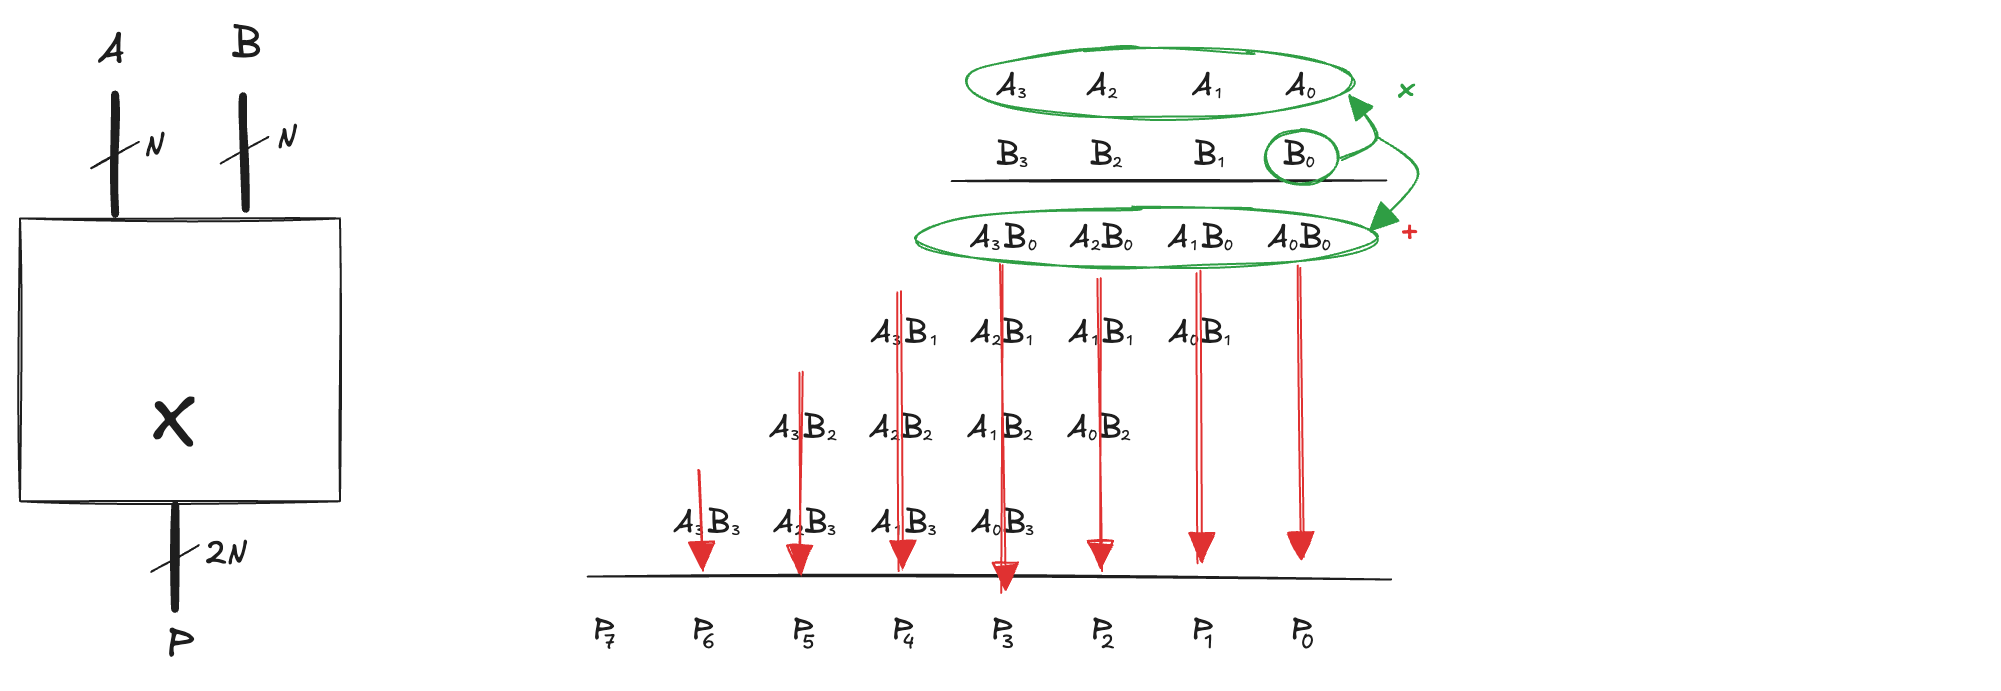

Each **partial product** is formed by taking one bit of the multiplier and performing a bitwise AND with all bits of the multiplicand. This operation produces an N-bit value. Then, each partial product is **shifted left** according to the position of the multiplier bit and added to the previous partial products. In a 4×4 unsigned multiplier, this results in four partial products, each shifted and then added together. The final product is an 8-bit number:


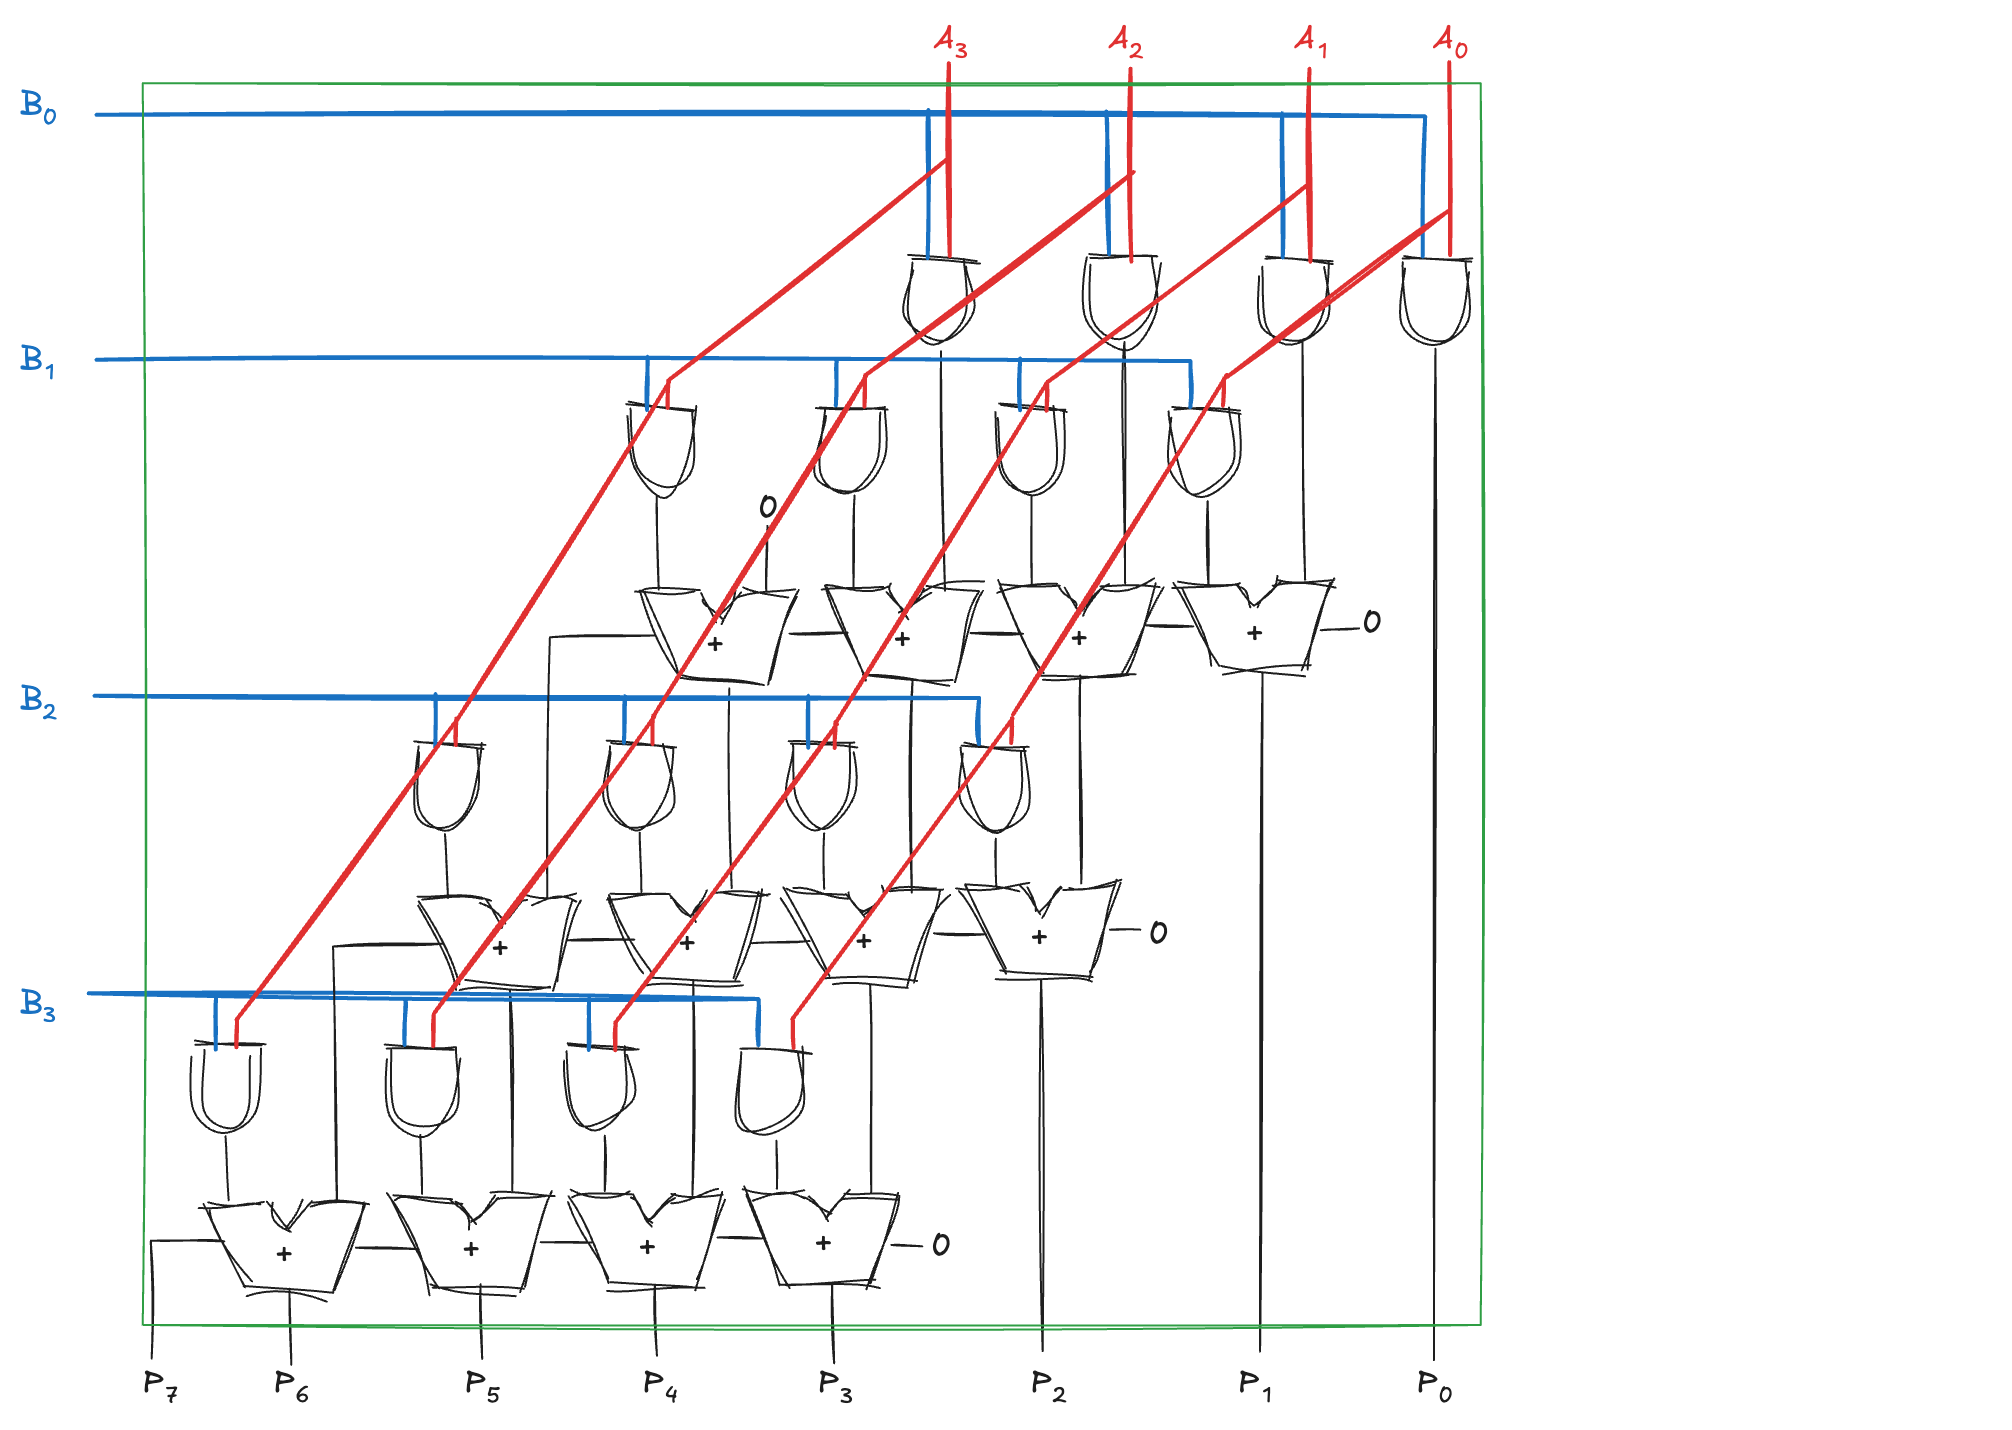

Each bit of the multiplier controls a row of AND gates, generating the corresponding partial product by multiplying that bit with every bit of the multiplicand. These partial products are then summed together using a network of half full adders (FA). This **array multiplier** architecture is a simple and regular hardware implementation, scalable to any bit width (N). Although this design is efficient for small operands, larger multipliers often use more advanced architectures (e.g., **carry-save**, **Wallace tree**, or **Booth multiplier**) to reduce delay and hardware complexity.

We can consider the VHDL implementation, using the built-in multiplication operator from numeric_std library, which synthesis tools implement as a network of AND gates and adders, similar to our diagram):

In [ ]:
library IEEE;
use IEEE.std_logic_1164.all;
use IEEE.numeric_std.all;

entity Multiplier is
    generic (
        N : integer := 4  -- width of operands
    );
    port (
        A : in  std_logic_vector(N-1 downto 0);
        B : in  std_logic_vector(N-1 downto 0);
        P : out std_logic_vector(2*N-1 downto 0)
    );
end Multiplier;

architecture Behavioral of Multiplier is
begin
    process (A, B)
        variable A_u : unsigned(N-1 downto 0);
        variable B_u : unsigned(N-1 downto 0);
        variable P_u : unsigned(2*N-1 downto 0);
    begin
        -- convert to unsigned
        A_u := unsigned(A);
        B_u := unsigned(B);

        -- perform multiplication
        P_u := A_u * B_u;

        -- assign result
        P <= std_logic_vector(P_u);
    end process;
end Behavioral;

The VHDL code uses the "unsigned" function from the numeric_std library to give numerical meaning to bit vectors, allowing standard arithmetic operations such as multiplication. The * operator performs binary multiplication between two unsigned operands, producing a result twice as wide as the inputs. Without the unsigned conversion, the multiplication will be treated as a bitwise operation (and AND bit by bit), which is not the intended behavior for arithmetic multiplication.

## Dividers

Division is **the most complex of all basic arithmetic operations** to implement in hardware, as it involves repeated comparison, subtraction, and shifting. Conceptually, binary division follows the same logic as **long division in decimal** If we divide a number A (the dividend) by another number (B) the divisor, we obtain a **quotient** (Q) and a **remainder** (R), according to the relation:

$\frac{A}{B} = Q + \frac{R}{B}$

The goal is to determine how many times B can fit into A without exceeding it. Each time the divisor fits, we append a 1 to the quotient; when it does not fit, we append a 0:

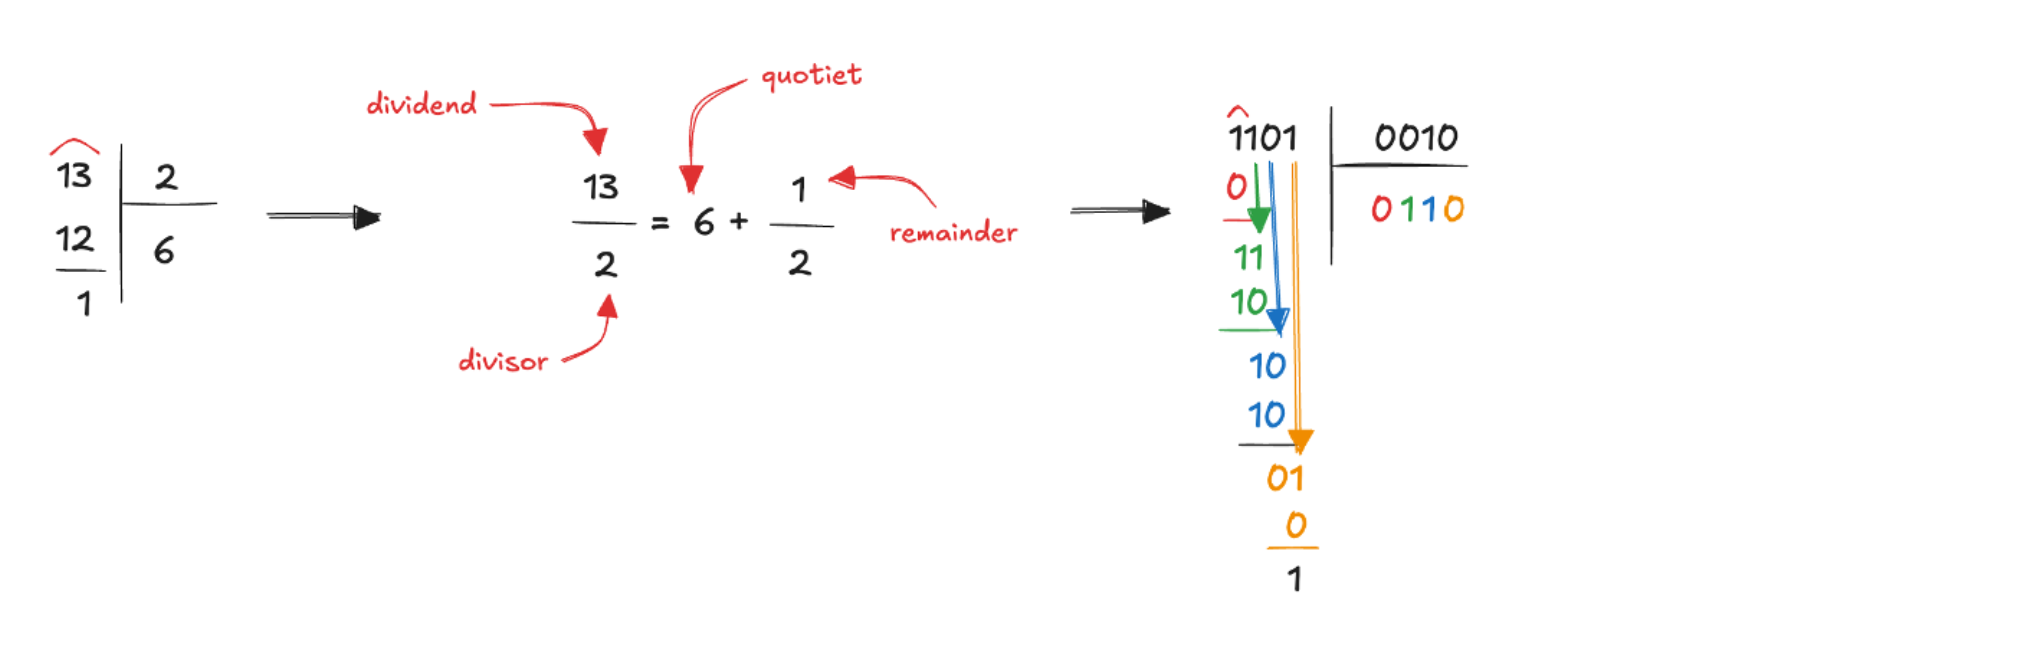

The process is iterative: 

In [ ]:
R ← 0                         -- Initialize remainder
For i from N−1 downto 0 loop  -- Process each bit from MSB to LSB
    R' ← (R << 1) + A[i]      -- Shift left and bring down next bit of A
    D ← R' − B                -- Subtract divisor
    if D < 0 then             -- If subtraction negative
        Q[i] ← 0              -- Quotient bit = 0
        R ← R'                -- Restore previous remainder (no change)
    else
        Q[i] ← 1              -- Quotient bit = 1
        R ← D                 -- Keep new remainder
    end if
end loop

At the beginning, the remainder R is initialized to 0. In each iteration, the algorithm shifts the remainder left by one bit and brings down the next bit of the dividend A[i]. This new value represents the partial remainder R'. The divisor B is then subtracted from this partial remainder to test whether it fits. If the result D is negative, the subtraction exceeded the value that can be divided, so the quotient bit Q[i] is set to 0, and the remainder is restored (kept unchanged). If the result is non-negative, the quotient bit is set to 1, and the remainder becomes the new difference D. The final remainder R and quotient Q are obtained after all bits have been processed.

This procedure is known as the **restoring division algorithm**, since the remainder is "restored" to its previous value whenever the subtraction overshoots. Later variations, such as **non-restoring** and **SRT division**, were developed to improve efficiency, but the restoring algorithm remains fundamental for understanding division in digital circuits.

Let' conside an step by step example:

A = 1101 (13)

B = 0010 (2)

R = 0000 (0)
	
| Step | i | Operation       | R'     | D (R' − B)    | Q[i]  | R    |
|------|---|-----------------|--------|---------------|-------|------|
| 1    | 3 | (0000 << 1) + 1 | 0001   | Negative      | 0     | 0001 |
| 2    | 2 | (0001 << 1) + 1 | 0011   | 0001          | 1     | 0001 |
| 3    | 1 | (0001 << 1) + 0 | 0010   | 0000          | 1     | 0000 |
| 4    | 0 | (0000 << 1) + 1 | 0001   | Negative      | 0     | 0001 |

Final Result:  
Q = 0110 (6)

R = 0001 (1)


The following diagram represents a **4×4 restoring division array**, built from a grid of basic **division cells**. Each cell performs a small part of the restoring division algorithm, combining **subtraction**, **restoration**, and **shift** logic:

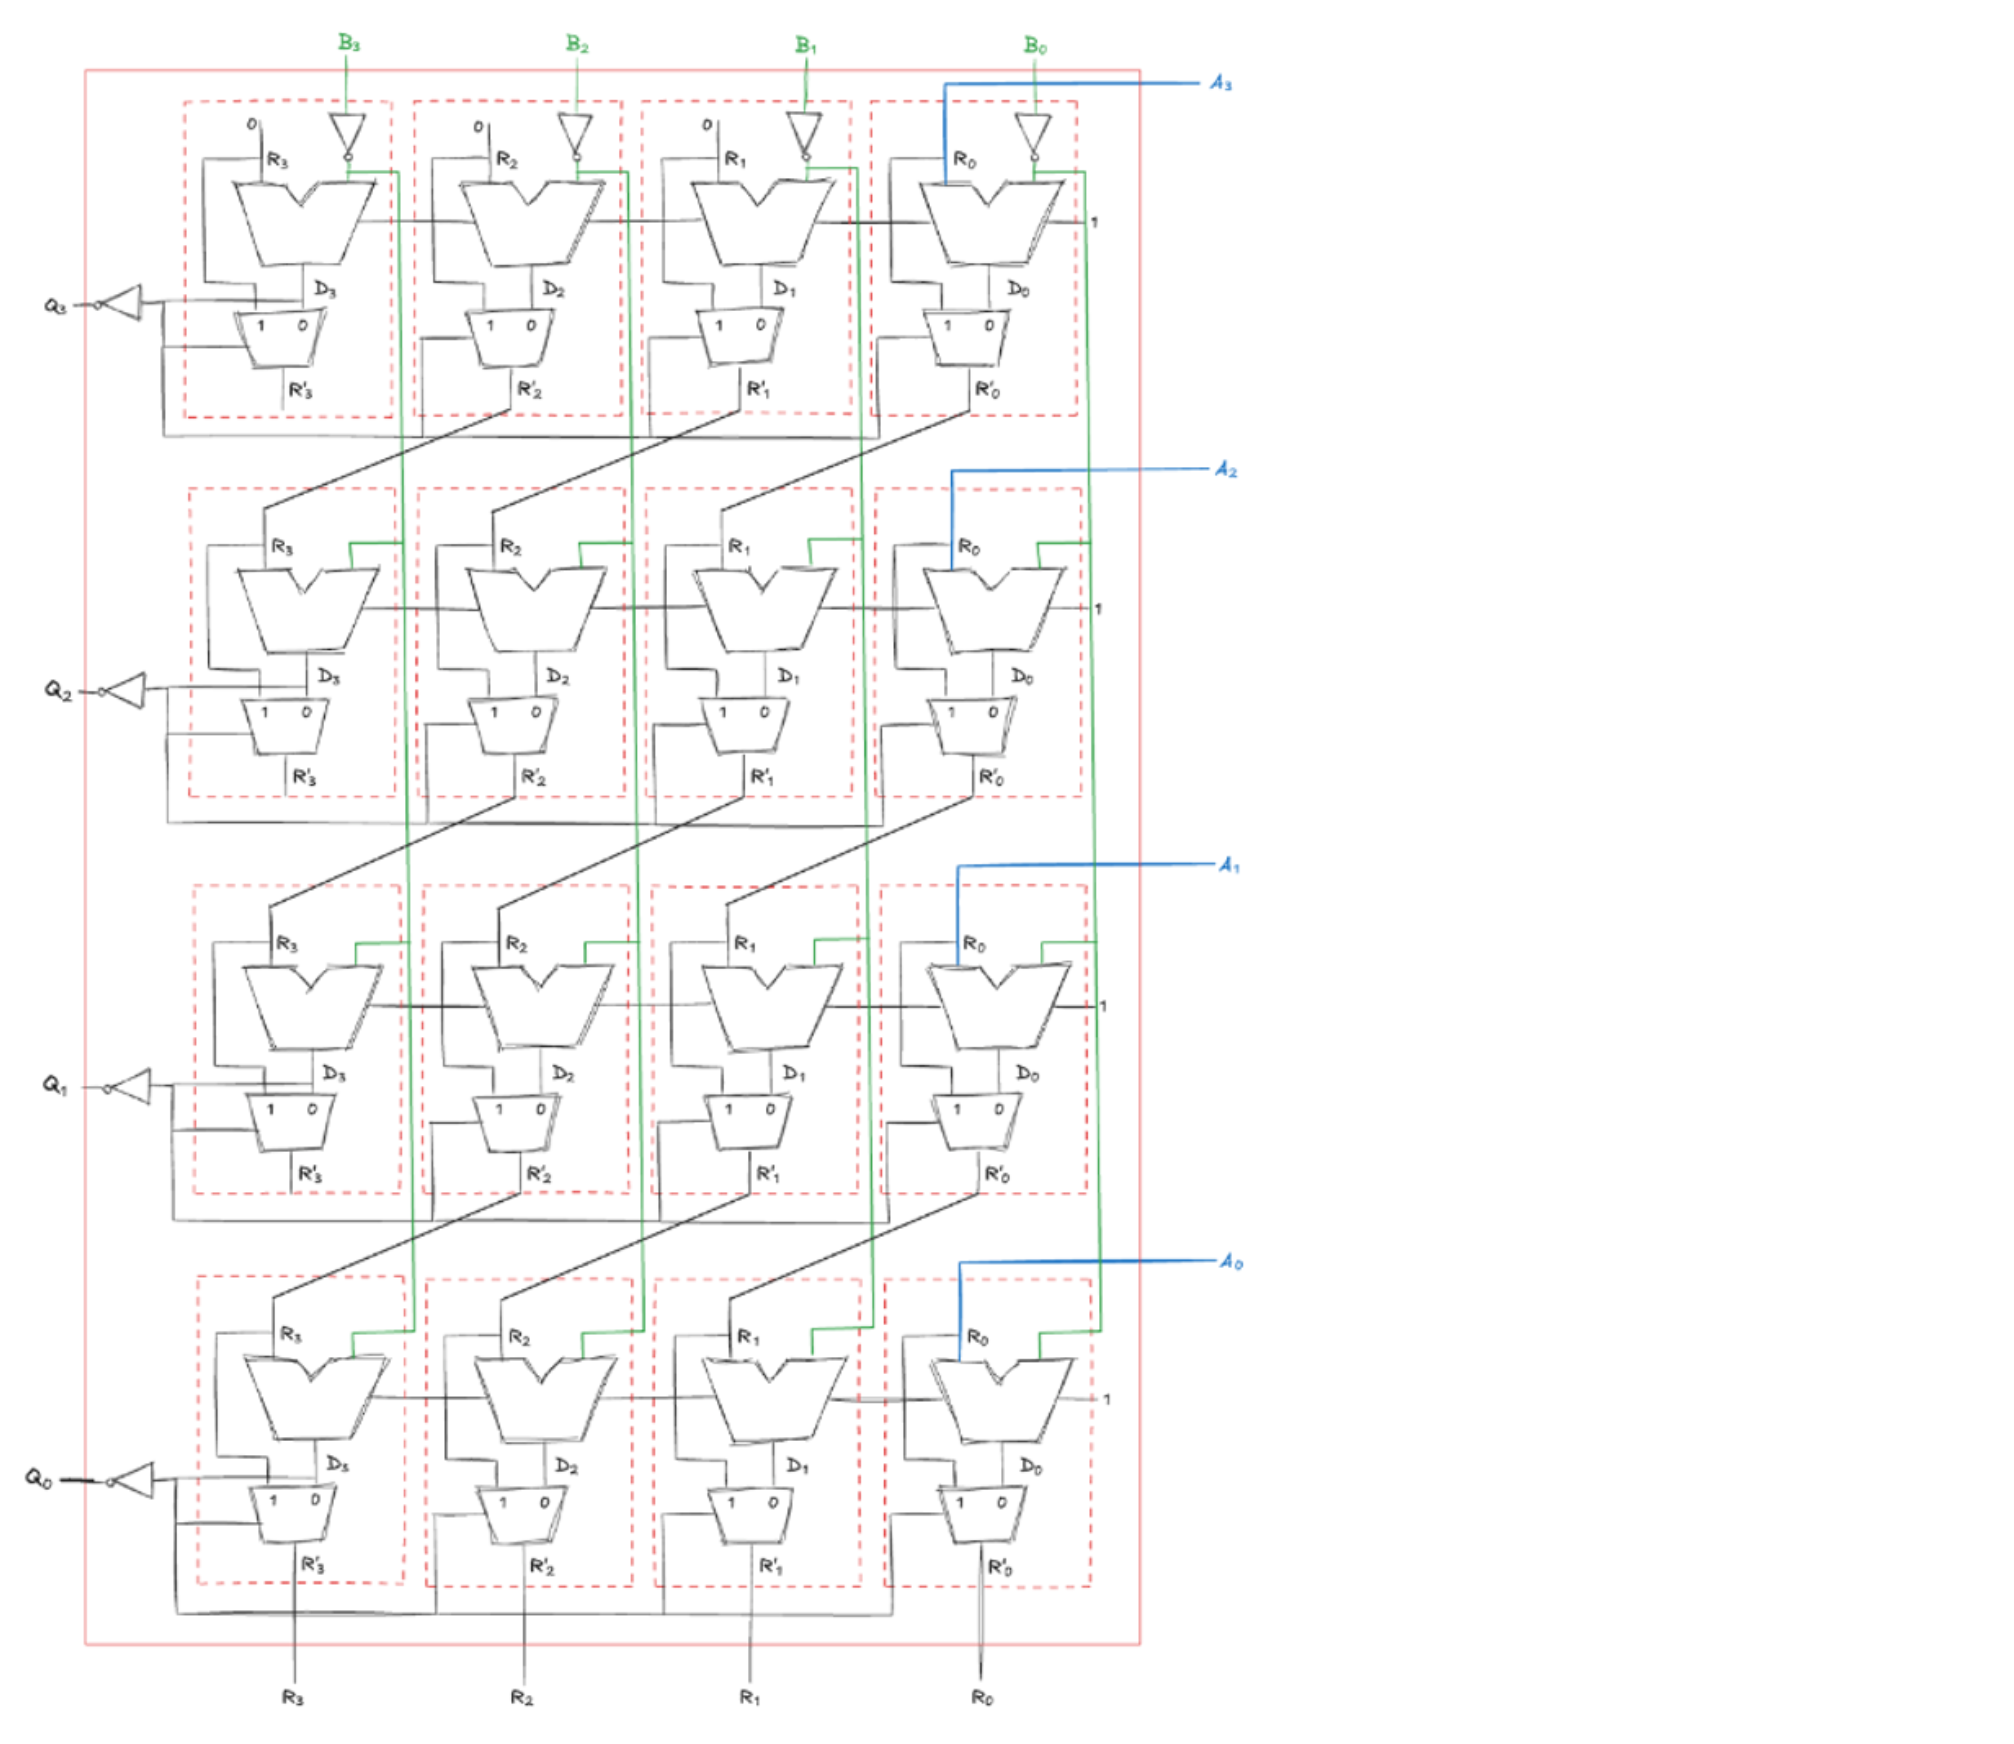

Each row corresponds to one bit of the quotient and each column corresponds to one bit of the divisor. The **dividend bits** enter along the right edge, and the **remainder bits** propagate downward through the array. Each cell performs the following local operation:

1. Subtracts the divisor bit from the partial remainder.
2. If the result is negative, it restores the previous remainder (undoing the subtraction).
3. Passes the updated remainder to the next lower row, and the shifted divisor to the next column.

This **array-based organization** allows all partial remainder updates and restorations to proceed **in parallel** across the hardware structure, while the control logic shifts through each bit of the dividend sequentially. This design directly maps the restoring division algorithm into a regular, modular hardware structure, making it easy to scale to higher bit widths.

## Floating-Point Adder

Finally, we can consider also operations involving **floating-point numbers**, which are used to represent a wide range of real numbers in scientific and engineering applications. Floating-point arithmetic is more complex than integer arithmetic due to the need to handle varying exponents and normalization. As described by the IEEE 754 standard, Floating-point numbers are represented using three fields: the **sign**, the **exponent**, and the **fraction (mantissa)**. To add two floating-point values, the hardware must perform a series of alignment and normalization steps to ensure the numbers share the same exponent before performing the actual addition. Let’s consider the example shown:

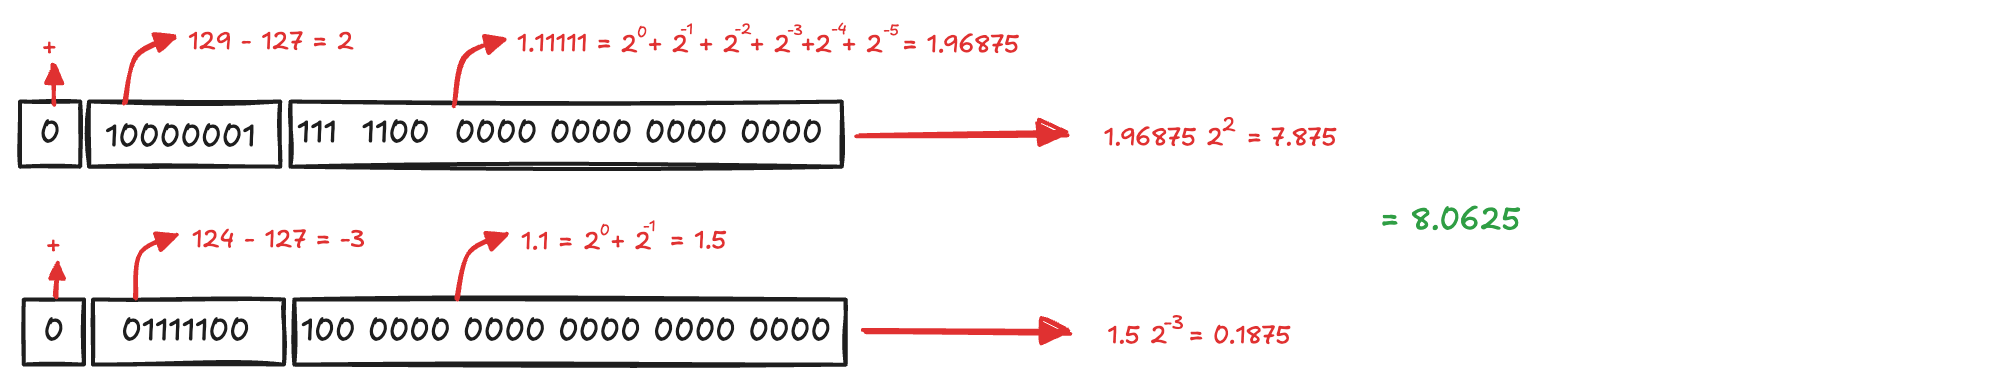

The first step is to separate the sign, exponent, and fraction from each operand.
For normalized numbers, the exponent is stored in **biased form** (bias = 127 for single precision):

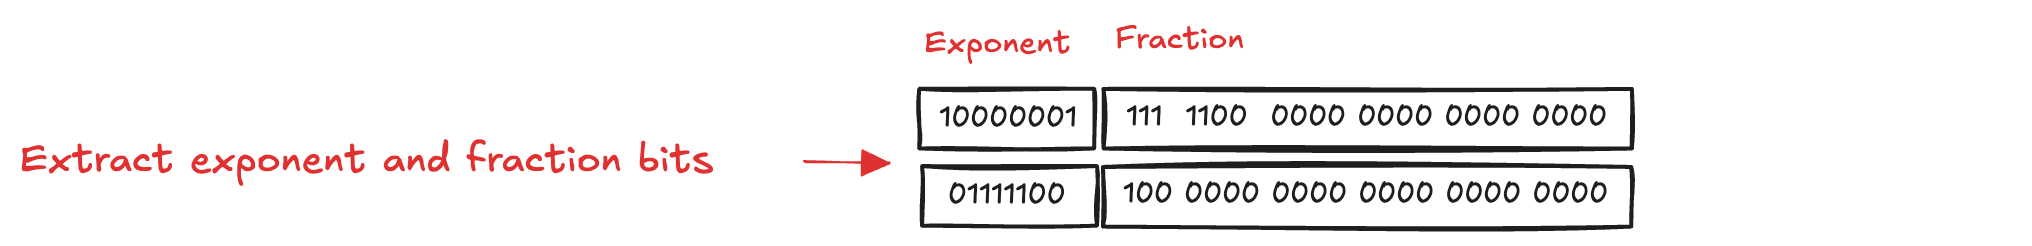

Normalized floating-point numbers always have an **implicit leading 1** before the binary point (because the mantissa is in the form 1.xxxxx). So, the fraction field becomes:

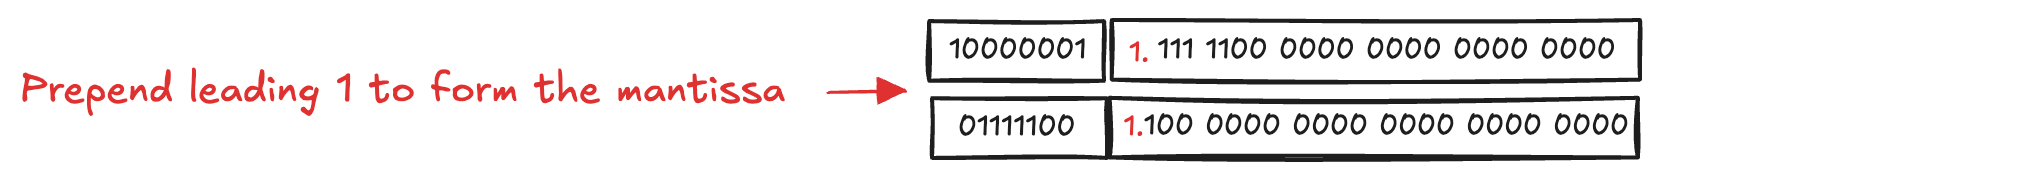

To align the two numbers, the smaller exponent must be increased by shifting its mantissa right:

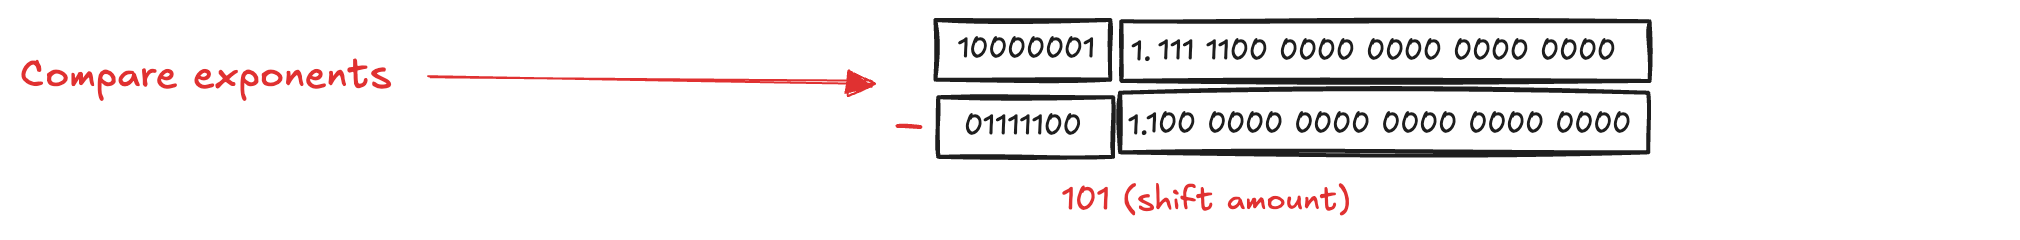

The mantissa of the number with the smaller exponent is right-shifted by the difference between exponents.This ensures both numbers are scaled to the same power of two before addition:

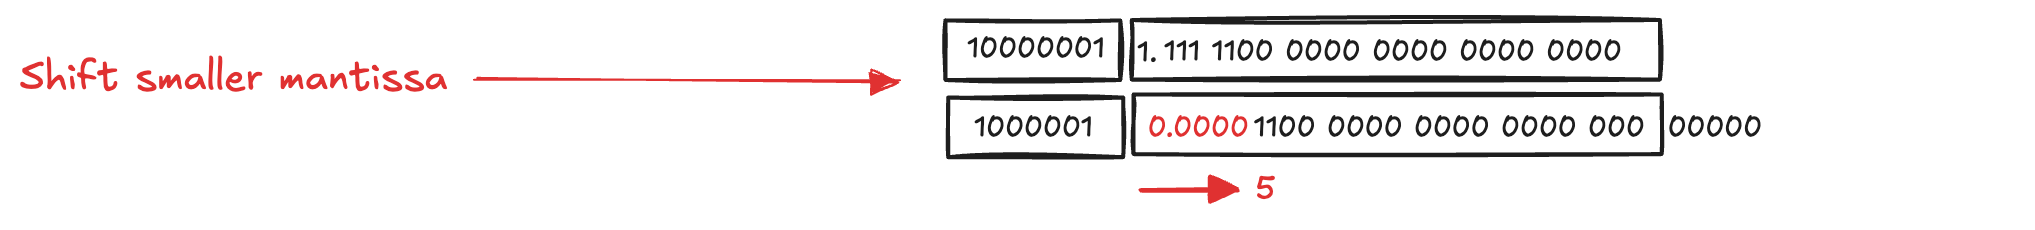

Once aligned, the mantissas are added just like integers:

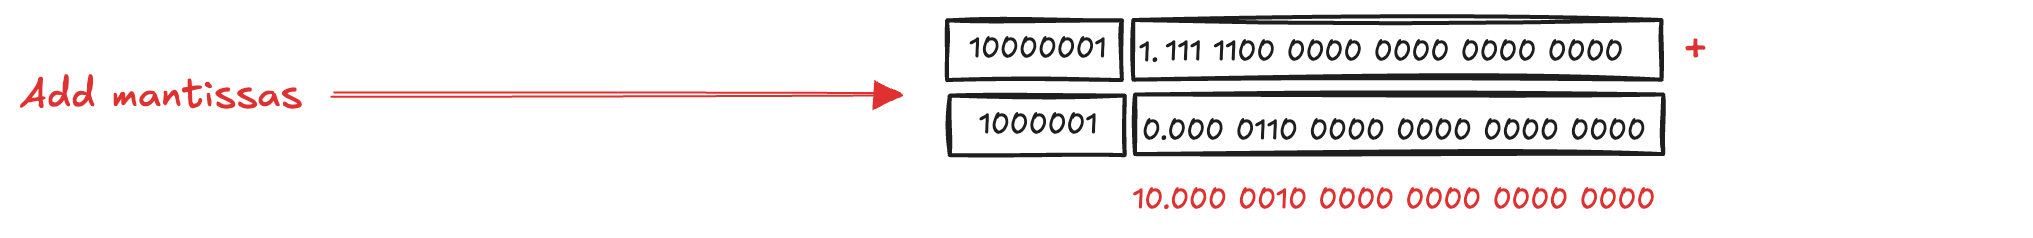

The result must be adjusted so that the mantissa is again in normalized form (i.e., only one '1' before the binary point):

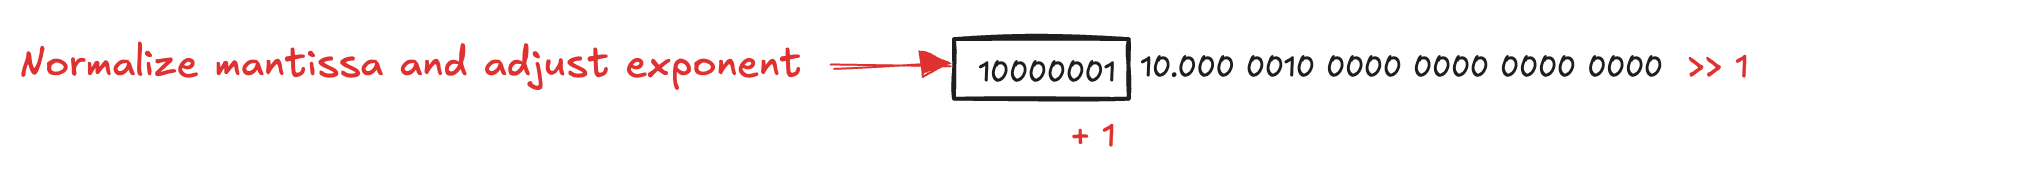

Finally, the mantissa (minus the implicit 1) and the new exponent are re-encoded into IEEE 754 format:

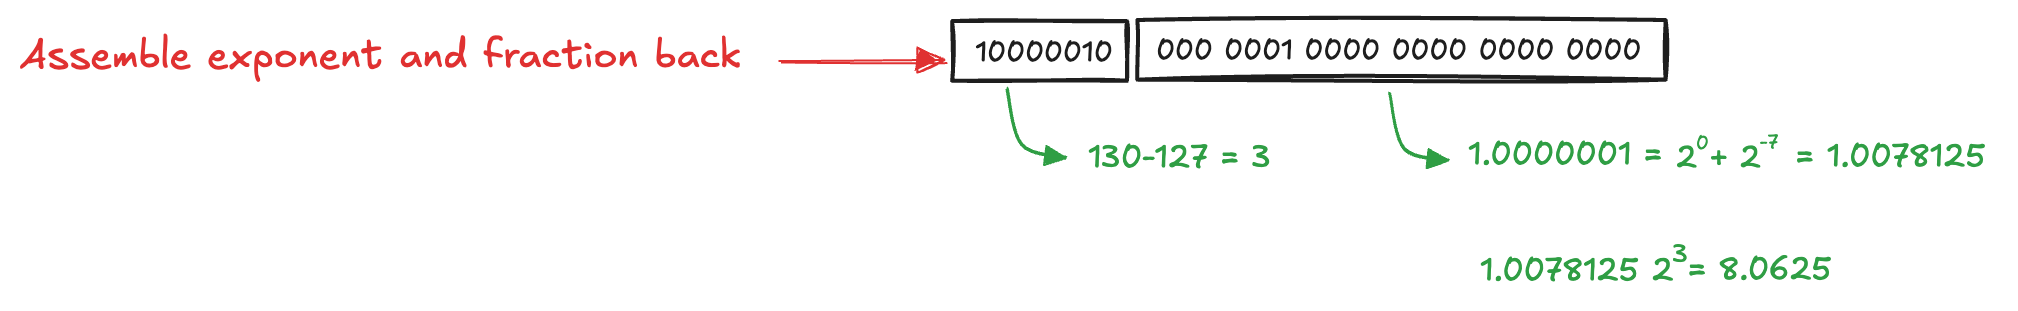

Floating-point arithmetic is one of the most demanding operations to implement in hardware because it requires handling normalization, rounding, overflow, and precision. For this reason, it is typically carried out by a dedicated hardware block known as the **Floating-Point Unit (FPU)**. The FPU operates alongside the **Central Processing Unit (CPU)** but is distinct from it, allowing arithmetic on floating-point numbers to be performed much faster and more accurately than if implemented in software.

One of the most famous hardware bugs in computing history is the **Intel Pentium floating-point division bug**, discovered in 1994:

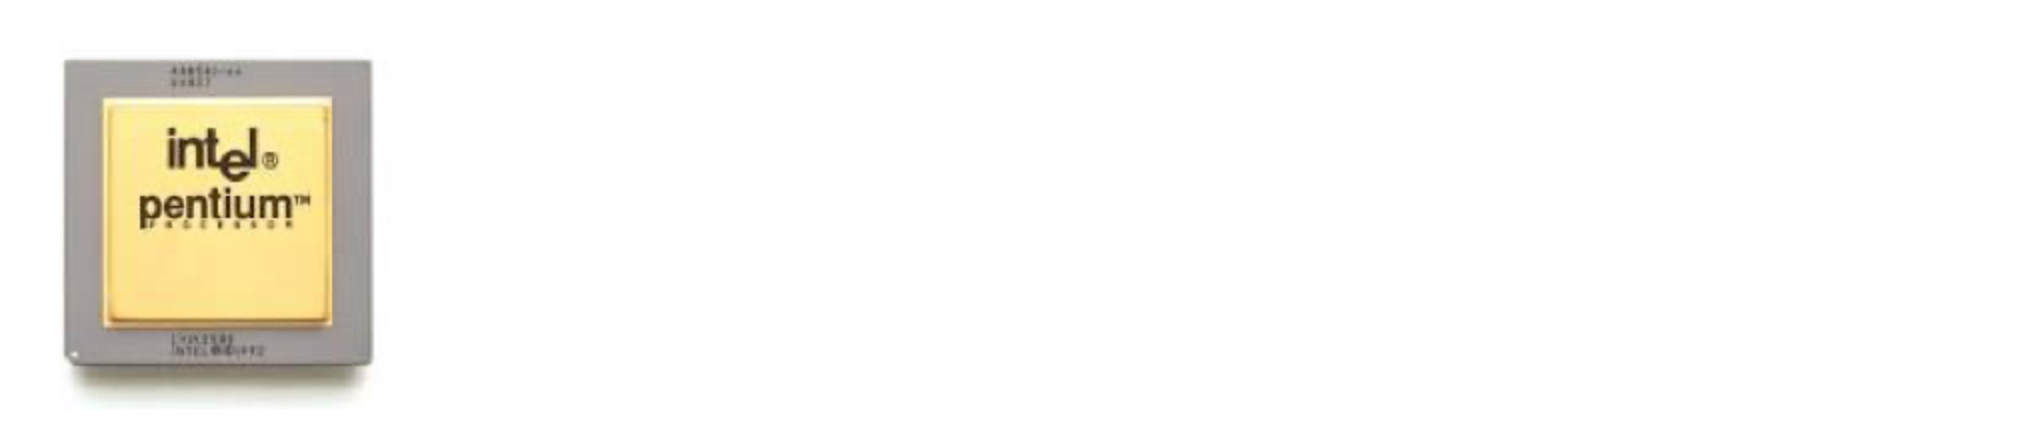

The issue arose from a flaw in the lookup table used by the Pentium’s FPU to compute division. Specifically, several entries were missing from a table that stored precomputed reciprocal values, which the hardware used during the division process. When certain rare combinations of input operands accessed one of these missing entries, the FPU would return **slightly incorrect results**, errors typically appearing in the 4th or 5th decimal place.
Although the probability of such an error occurring was extremely small, the potential for incorrect scientific and financial calculations made the issue unacceptable. In some specific cases, depending on operand values, the errors could accumulate or occur repeatedly, producing visibly incorrect results.

In **December 1994**, Intel publicly acknowledged the defect and issued a large-scale **recall of all affected Pentium processors**, marking the first full recall of a computer chip in history. The total cost of replacing processors and repairing Intel’s reputation was estimated at **$475 million**. This incident became a classic example of how **tiny hardware design errors in arithmetic units** can have enormous financial and technological consequences, emphasizing the importance of **verification** and **exhaustive testing** in hardware design.